In [1]:
# loop measurements and firing rate

In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import brian2
import pickle
import networkx as nx
import copy
import seaborn as sns
from plotFunc import plotPaperTag, getConnHist, getNnodeLoop, plotXYcompr, plotXYcomprCorr, plotXYcomprCorrNotNormalize, plotXYcomprResidual, plotXYLogReg
import json

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from adjustText import adjust_text
import statsmodels.api as sm
from collections import defaultdict
from matplotlib.colors import TwoSlopeNorm

In [3]:
# load arealist
area_list = list(np.loadtxt('results/area_list.csv', delimiter=',', dtype='str'))
# load connectivity 
conn_cxcx = np.loadtxt('results/conn_cxcx.csv', delimiter=',')
# load interneuron density
normPVgrad_df = pd.read_csv('results/dfPV.csv', header = 0, index_col=0)
PVgrad_df = pd.read_csv('results/dfPVraw.csv', header = 0, index_col= 0)
p = np.array(PVgrad_df)
pvList = p/np.max(p)
# load model
hierarchy_df = pd.read_csv('results/dfHier.csv', header = 0, index_col=0)
with open('results/model_V1.pkl', 'rb') as f:
    model_V1 = pickle.load(f)
# 
parameters = model_V1.parameters

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'


In [4]:
noLabelAreas = ['SSp-ll','SSp-ul','SSp-n','SSp-m','SSp-tr','VISli','VISpl','VISrl','RSPd','AUDv']

In [5]:
# ## get the connection strength for each area and test if it matches with firing rate pattern.
# # generate normalized connection matrix
# conn_cxcx_norm = conn_cxcx / np.max(conn_cxcx)
# threshold = 0.2 # binary threshold

# use the scaled connection matrix
conn_sc = np.power(conn_cxcx, parameters['kSquishFln'])
# conn_sc = conn_cxcx
# conn_sc = conn_sc * (0.5 - 1 + pref_matrix)
# conn_sc = conn_sc * (conn_sc > 0)
conn_cxcx_norm = conn_sc / np.max(conn_sc)
threshold = 0.54 # 0.2   0.6  0.56

# thresholding the connection matrix
conn_cxcx_threshold =  conn_cxcx_norm * (conn_cxcx_norm > threshold)# threholding 

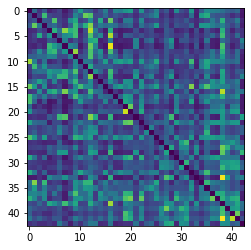

In [6]:
plt.imshow(conn_cxcx_norm)

In [7]:
def makePlot(value, Xlabel, Ylabel, area_list, figureSize, fontSize, saveFig, fileName):
    fig = plt.figure(figsize=figureSize, dpi=300, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': fontSize})
        
    plt.plot(value)
    plt.xticks(range(len(area_list)), area_list, rotation=90, fontsize=fontSize*0.4)
    plt.xlabel(Xlabel)
    # plt.grid('on')
    plt.ylabel(Ylabel)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # save figure
    if saveFig:
        plt.savefig('figure/' + fileName, dpi=300, bbox_inches='tight',transparent=True)
    # plt.savefig('figure/neurondensity_grad.png',dpi=80,bbox_inc

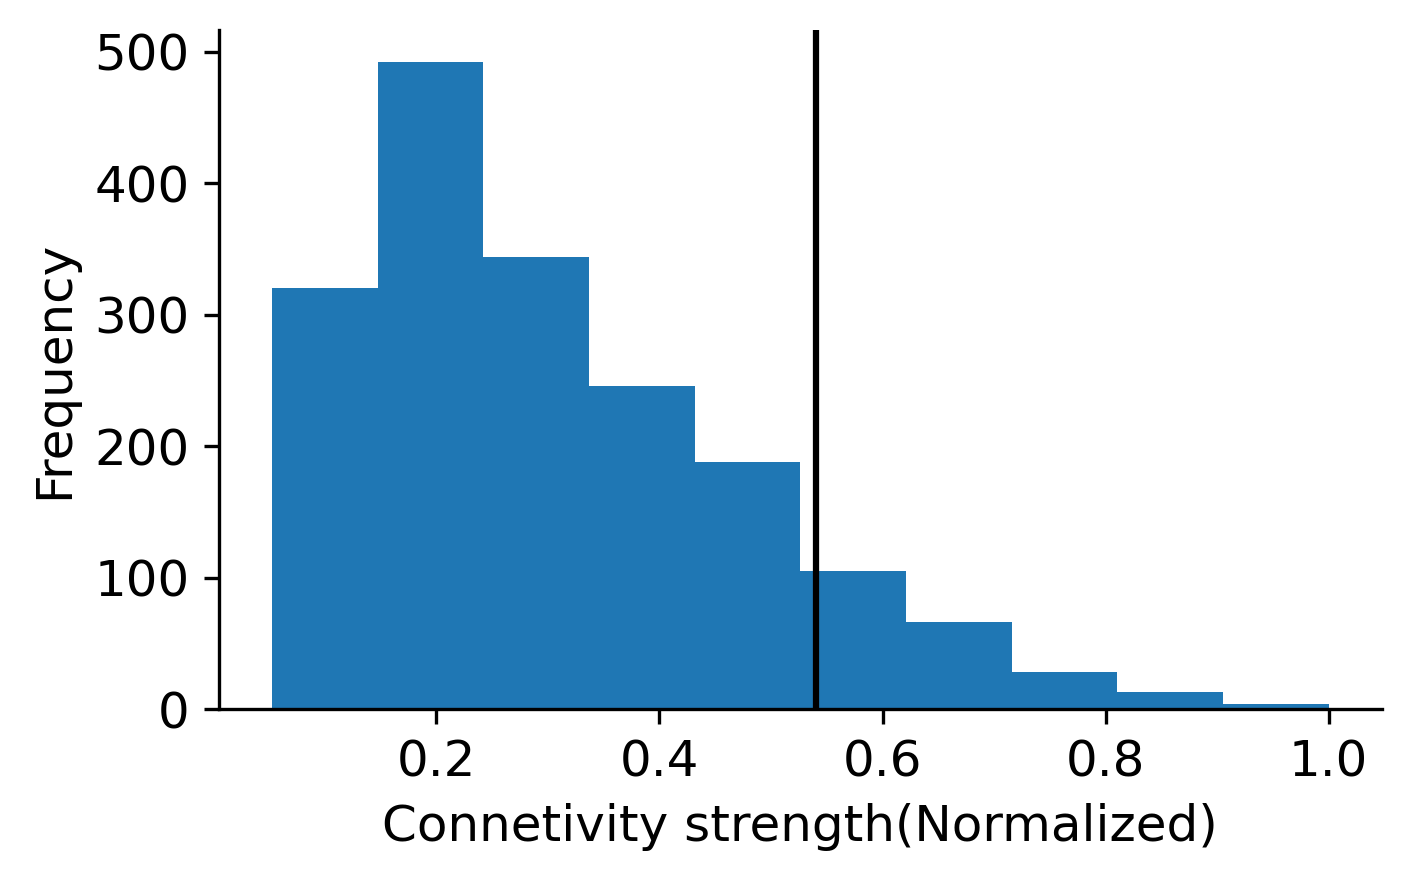

In [8]:
getConnHist(conn_cxcx_norm, 'linear', threshold, (5,3), 12, True, 'loopMeasurement/plainConnection.svg')
# getConnHist(conn_cxcx_threshold, 'log')

[12.96532706 12.11361611 11.2677357  12.8403911  10.6555186  12.20057409
 11.10550701 10.36129943 11.47051224 15.14953785 13.14516117 12.07114149
 16.68136001 12.22553499 12.39118677 12.74172307 15.31097636 12.23177556
 10.37734474 11.50939954 13.76228836 10.48923042 14.34555608 10.05242941
 11.78803734 13.6300464   9.63954185 13.68247964 11.45632606 12.37543824
 11.65829053 12.25455384 12.59815345  9.93117688 11.70258944 14.70855679
 14.77732148 14.42910518 18.67207302 14.29482274 12.40446542 15.57848303
  9.75131013]
[482.18183198 462.90939128 447.85026211 486.38424899 406.76484579
 462.54945076 438.51859597 378.28090889 446.46401236 552.52168764
 487.26101931 472.27246523 580.66980479 462.18762914 479.2529979
 479.1741564  537.42947347 473.79611236 416.30595765 444.11836461
 503.66413232 416.50791339 523.12679162 424.77499016 470.42532222
 503.07899014 404.78892749 514.6560207  428.77043086 469.87170334
 460.35940149 473.17804124 476.31129771 393.72931834 452.92478103
 542.9807655  

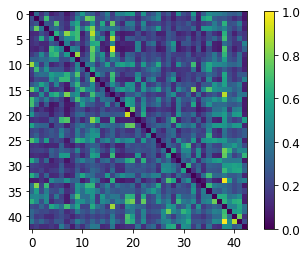

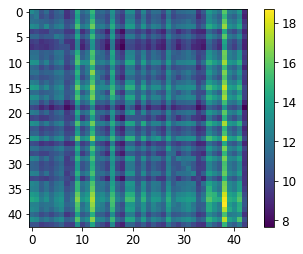

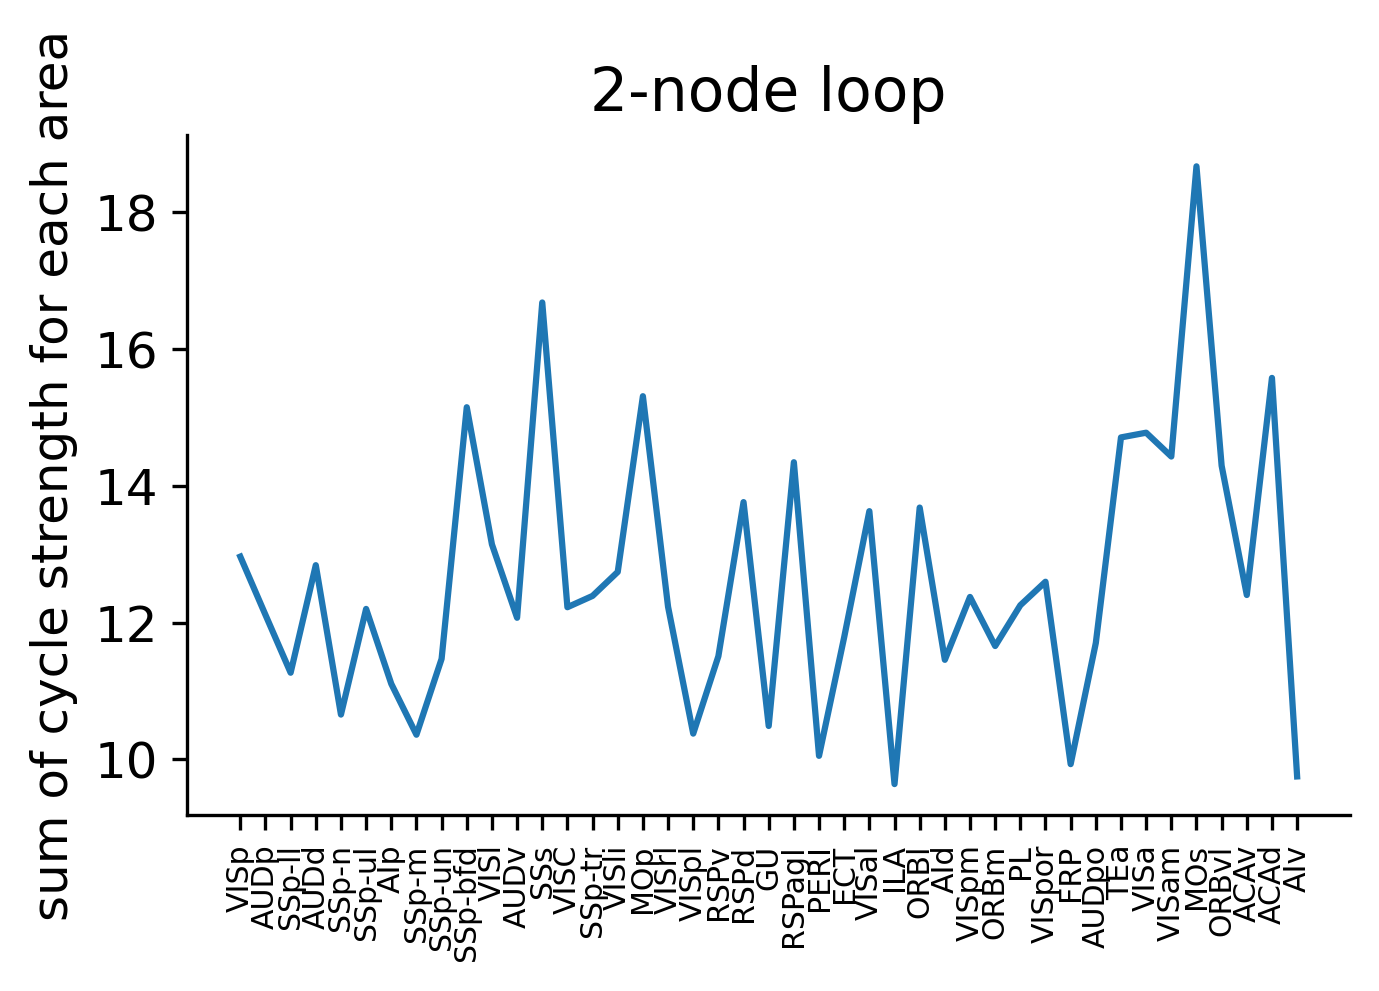

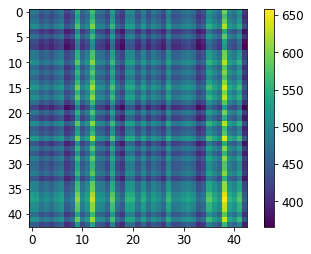

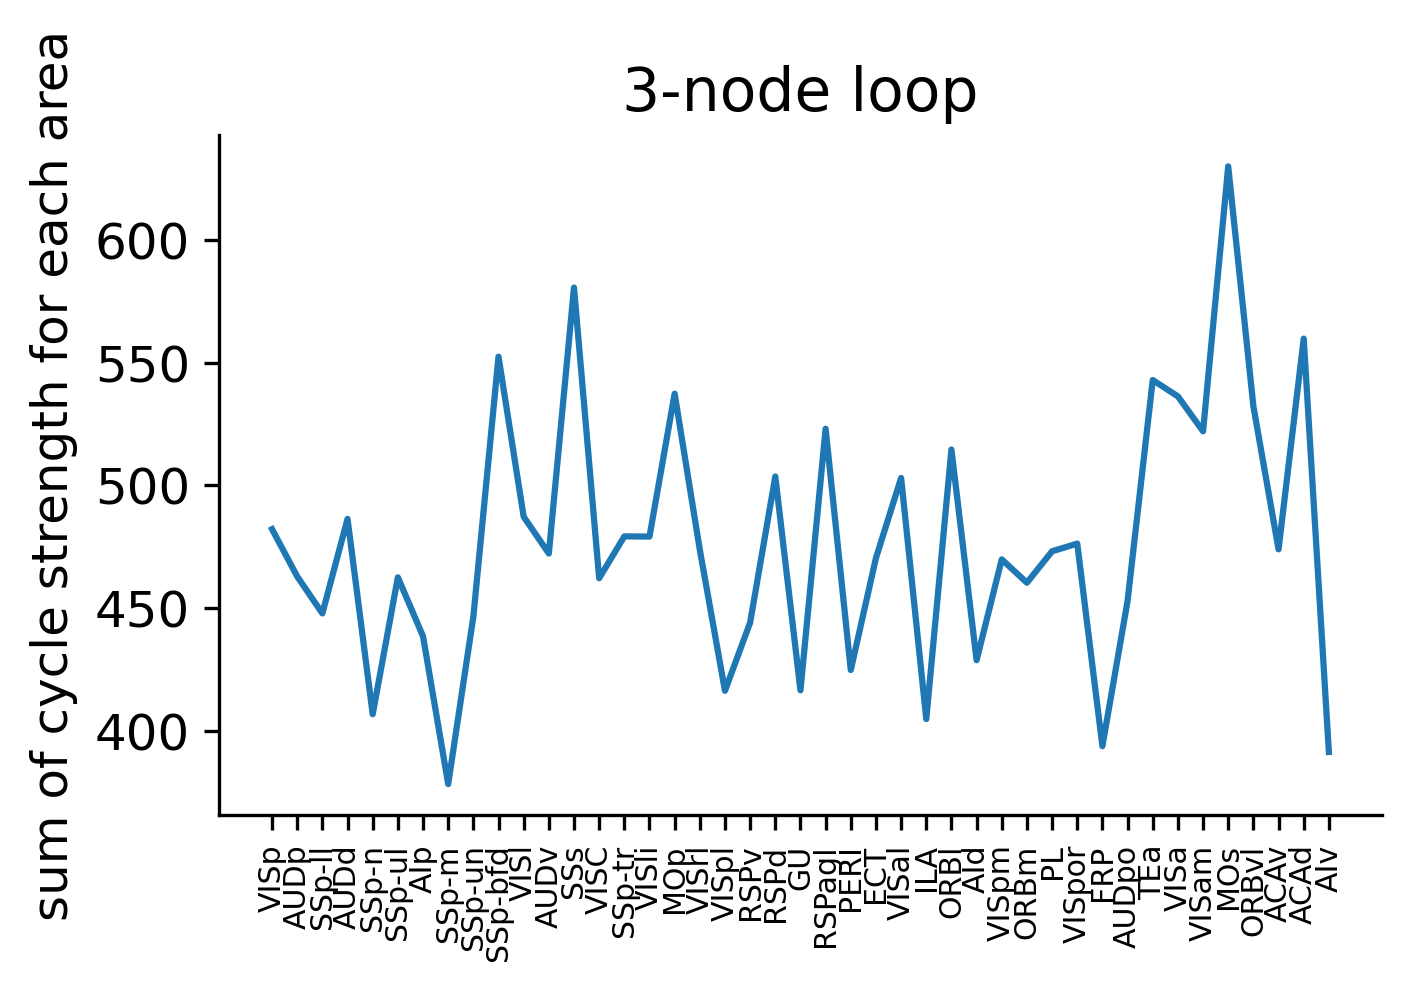

In [9]:
cycDict = getNnodeLoop(conn_cxcx_norm, True, area_list, (5,3), 12, False, 
                       ['loopMeasurement/2nodeLoop.svg', 'loopMeasurement/3nodeLoop.svg'])

In [10]:
cycDict_threshold = getNnodeLoop(conn_cxcx_threshold, False, area_list, (5,3), 12, False, 
                       ['loopMeasurement/2nodeLoopThres.svg', 'loopMeasurement/3nodeLoopThres.svg'])

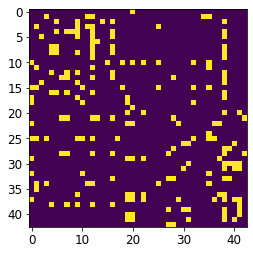

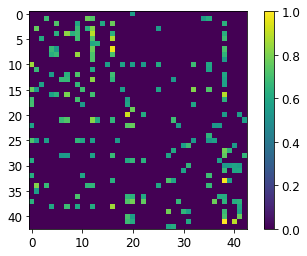

In [11]:
# show the binarized connection matrix based on normalized connections

binaryConn = conn_cxcx_norm > threshold
plt.imshow(binaryConn)
plt.figure()
plt.imshow(conn_cxcx_norm * binaryConn)
plt.colorbar()

[0.28888888888888886, 0.37254901960784315, 0.42105263157894735, 0.4807692307692308, 0.680327868852459, 0.5581395348837209, 0.5, 0.6209677419354839, 0.775, 0.3157894736842105, 0.3064516129032258, 0.6428571428571429, 0.3, 0.48148148148148145, 0.6, 0.48148148148148145, 0.4434782608695652, 0.2, 0.4642857142857143, 0.3409090909090909, 0.35333333333333333, 0.4523809523809524, 0.46078431372549017, 0, 0, 0.2247191011235955, 0.6666666666666666, 0.34210526315789475, 0.28125, 0.6578947368421053, 0.46153846153846156, 0.5192307692307693, 0.575, 0.5, 0.6, 0.32857142857142857, 0.38235294117647056, 0.3968253968253968, 0.20161290322580644, 0.34615384615384615, 0.42857142857142855, 0.3790322580645161, 0.6]


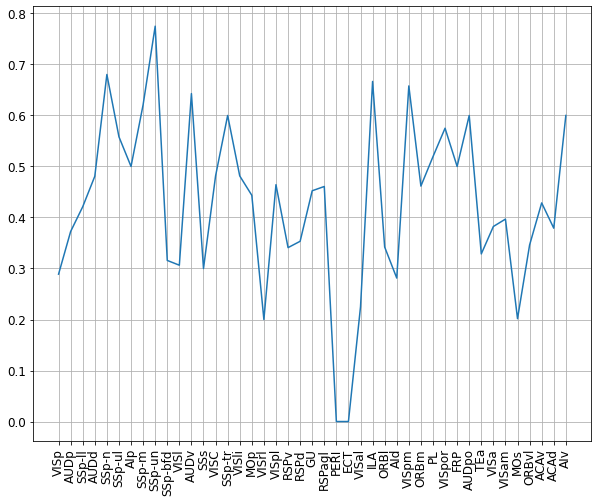

In [12]:
# 


G = nx.DiGraph(binaryConn)
# nx.draw_random(G)

def getClusteringCoefficient(G, area_list):
    ccDict = nx.clustering(G)
    n = len(area_list)
    ccList = []
    for i in range(n):
        ccList.append(ccDict[i])
    return ccList
cc = getClusteringCoefficient(G, area_list)

plt.figure(figsize=(10,8))
plt.plot(cc)
plt.xticks(range(len(area_list)), area_list, rotation=90)
plt.grid()
print(cc)

In [13]:
inputStr = np.sum(conn_cxcx_norm, axis = 1)

WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]


['r', 0.2507958374891697, 'r^2', 0.06289855210189403, 'pvalue', 0.26025796991663747, 'rSpear', 0.25127046866177305, 'rSpear^2', 0.06313684842150707, 'pvalueSpear', 0.2593269314724675]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
['prediction score', 0.5116279069767442]


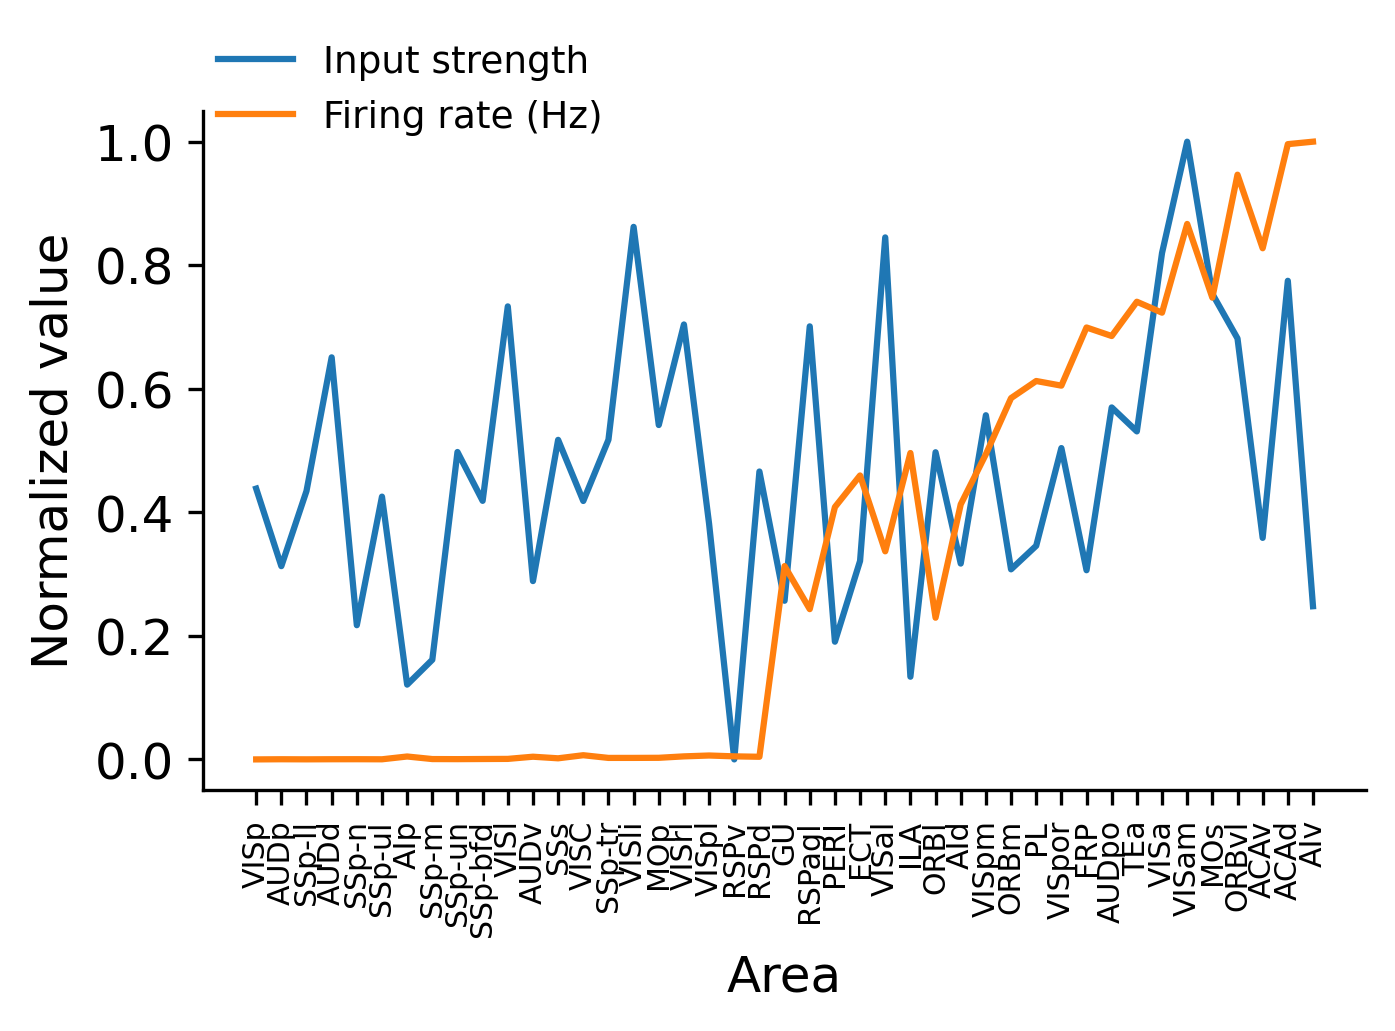

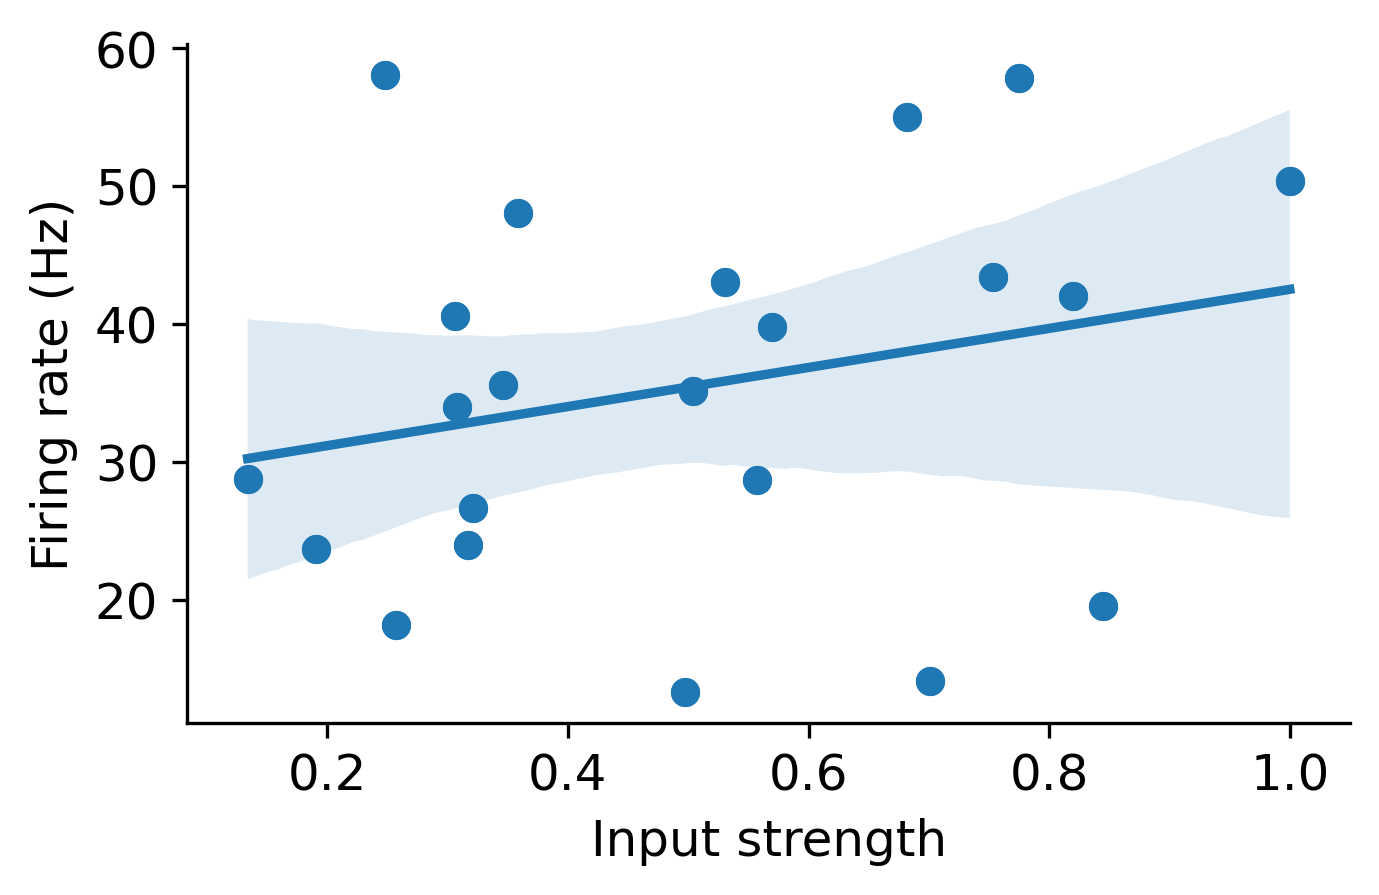

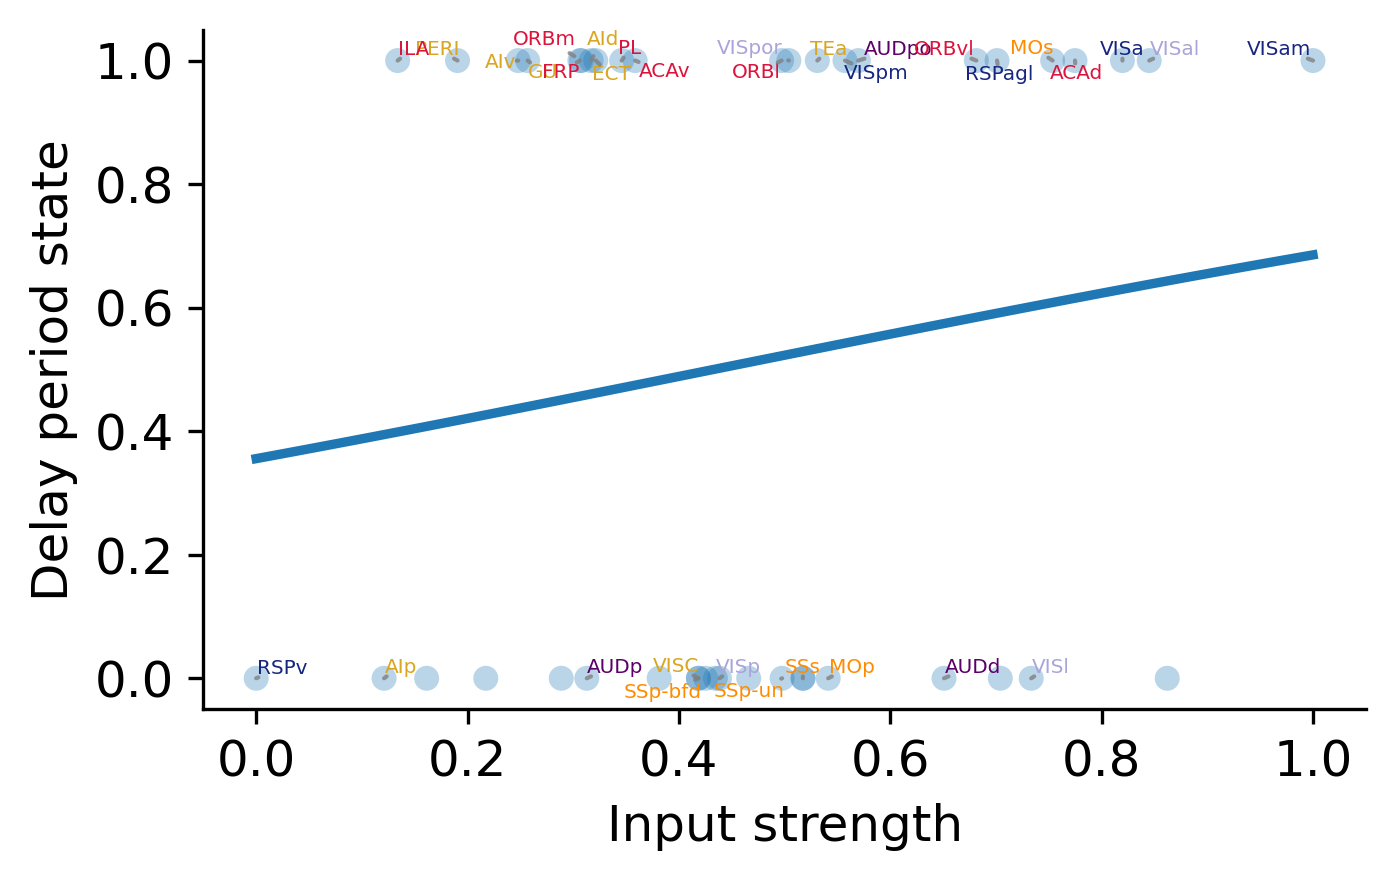

In [14]:
# compare input strength and FR

X = np.sum(conn_cxcx_norm, axis = 1)
inputStr = np.sum(conn_cxcx_norm, axis = 1)
X = (X - X.min()) / (X.max() - X.min())
Y = np.array(model_V1.persistentact_df['persistentact']) 
Xlabel = 'Input strength'
Ylabel = 'Firing rate (Hz)'
frThreshold = 5
plotXYcompr(X, Y, Xlabel, Ylabel, area_list, (5, 3), 12, True,
            'loopMeasurement/inp_FRcompr1.svg')
inpCorr = plotXYcomprCorrNotNormalize(X, Y, Xlabel, Ylabel, parameters, False, area_list, frThreshold, (5, 3), 12, True,
            'loopMeasurement/inp_FRcompr2.svg')
# plotXYcomprResidual(X, Y, Xlabel, frThreshold, (5, 3), 12, True,
#             'loopMeasurement/eig_FRcompr3.svg')
inpLogReg = plotXYLogReg(X, Y, Xlabel, 'Delay period state', True, parameters, area_list, noLabelAreas, frThreshold, (5, 3), 12, True,
            'loopMeasurement/inp_FRLogReg.svg') # Y is treated as binary with a threshold of frThreshold


0


WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]


['r', 0.23786342653303957, 'r^2', 0.05657900968203872, 'pvalue', 0.28644700911635596, 'rSpear', 0.2670807453416149, 'rSpear^2', 0.07133212453223256, 'pvalueSpear', 0.2295283525028699]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
['prediction score', 0.46511627906976744]


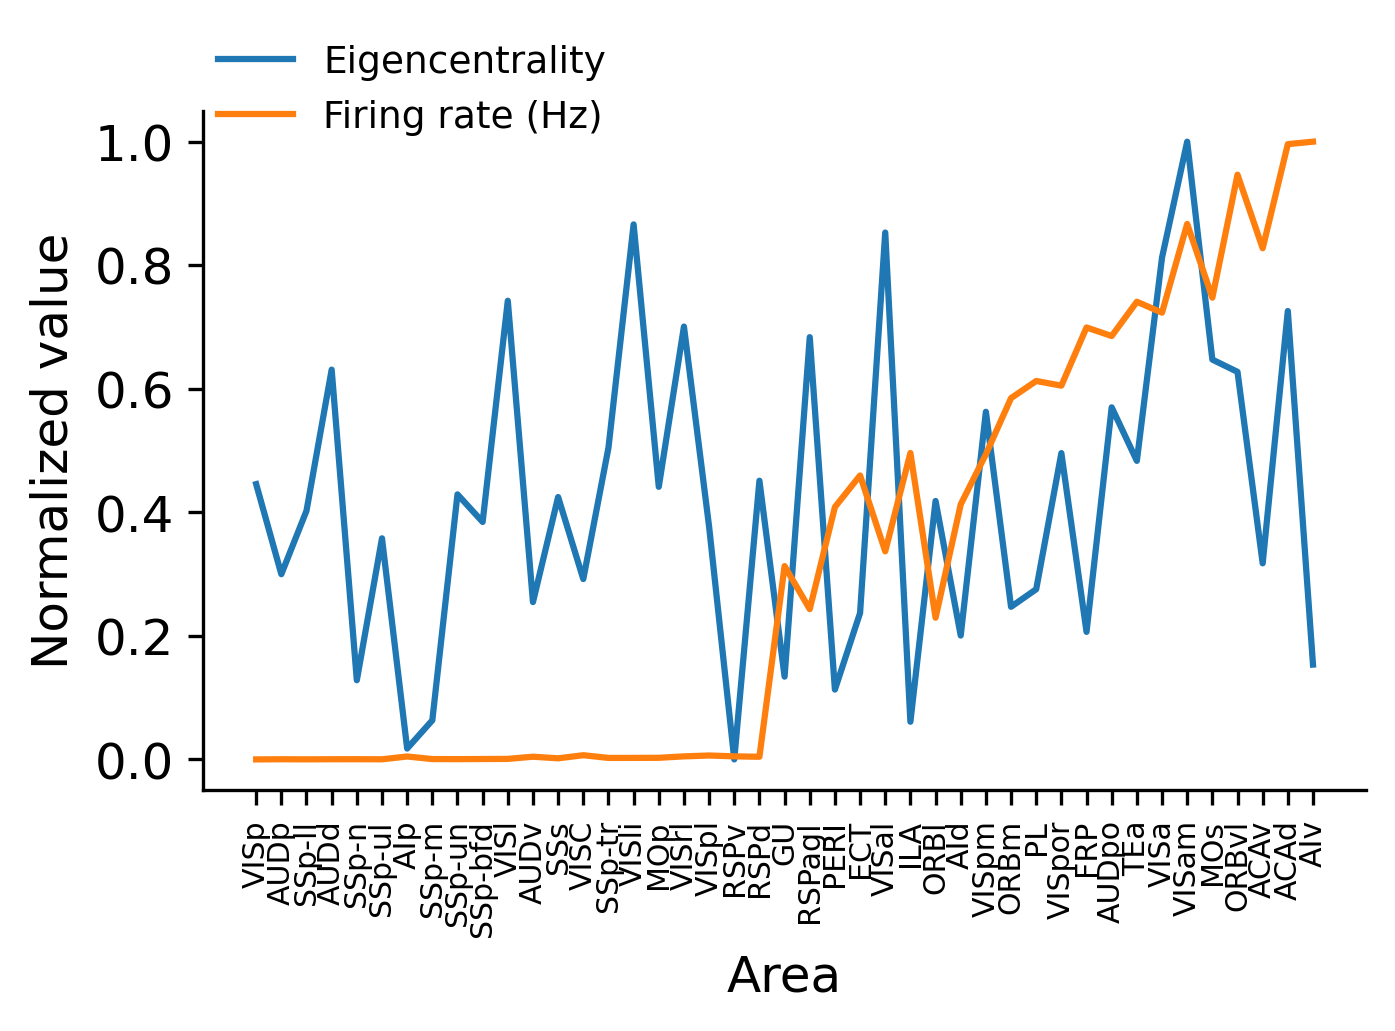

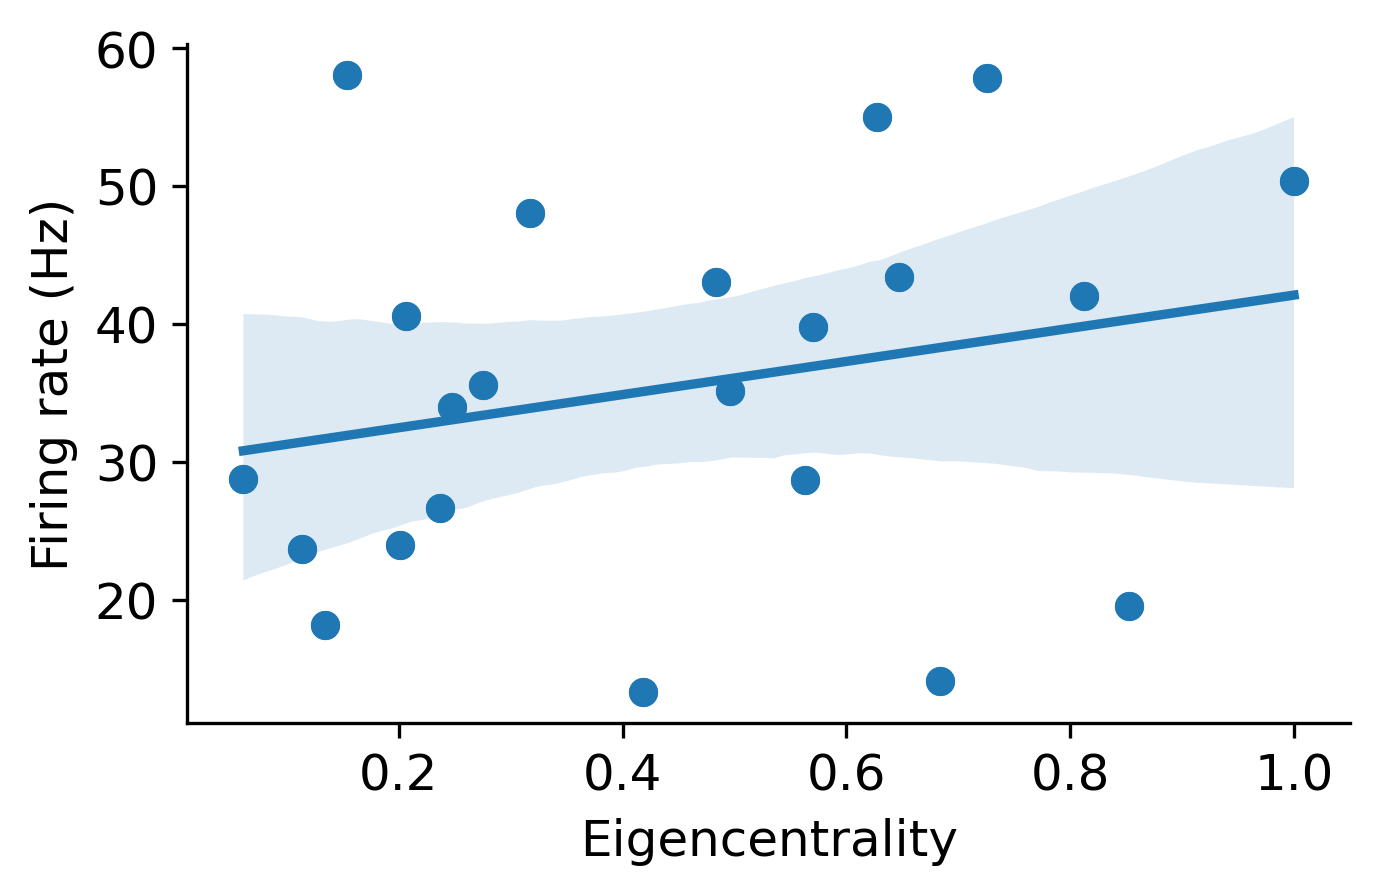

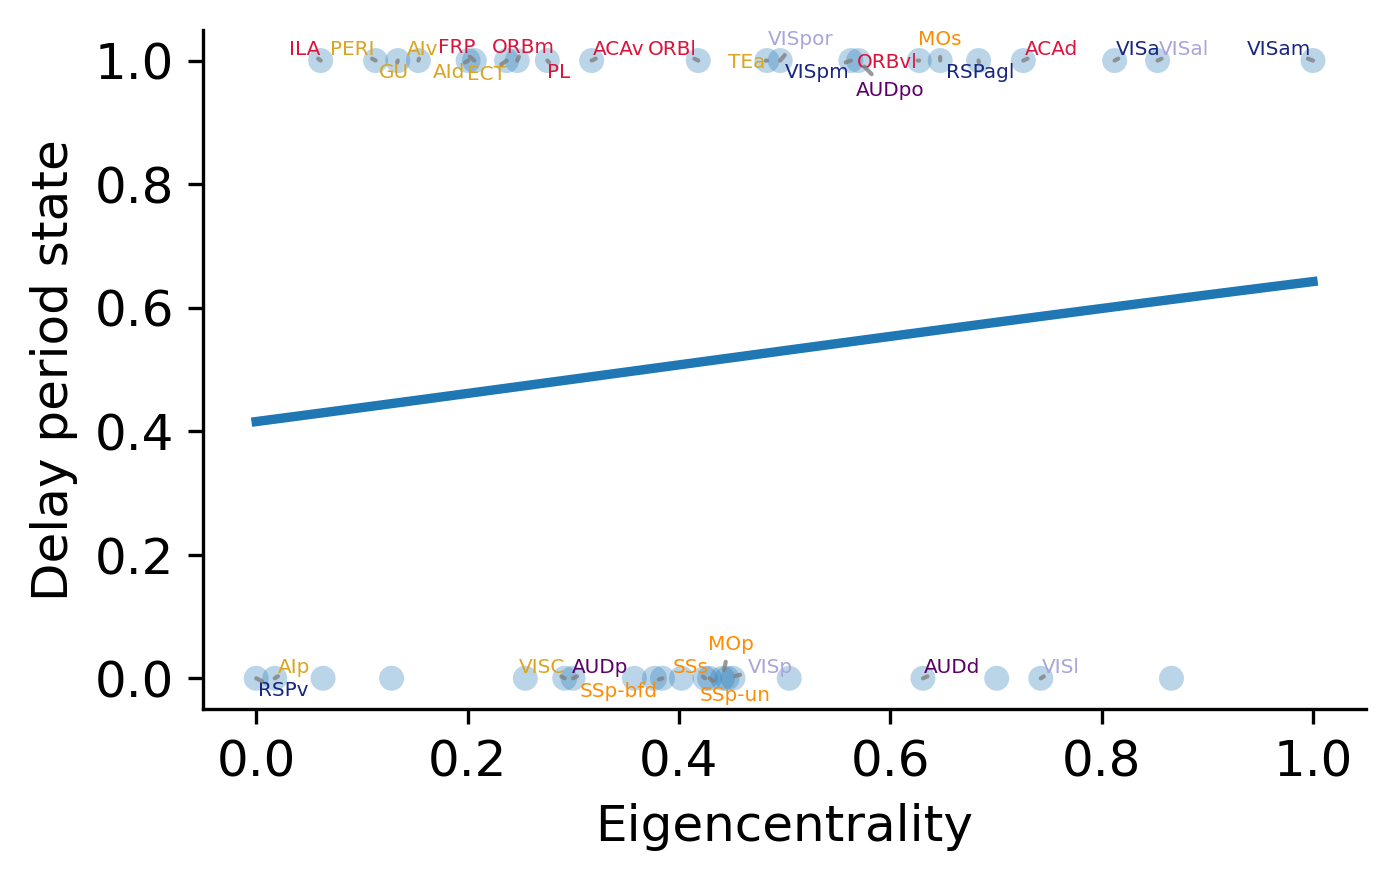

In [15]:
# compare eigcent and FR
eigV, eigCent = np.linalg.eig(conn_cxcx_norm)
ind = np.argmax(eigV)
print(ind)
X = np.abs(eigCent[:,ind])
eigPlain = X
X = (X - X.min()) / (X.max() - X.min())
Y = np.array(model_V1.persistentact_df['persistentact']) 
Xlabel = 'Eigencentrality'
Ylabel = 'Firing rate (Hz)'
frThreshold = 5
plotXYcompr(X, Y, Xlabel, Ylabel, area_list, (5, 3), 12, True,
            'loopMeasurement/eig_FRcompr1.svg')
eigCorr = plotXYcomprCorrNotNormalize(X, Y, Xlabel, Ylabel, parameters, False, area_list, frThreshold, (5, 3), 12, True,
            'loopMeasurement/eig_FRcompr2.svg')
# plotXYcomprResidual(X, Y, Xlabel, frThreshold, (5, 3), 12, True,
#             'loopMeasurement/eig_FRcompr3.svg')
eigLogReg = plotXYLogReg(X, Y, Xlabel, 'Delay period state',  True, parameters, area_list, noLabelAreas, frThreshold, (5, 3), 12, True,
            'loopMeasurement/eig_FRLogReg.svg') # Y is treated as binary with a threshold of frThreshold

In [16]:
# use the hierarchy scaling   start new
# mm11
# # use the scaled connection matrix 
# conn_sc = np.power(conn_cxcx, parameters['kSquishFln']) 
# newPref = model_V1.pref_matrix
# conn_sc_Hiermod = conn_sc * (2*newPref - 1)
# # conn_sc_Hiermod = conn_sc * newPref / (1 - newPref)
# print(np.min(conn_sc_Hiermod))
# conn_sc_Hiermod = conn_sc_Hiermod - np.min(conn_sc_Hiermod)

# np.fill_diagonal(conn_sc_Hiermod, 0)
# conn_sc_Hiermod = conn_sc_Hiermod * (conn_sc_Hiermod > 0)
# conn_cxcx_norm_Hiermod = conn_sc_Hiermod / np.max(np.abs(conn_sc_Hiermod))

# # use the scaled connection matrix
conn_sc = np.power(conn_cxcx, parameters['kSquishFln'])
# conn_cxcx_norm = conn_sc / np.max(conn_sc)
newPref = model_V1.pref_matrix
pvMat = np.matlib.repmat( np.array(normPVgrad_df), 1, len(area_list))
# pvMat = np.matlib.repmat( pvList, 1, len(area_list))
# hierMat = np.matlib.repmat( np.array(hierarchy_df), 1, len(area_list))

# coeff = newPref - (1 - newPref)
coeff = newPref - pvMat * (1 - newPref)
# coeff = newPref * (1 + 1 * pvMat) - pvMat * (1 - newPref)

# coeff = 1 - pvMat
# coeff = newPref / pvMat
# coeff = newPref / pvMat + newPref - (1 - newPref)
# coeff = hierMat

# coeff[coeff < 0] = 0

minCoeff = np.min(coeff)
print(minCoeff)

# conn_cxcx_norm_Hiermod = conn_cxcx_norm * (2 * (newPref - minPref) )

# conn_cxcx_norm_Hiermod = conn_cxcx_norm * (coeff - minCoeff + 0.1)
conn_cxcx_norm_Hiermod = conn_cxcx_norm * coeff

# conn_cxcx_norm_Hiermod = conn_cxcx_norm * newPref / (1 - newPref)
print(np.min(conn_cxcx_norm_Hiermod))
# conn_cxcx_norm_Hiermod = conn_cxcx_norm_Hiermod - np.min(conn_cxcx_norm_Hiermod)

np.fill_diagonal(conn_cxcx_norm_Hiermod, 0)
# conn_cxcx_norm_Hiermod = conn_cxcx_norm_Hiermod * (conn_cxcx_norm_Hiermod > 0)

conn_cxcx_norm_Hiermod = conn_cxcx_norm_Hiermod / np.max(np.abs(conn_cxcx_norm_Hiermod))

threshold = 0.2 # 0.87 #0.08  0.45 0.34
#0.43   

conn_cxcx_Hiermod_threshold =  conn_cxcx_norm_Hiermod * (conn_cxcx_norm_Hiermod > threshold) # threholding 

-1.0
-0.3826328777202707


In [17]:
with open('results/conn_cxcx_norm.json', 'w') as f:
    json.dump(conn_cxcx_norm.tolist(), f)
with open('results/conn_cxcx_norm_Hiermod.json', 'w') as f:
    json.dump(conn_cxcx_norm_Hiermod.tolist(), f)

In [18]:
def makeHeatPlot(mat, area_list, Xlabel, Ylabel, cbarlabel, colormap, figureSize, fontSize, saveFig, fileName):
    fig = plt.figure(figsize=figureSize, dpi=300, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': fontSize})
    plt.imshow(mat, colormap, norm=TwoSlopeNorm(0))
    cbar = plt.colorbar()
    cbar.set_label(cbarlabel)
    plt.xticks(range(len(area_list)), area_list, rotation=90, fontsize=fontSize*0.4)
    plt.yticks(range(len(area_list)), area_list, fontsize=fontSize*0.4)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    
    # save figure
    if saveFig:
        plt.savefig('figure/' + fileName, dpi=300, bbox_inches='tight', transparent=True)
    # plt.savefig('figure/neurondensity_grad.png',dpi=80,bbox_inc

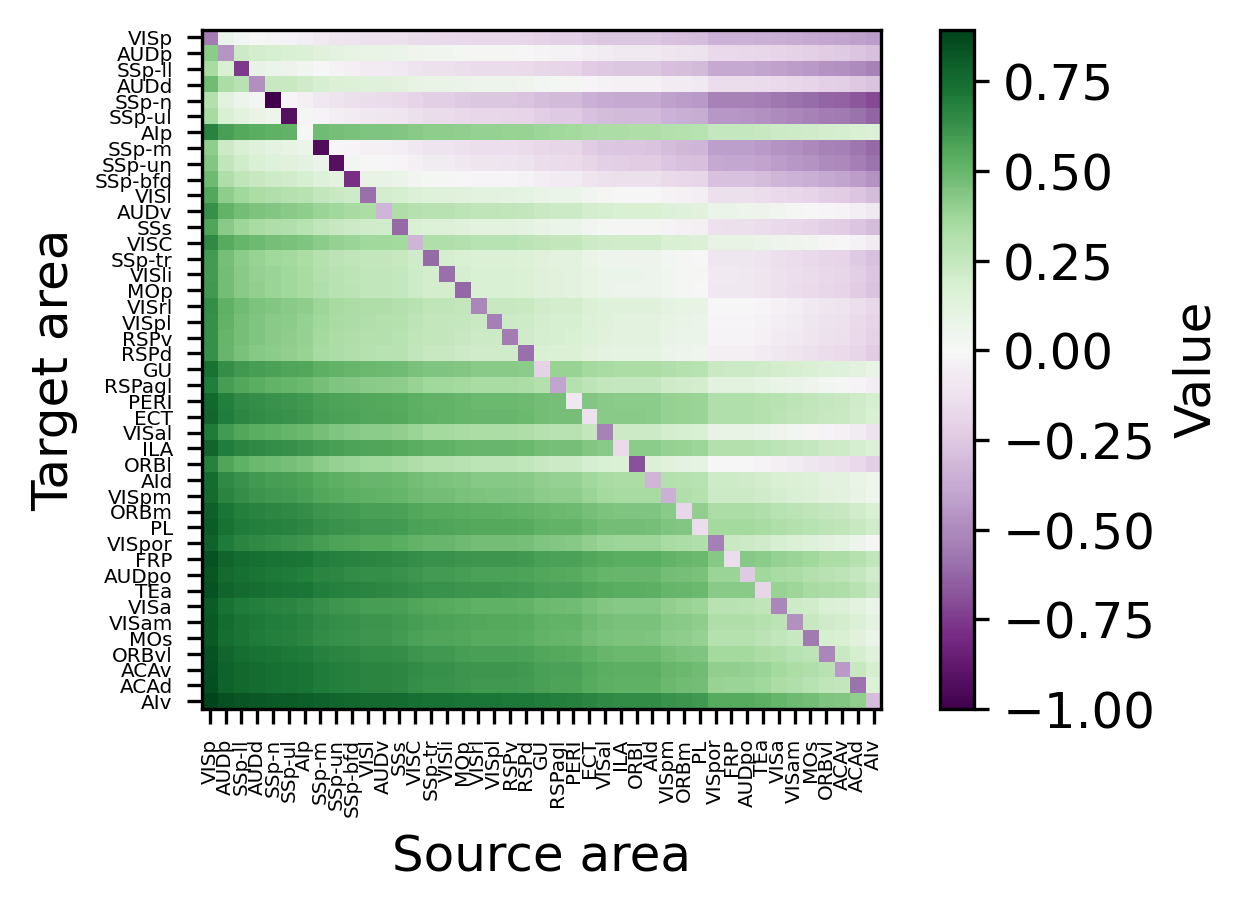

In [19]:
makeHeatPlot(coeff, area_list, 'Source area', 'Target area', 'Value','PRGn', (5, 3), 12, True, 'loopMeasurement/heat_coeff.svg')

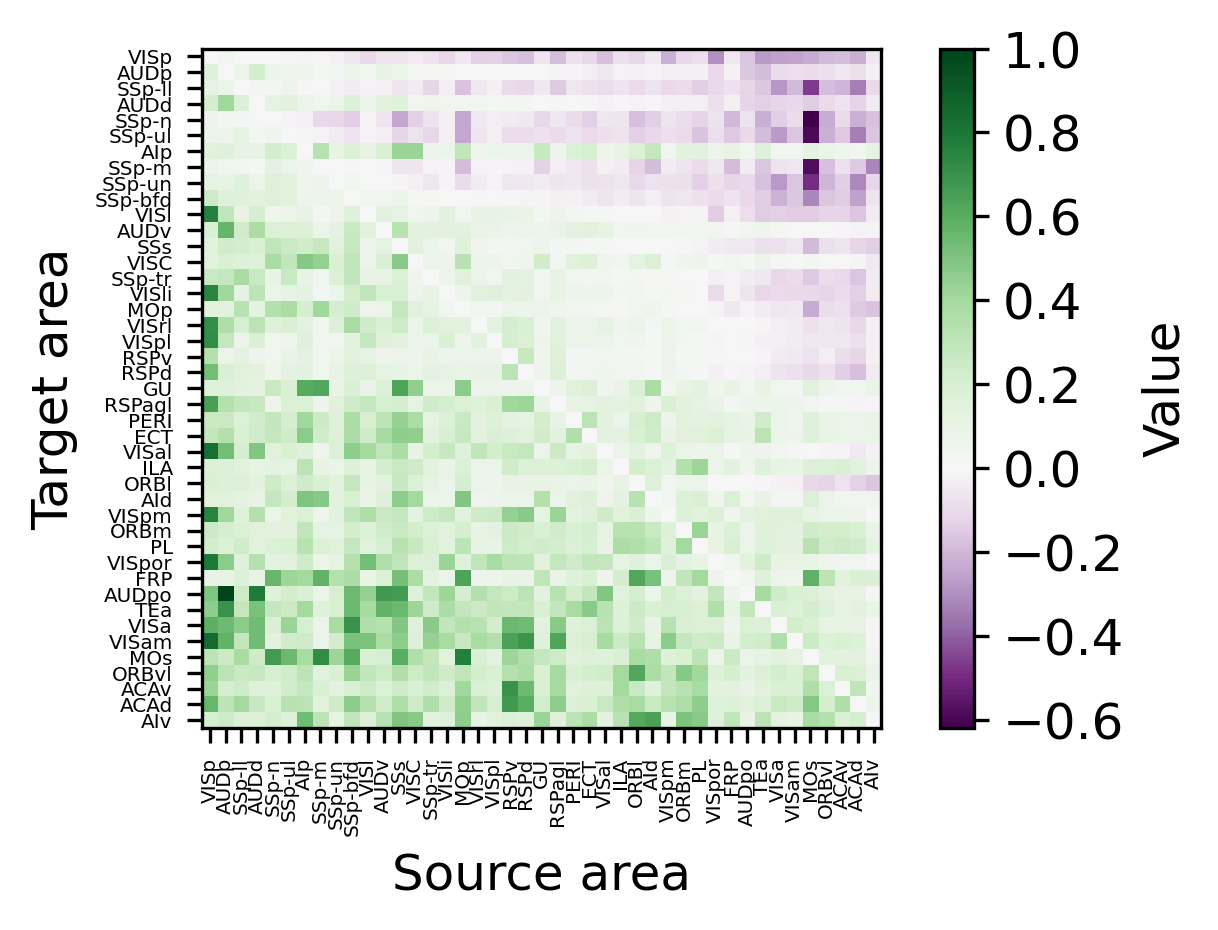

In [20]:
makeHeatPlot(conn_cxcx_norm_Hiermod, area_list, 'Source area', 'Target area', 'Value','PRGn', (5, 3), 12, True, 'loopMeasurement/heat_modConn.svg')

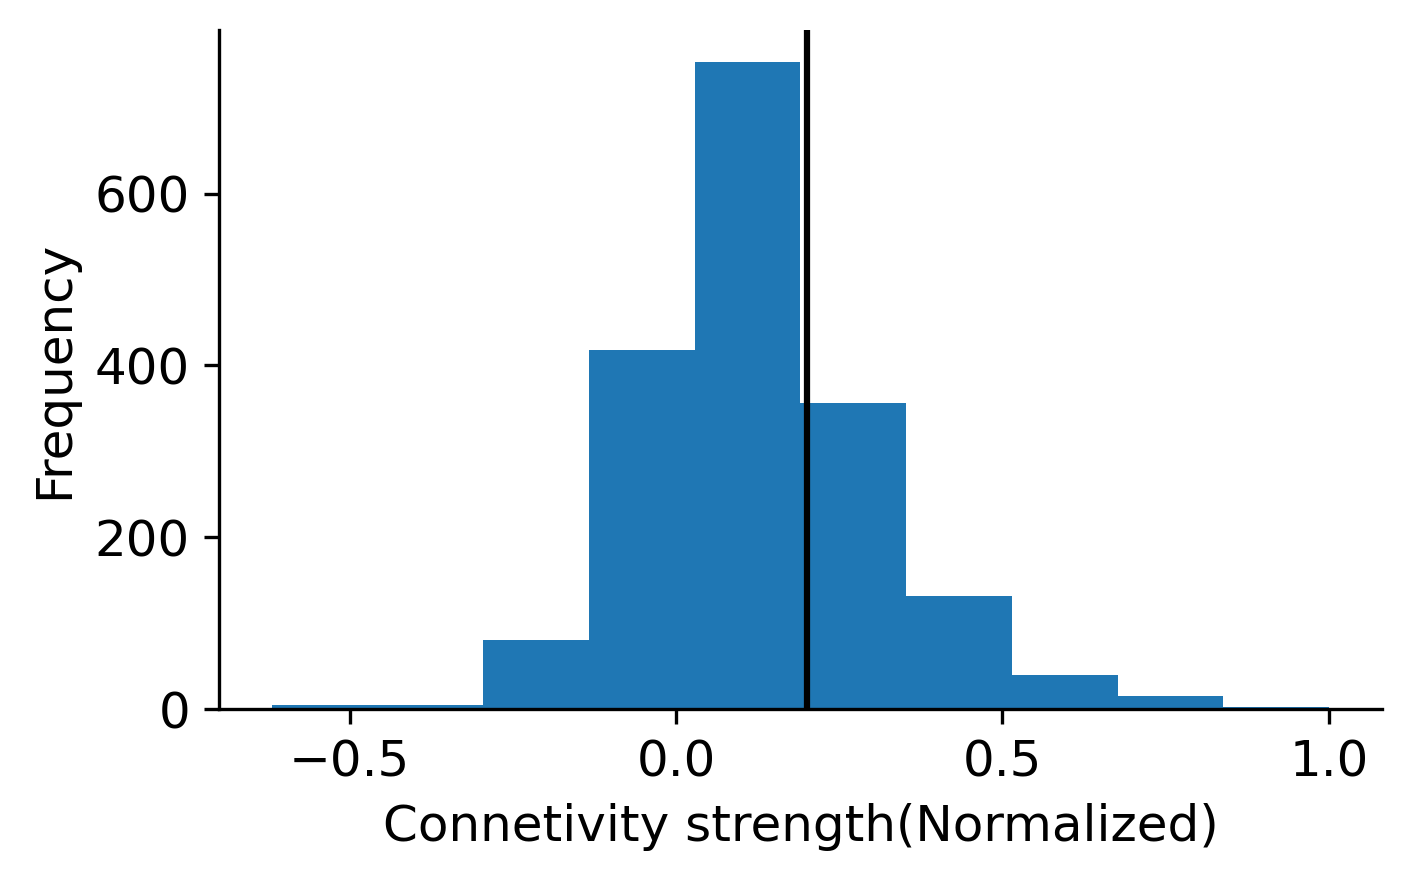

In [21]:
getConnHist(conn_cxcx_norm_Hiermod, 'linear', threshold, (5,3), 12, True, 'loopMeasurement/hierModConnectionHist.svg')

In [22]:
# cycDict_Hiermod = getNnodeLoop(conn_cxcx_norm_Hiermod, True, area_list, (10,6), 12, False, 
#                           ['loopMeasurement/2NodeLoopPVmodconn.svg', 'loopMeasurement/3NodeLoopPVmodconn.svg'])


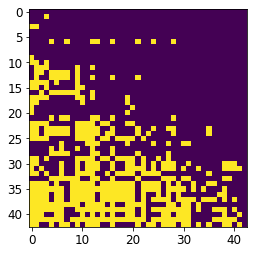

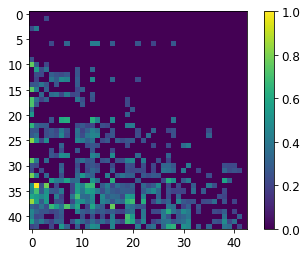

In [23]:
# show the binarized connection matrix based on normalized connections
binaryConn = conn_cxcx_norm_Hiermod > threshold
plt.imshow(binaryConn)
plt.figure()
plt.imshow(conn_cxcx_norm_Hiermod * binaryConn)
plt.colorbar()

In [25]:
def makeScatter(X, Y, area_list, figTitle, xlabel, ylabel, figureSize, fontSize, saveFig, fileName):
    fig = plt.figure(figsize=figureSize, dpi=300, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': fontSize})
    plt.scatter(X, Y)

    plt.title(figTitle)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    axes = plt.gca()
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    if saveFig:
        fig.savefig('figure/' + fileName , dpi=300, bbox_inches='tight', transparent=True)
    return

WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]


['r', 0.16378660460026848, 'r^2', 0.026826051846484688, 'pvalue', 0.4664146390102202, 'rSpear', 0.18356397230155136, 'rSpear^2', 0.03369573192712472, 'pvalueSpear', 0.41351905228055885]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
['prediction score', 0.7209302325581395]


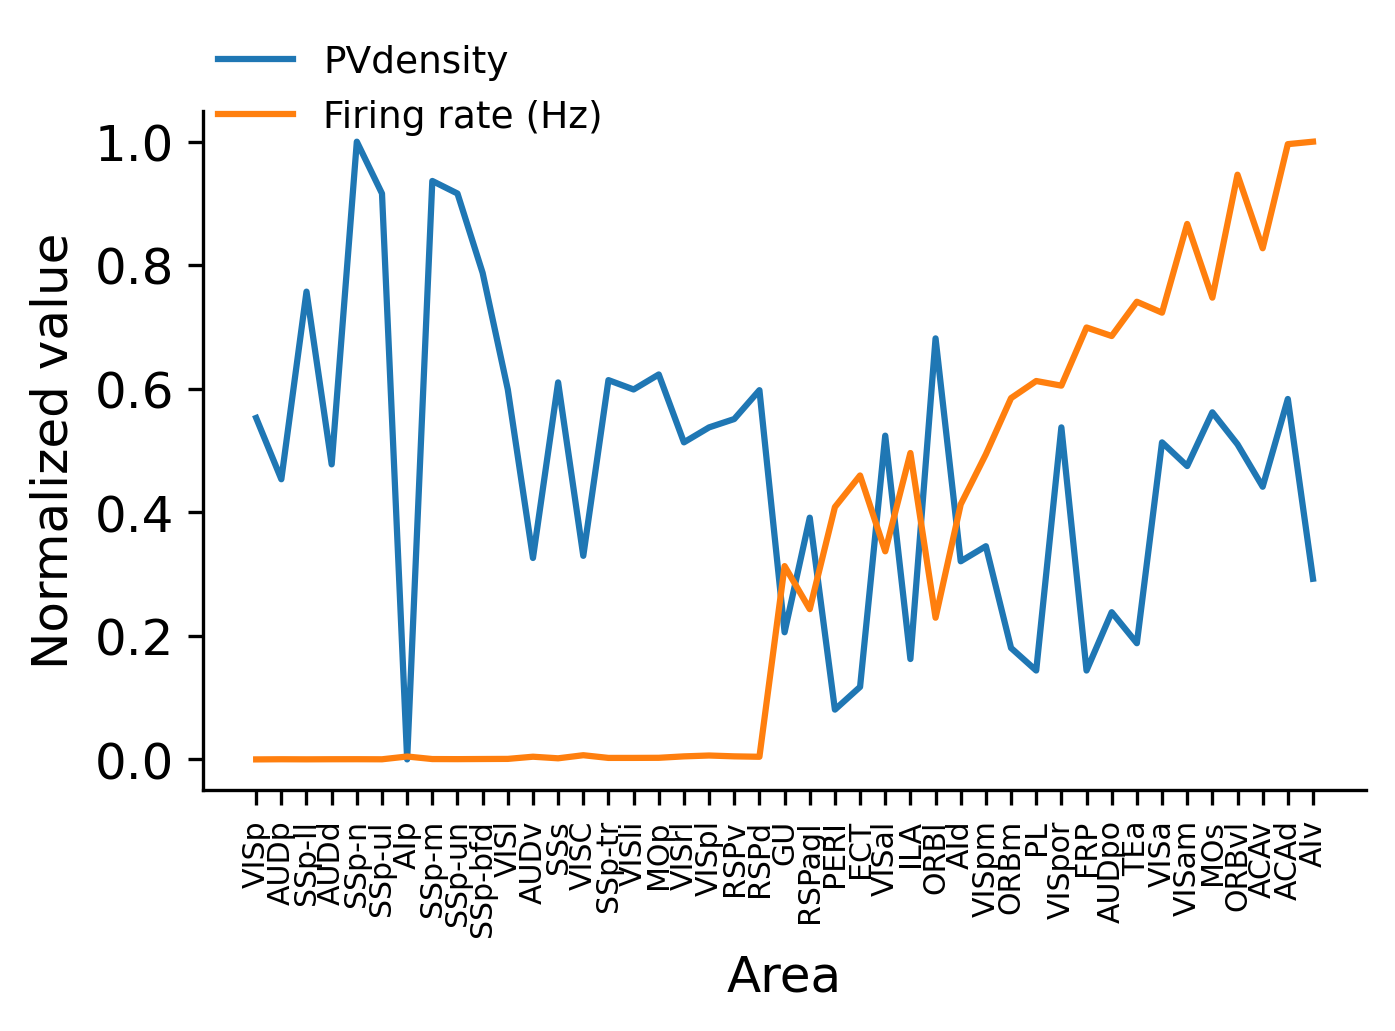

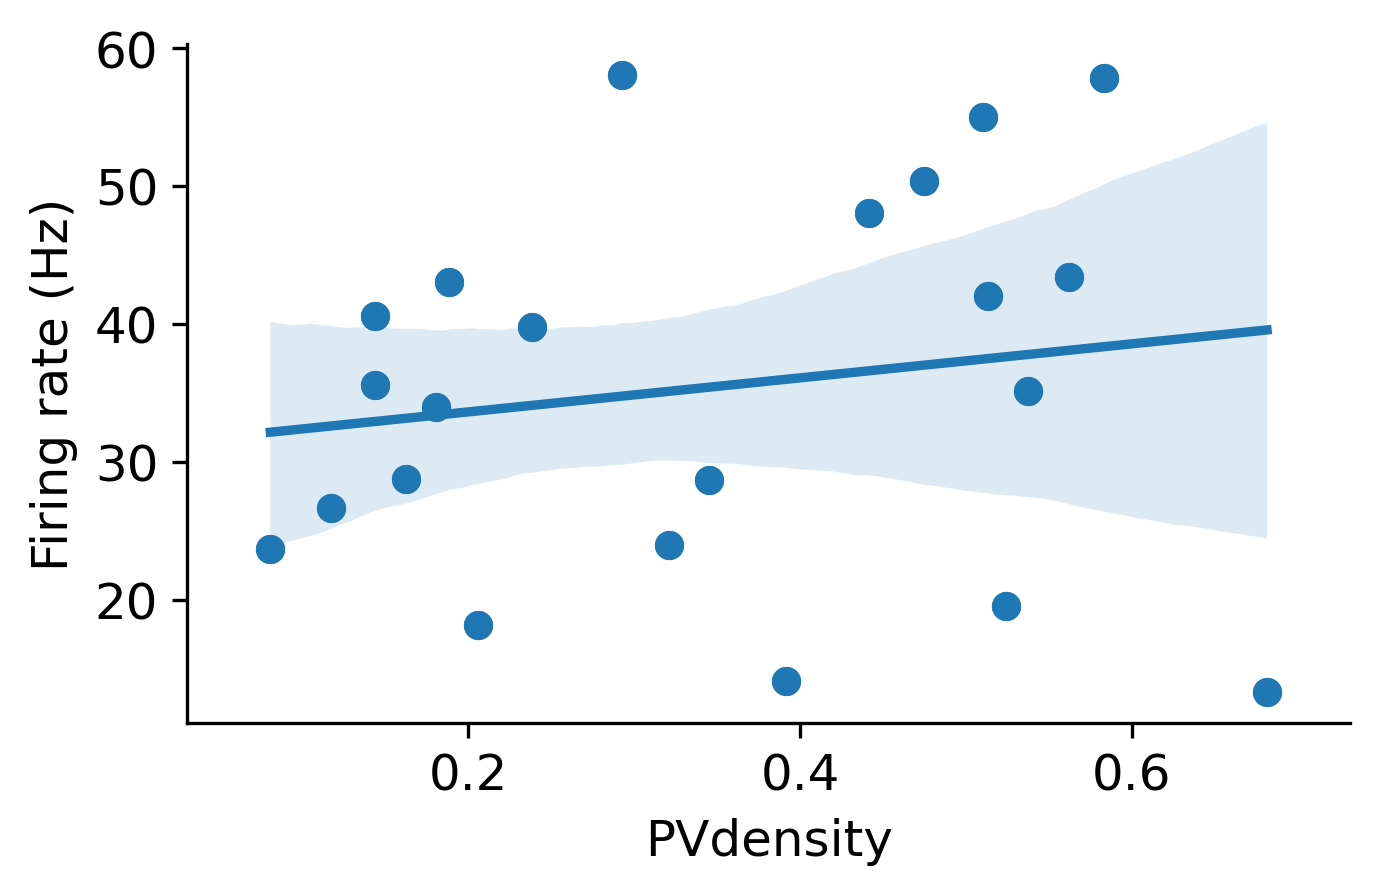

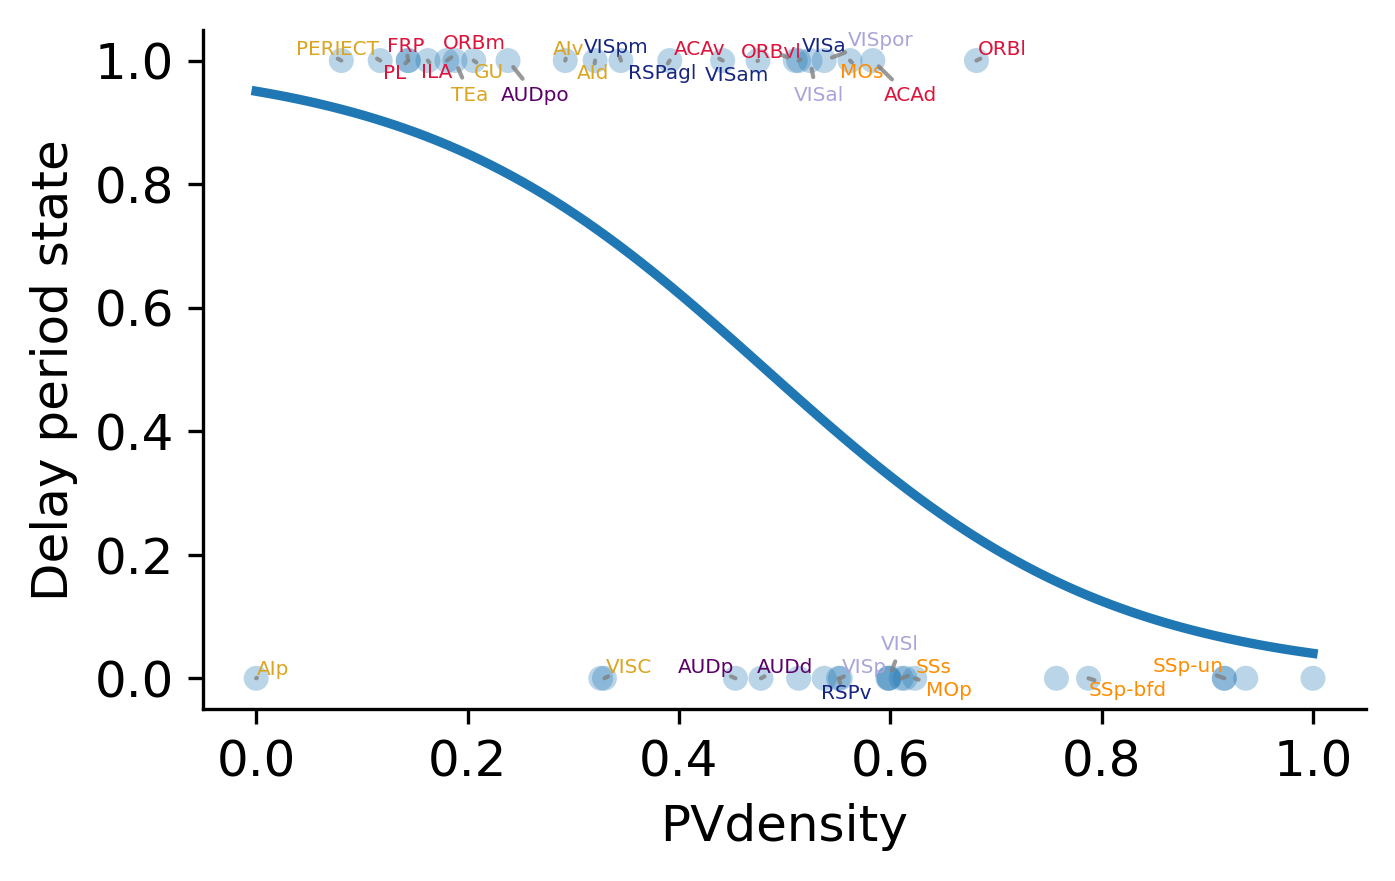

In [26]:
# key test  PV vs. FR pattern
X = np.array(normPVgrad_df).reshape((-1))
Y = np.array(model_V1.persistentact_df['persistentact'])
Xlabel = 'PVdensity'
Ylabel = 'Firing rate (Hz)'
frThreshold = 5
plotXYcompr(X, Y, Xlabel, Ylabel, area_list, (5, 3), 12, True,
            'loopMeasurement/PVFRcompr1.svg')
PVCorr = plotXYcomprCorrNotNormalize(X, Y, Xlabel, Ylabel, parameters, False, area_list, frThreshold, (5, 3), 12, True,
            'loopMeasurement/PVFRcompr2.svg')
# plotXYcomprResidual(X, Y, Xlabel, frThreshold, (5, 3), 12, True,
#             'loopMeasurement/PVFRcompr3.svg')
PVLogReg = plotXYLogReg(X, Y, Xlabel, 'Delay period state', True, parameters, area_list, noLabelAreas, frThreshold, (5, 3), 12, True,
            'loopMeasurement/PVFRLogReg.svg') # Y is treated as binary with a threshold of frThreshold

WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
 [py.warnings]


['r', 0.9475277567501698, 'r^2', 0.8978088498120089, 'pvalue', 2.2978318739467934e-11, 'rSpear', 0.9525691699604744, 'rSpear^2', 0.9073880235591871, 'pvalueSpear', 8.546326231115174e-12]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
An error occurred: Perfect separation detected, results not available


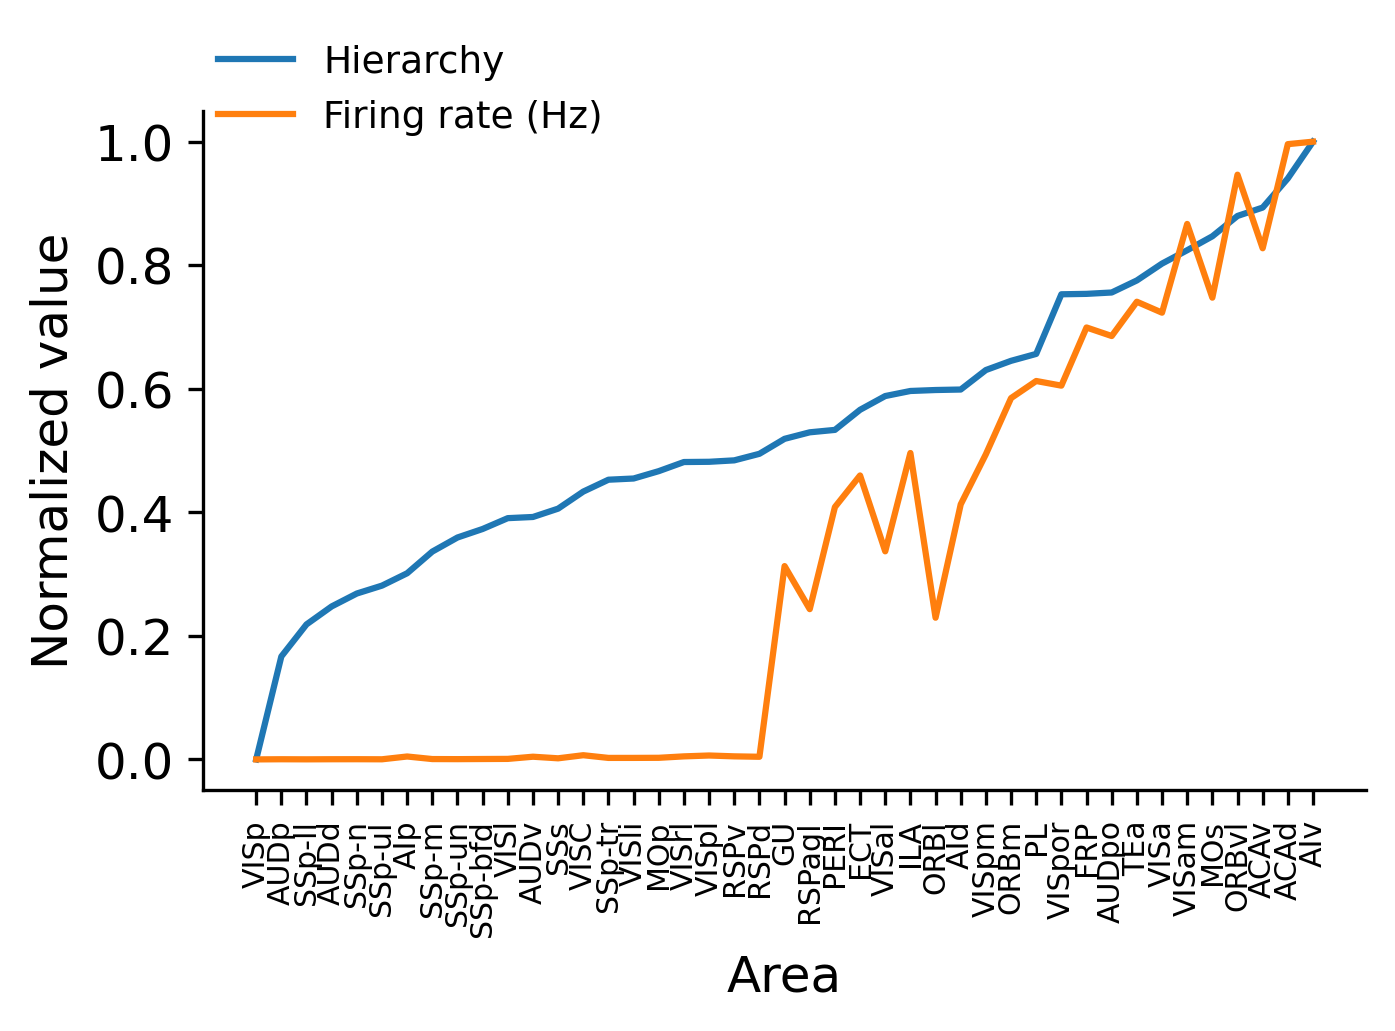

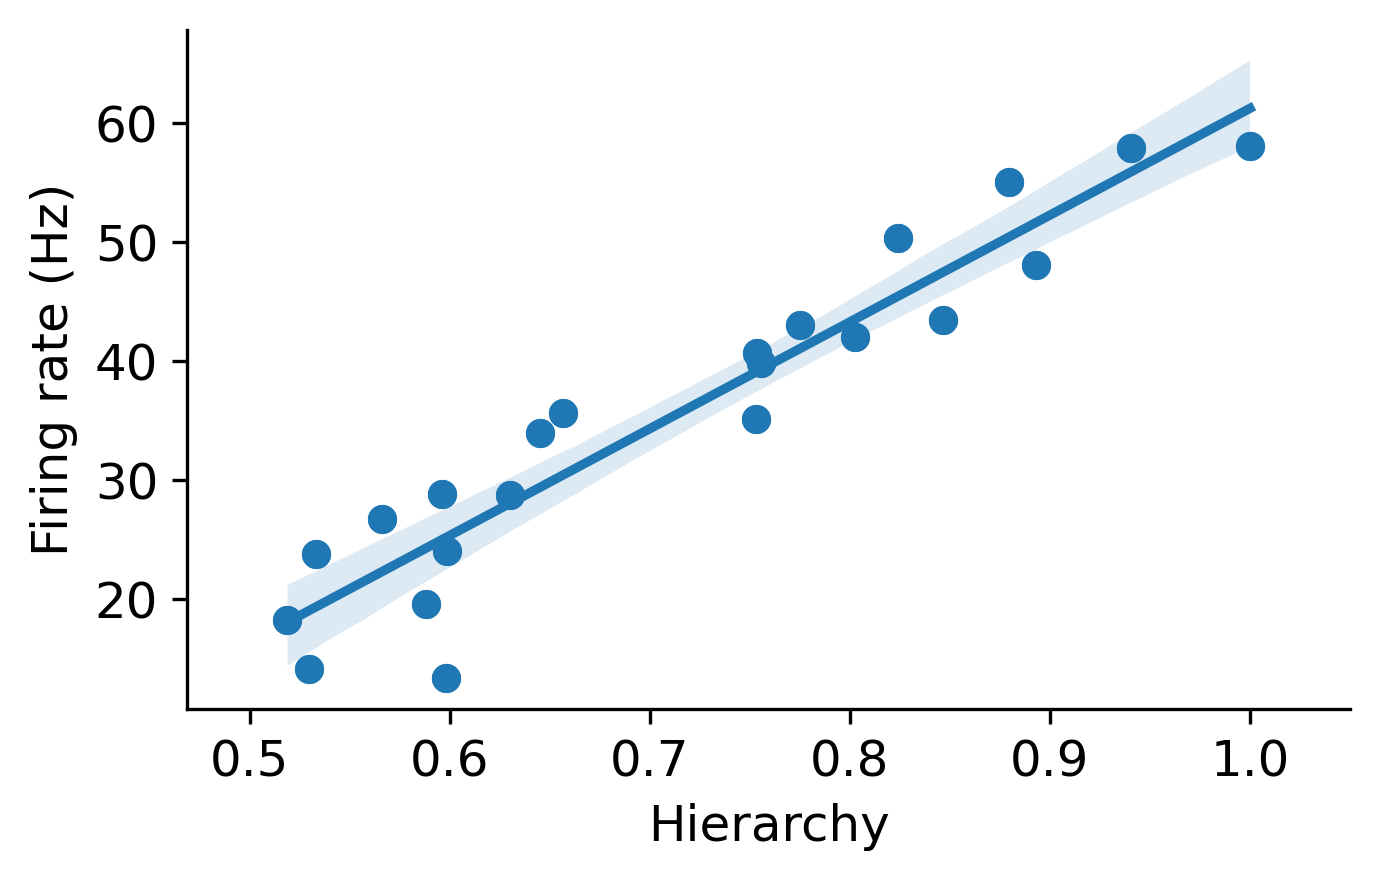

In [27]:
# key test  Hier vs. FR pattern
X = np.array(hierarchy_df).reshape((-1))
Y = np.array(model_V1.persistentact_df['persistentact'])
Xlabel = 'Hierarchy'
Ylabel = 'Firing rate (Hz)'
frThreshold = 5
plotXYcompr(X, Y, Xlabel, Ylabel, area_list, (5, 3), 12, True,
            'loopMeasurement/HierFRcompr1.svg')
HierCorr = plotXYcomprCorrNotNormalize(X, Y, Xlabel, Ylabel, parameters, False, area_list, frThreshold, (5, 3), 12, True,
            'loopMeasurement/HierFRcompr2.svg')
# plotXYcomprResidual(X, Y, Xlabel, frThreshold, (5, 3), 12, True,
#             'loopMeasurement/HierFRcompr3.svg')


try:
    HierLogReg = plotXYLogReg(X, Y, Xlabel, 'Delay period state', True, parameters, area_list, noLabelAreas, frThreshold, (5, 3), 12, True,
            'loopMeasurement/HierFRLogReg.svg') # Y is treated as binary with a threshold of frThreshold
except Exception as e:
    print("An error occurred:", e)

In [28]:
inputStrHierMod = np.sum(conn_cxcx_norm_Hiermod, axis = 1)

-4.5556734221624415 13.506115304647816


WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]


['r', 0.8872831030961151, 'r^2', 0.7872713050398713, 'pvalue', 3.7239472207993836e-08, 'rSpear', 0.8780350084697911, 'rSpear^2', 0.7709454760985461, 'pvalueSpear', 7.873710776921188e-08]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
['prediction score', 0.9534883720930233]


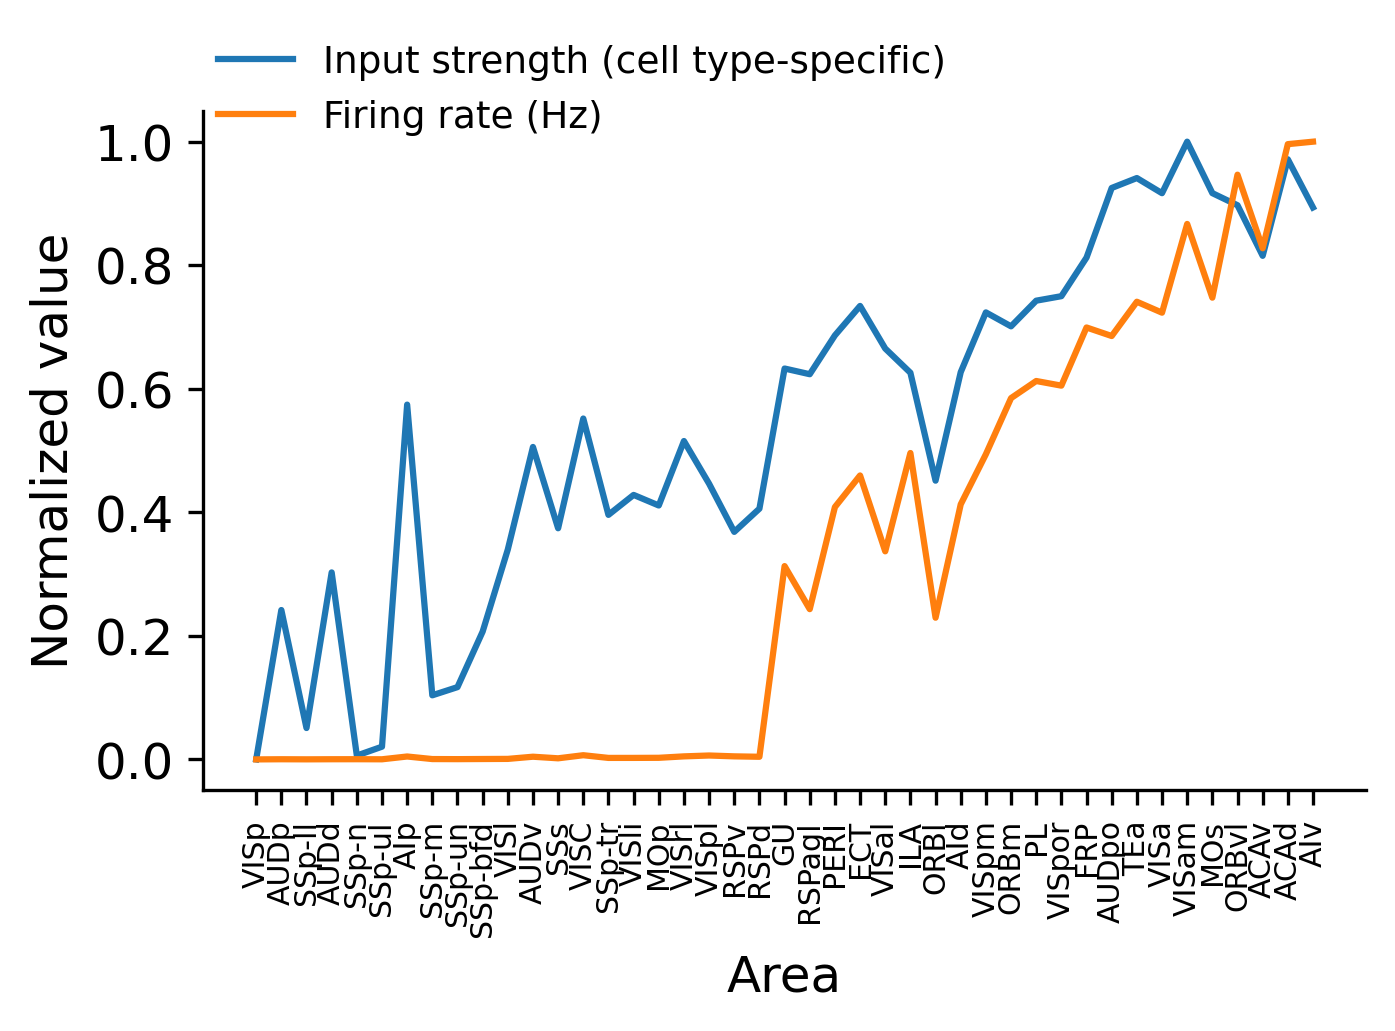

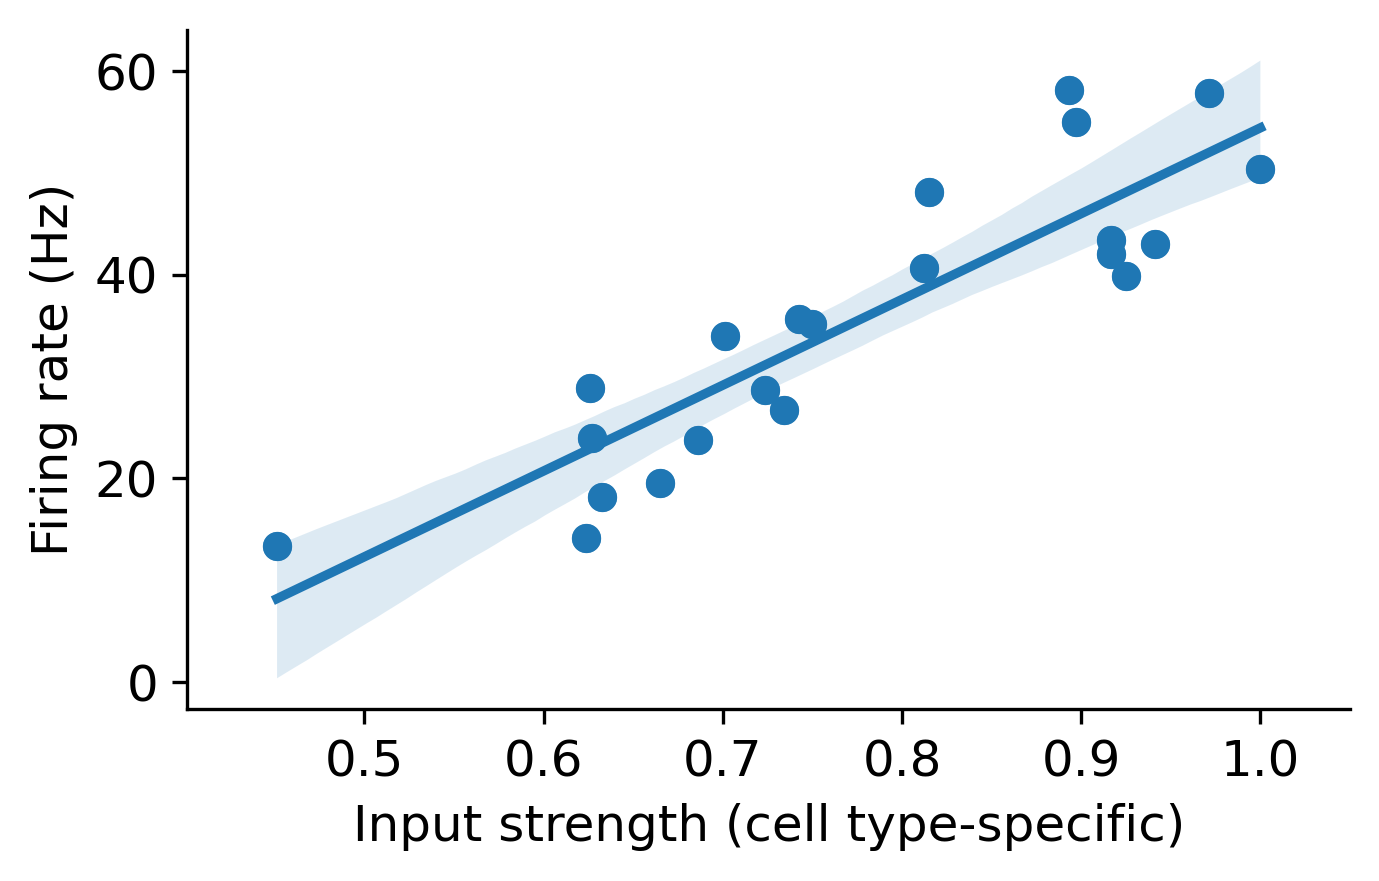

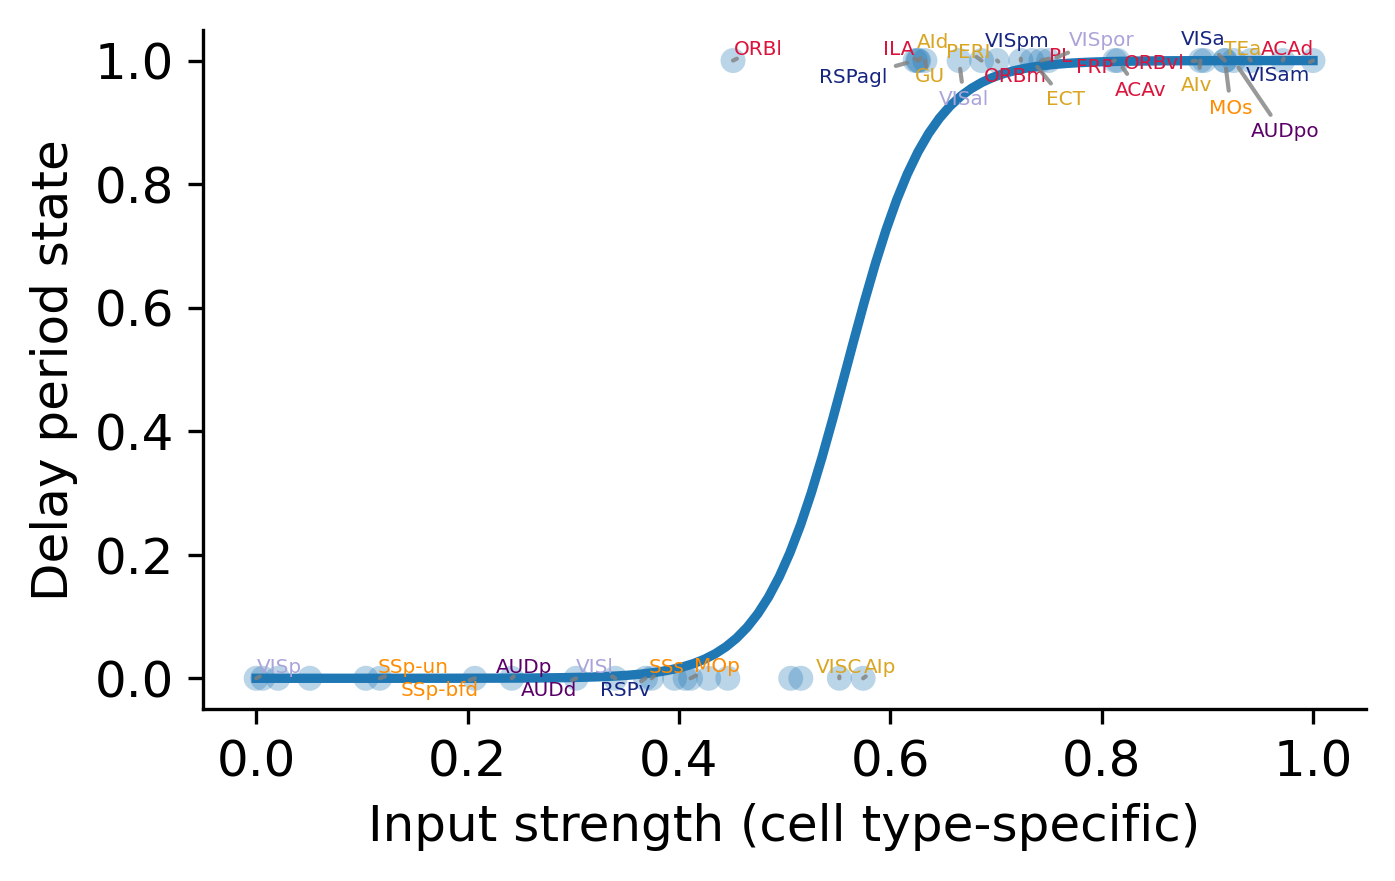

In [29]:
# compare cell type-specific input strength and FR

X = np.sum(conn_cxcx_norm_Hiermod, axis = 1)
inputStrHierMod = np.sum(conn_cxcx_norm_Hiermod, axis = 1)
print(X.min(), X.max())
X = (X - X.min()) / (X.max() - X.min())
Y = np.array(model_V1.persistentact_df['persistentact']) 
Xlabel = 'Input strength (cell type-specific)'
Ylabel = 'Firing rate (Hz)'
frThreshold = 5
plotXYcompr(X, Y, Xlabel, Ylabel, area_list, (5, 3), 12, True,
            'loopMeasurement/inpHiermod_FRcompr1.svg')
inpHiermodCorr = plotXYcomprCorrNotNormalize(X, Y, Xlabel, Ylabel, parameters, False, area_list, frThreshold, (5, 3), 12, True,
            'loopMeasurement/inpHiermod_FRcompr2.svg')
# plotXYcomprResidual(X, Y, Xlabel, frThreshold, (5, 3), 12, True,
#             'loopMeasurement/eig_FRcompr3.svg')
inpHiermodLogReg = plotXYLogReg(X, Y, Xlabel, 'Delay period state',  True, parameters, area_list, noLabelAreas, frThreshold, (5, 3), 12, True,
            'loopMeasurement/inpHiermod_FRLogReg.svg') # Y is treated as binary with a threshold of frThreshold

0.054310186650662264 0.24927853763333427


WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]


['r', 0.9430458873382158, 'r^2', 0.8893355456255229, 'pvalue', 5.118249039303277e-11, 'rSpear', 0.9367588932806326, 'rSpear^2', 0.8775172241403555, 'pvalueSpear', 1.420378156790748e-10]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
['prediction score', 0.7906976744186046]


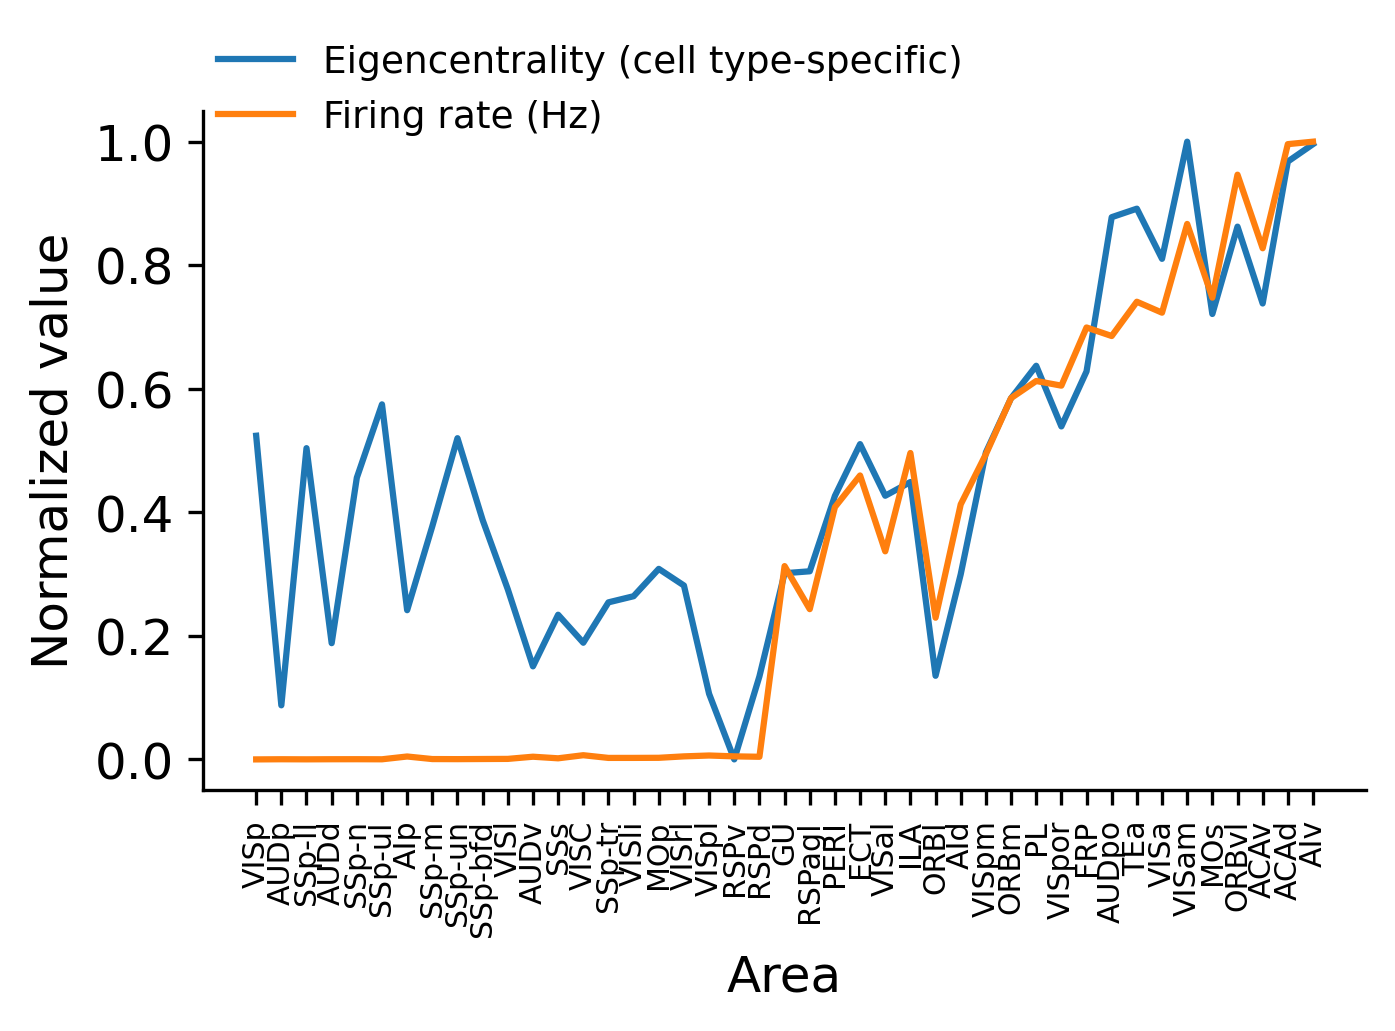

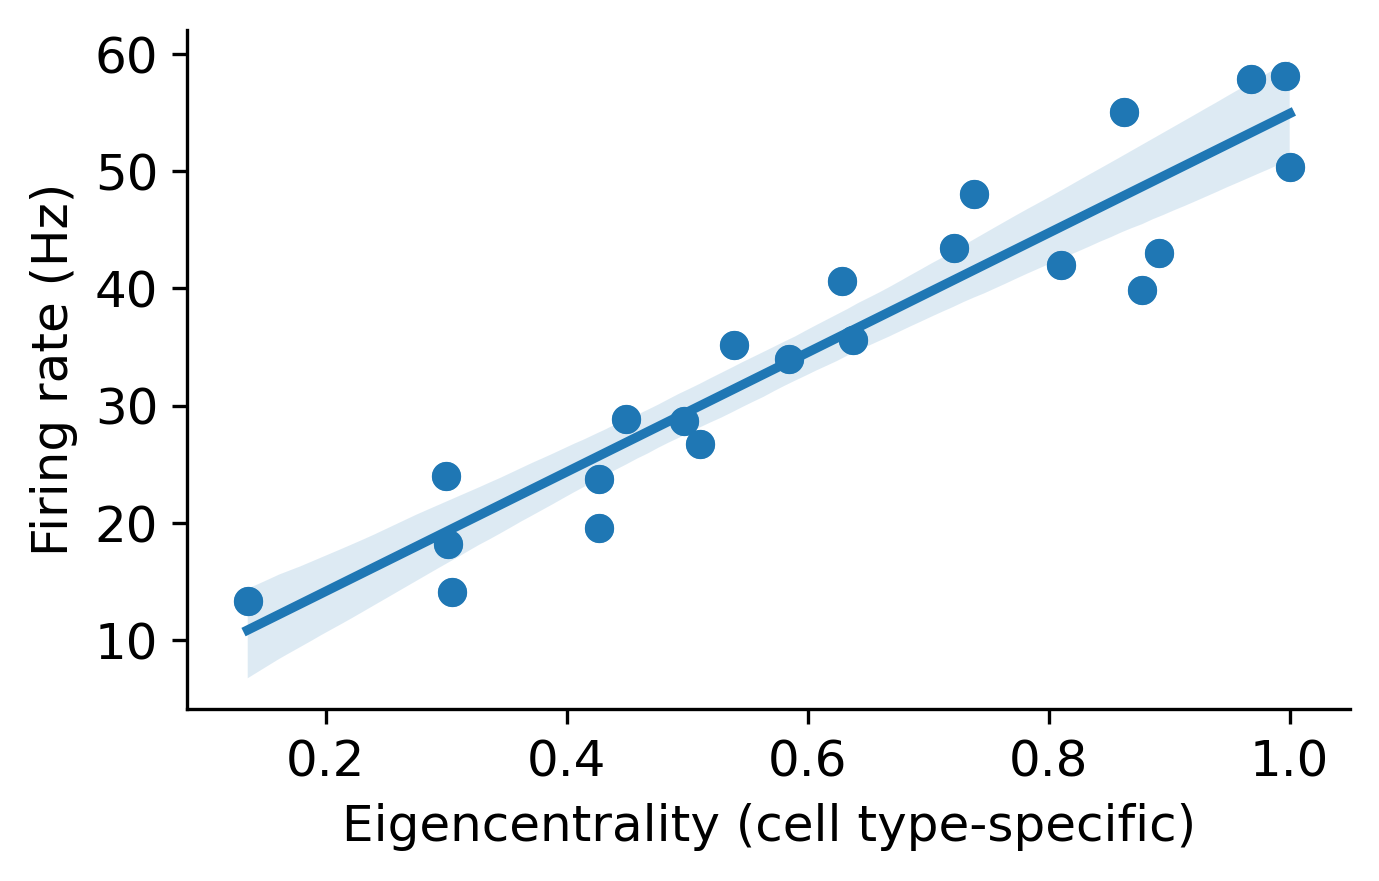

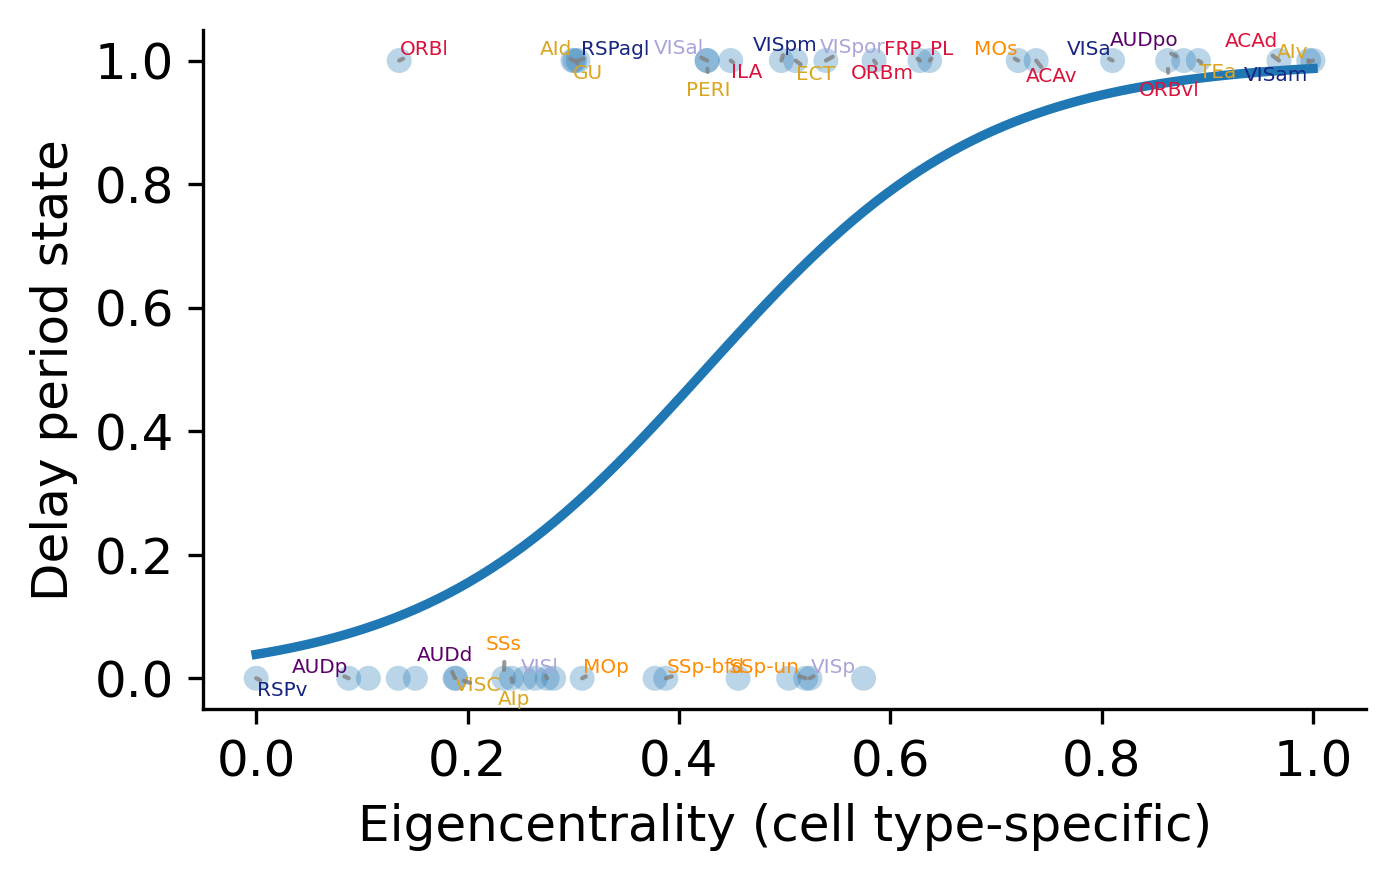

In [30]:
# key test  eigCent vs. FR pattern
# get the eigen centrality of the conn matrix
# mm33

frThreshold = 5

eigV, eigCent = np.linalg.eig(conn_cxcx_norm_Hiermod)
# eigV, eigCent = np.linalg.eig(conn_sc)
ind = np.argmax(eigV)

X1 = np.abs(eigCent[:,ind])
print(X1.min(), X1.max())
eigHiermod = X1
X = (X1 - X1.min()) / (X1.max() - X1.min())
Y = np.array(model_V1.persistentact_df['persistentact'])
Xlabel = 'Eigencentrality (cell type-specific)'
Ylabel = 'Firing rate (Hz)'

plotXYcompr(X, Y, Xlabel, Ylabel, area_list, (5, 3), 12, True,
            'loopMeasurement/eigHiermod_FRcompr1.svg')
eigHiermodCorr = plotXYcomprCorrNotNormalize(X, Y, Xlabel, Ylabel, parameters, False, area_list, frThreshold, (5, 3), 12, True,
            'loopMeasurement/eigHiermod_FRcompr2.svg')
# plotXYcomprResidual(X, Y, Xlabel, frThreshold, (5, 3), 12, True,
#             'loopMeasurement/eigHiermod_FRcompr3.svg')
eigHiermodLogReg = plotXYLogReg(X, Y, Xlabel, 'Delay period state', True, parameters, area_list, noLabelAreas, frThreshold, (5, 3), 12, True,
            'loopMeasurement/eigHiermod_FRLogReg.svg') # Y is treated as binary with a threshold of frThreshold


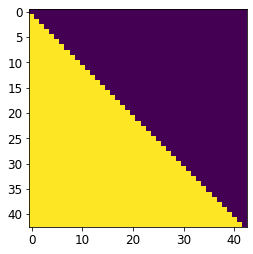

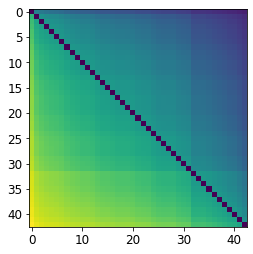

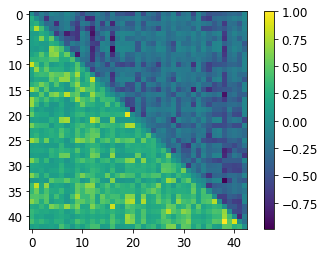

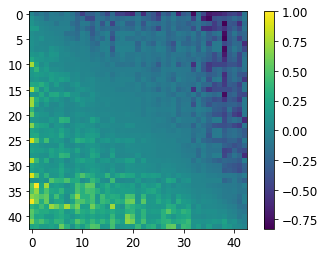

In [31]:
# Newsim: compare alternative connectivity measures with FR.  sign only conn_cxcx_norm  and noPV conn_cxcx_norm.

# # use the scaled connection matrix
conn_sc = np.power(conn_cxcx, parameters['kSquishFln'])
# conn_cxcx_norm = conn_sc / np.max(conn_sc)
newPref = model_V1.pref_matrix

# coeff = newPref - (1 - newPref)
# change newPref matrix, all elements larger than 0.5 to 1, smaller than 0.5 to -1
coeff_sign_only = np.ones(newPref.shape)
coeff_sign_only[newPref < 0.5] = -1
plt.figure()
plt.imshow(coeff_sign_only)

coeff_noPV = newPref - (1 - newPref)
plt.figure()
plt.imshow(coeff_noPV)

# sign only conn_cxcx_norm
conn_cxcx_norm_sign_only = conn_cxcx_norm * coeff_sign_only
np.fill_diagonal(conn_cxcx_norm_sign_only, 0)
conn_cxcx_norm_sign_only = conn_cxcx_norm_sign_only / np.max(np.abs(conn_cxcx_norm_sign_only))
# noPV conn_cxcx_norm
conn_cxcx_norm_noPV = conn_cxcx_norm * coeff_noPV
np.fill_diagonal(conn_cxcx_norm_noPV, 0)
conn_cxcx_norm_noPV = conn_cxcx_norm_noPV / np.max(np.abs(conn_cxcx_norm_noPV))


#use imshow to make a heatmap of conn_cxcx_norm_sign_only matrix, add colorbar
plt.figure()
plt.imshow(conn_cxcx_norm_sign_only)
plt.colorbar()

#use imshow to make a heatmap of conn_cxcx_norm_noPV matrix, add colorbar
plt.figure()
plt.imshow(conn_cxcx_norm_noPV)
plt.colorbar()



-12.613354251099102 14.936081792979085


WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
 [py.warnings]


['r', 0.9058160214566556, 'r^2', 0.8205026647275644, 'pvalue', 6.688258020907519e-09, 'rSpear', 0.9017504234895539, 'rSpear^2', 0.8131538262635898, 'pvalueSpear', 1.0030455413061141e-08]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
An error occurred: Perfect separation detected, results not available


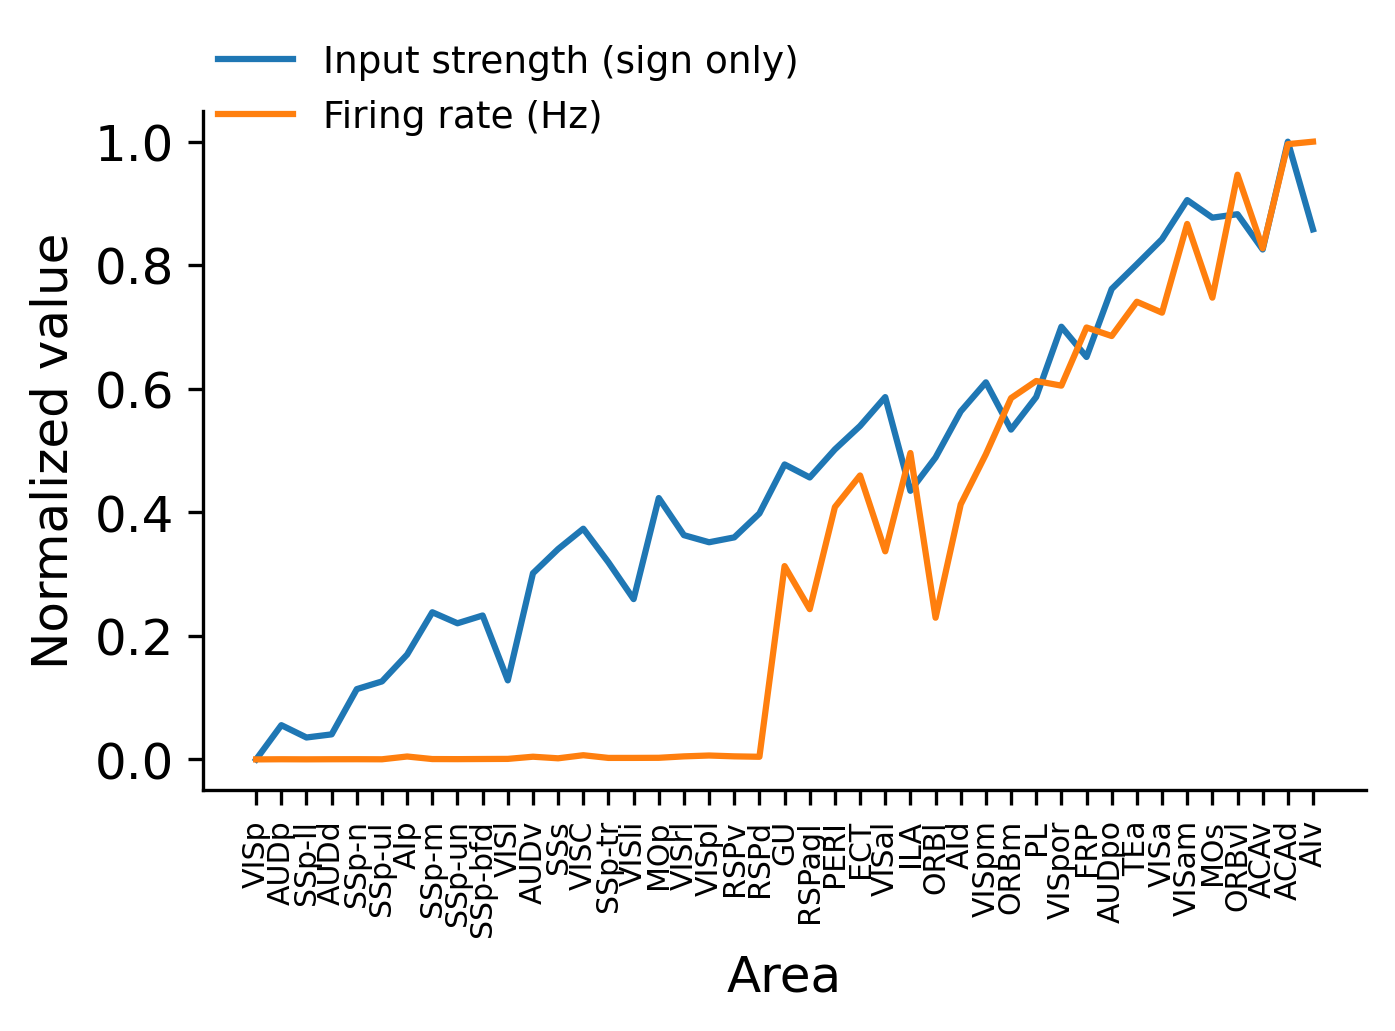

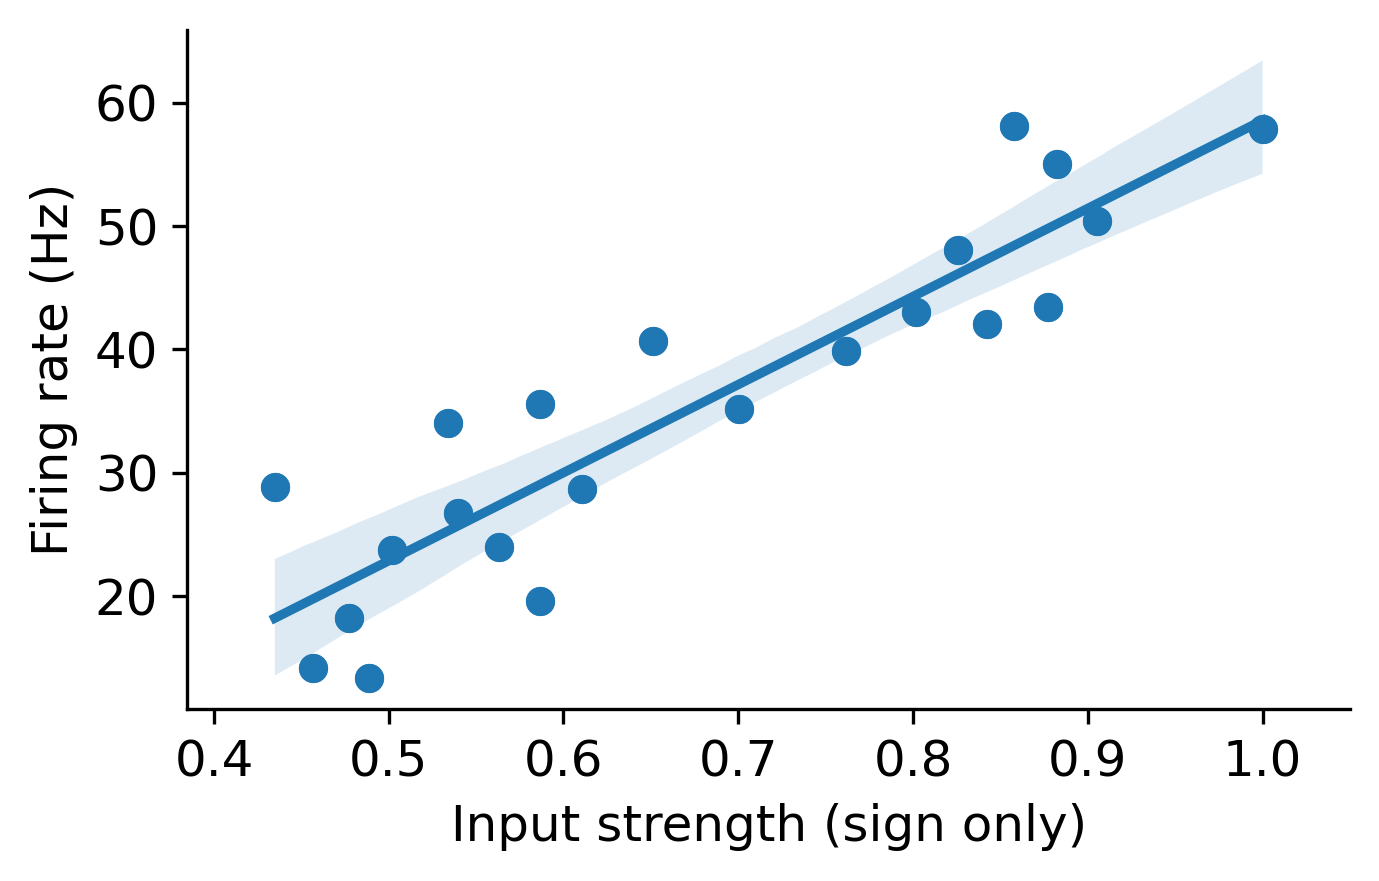

In [32]:
# Newsim: compare sign only input strength and FR 

X = np.sum(conn_cxcx_norm_sign_only, axis = 1)
# inputStrHierMod??? = np.sum(conn_cxcx_norm_sign_only, axis = 1)
print(X.min(), X.max())
X = (X - X.min()) / (X.max() - X.min())
Y = np.array(model_V1.persistentact_df['persistentact'])
Xlabel = 'Input strength (sign only)'
Ylabel = 'Firing rate (Hz)'
frThreshold = 5
plotXYcompr(X, Y, Xlabel, Ylabel, area_list, (5, 3), 12, True,
            'loopMeasurement/inp_sign_only_FRcompr1.svg')
inpHiermodCorr = plotXYcomprCorrNotNormalize(X, Y, Xlabel, Ylabel, parameters, False, area_list, frThreshold, (5, 3), 12, True,
            'loopMeasurement/inp_sign_only_FRcompr2.svg')
# plotXYcomprResidual(X, Y, Xlabel, frThreshold, (5, 3), 12, True,
#             'loopMeasurement/eig_FRcompr3.svg')

try:
    inpHiermodLogReg = plotXYLogReg(X, Y, Xlabel, 'Delay period state',  True, parameters, area_list, noLabelAreas, frThreshold, (5, 3), 12, True,
            'loopMeasurement/inp_sign_only_FRLogReg.svg') # Y is treated as binary with a threshold of frThreshold
except Exception as e:
    print("An error occurred:", e)

-14.570382743851107 12.223218195816166


WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
 [py.warnings]


['r', 0.9049504390020023, 'r^2', 0.8189352970499167, 'pvalue', 7.302003488126425e-09, 'rSpear', 0.9085262563523435, 'rSpear^2', 0.8254199584816042, 'pvalueSpear', 5.052644901256574e-09]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
An error occurred: Perfect separation detected, results not available


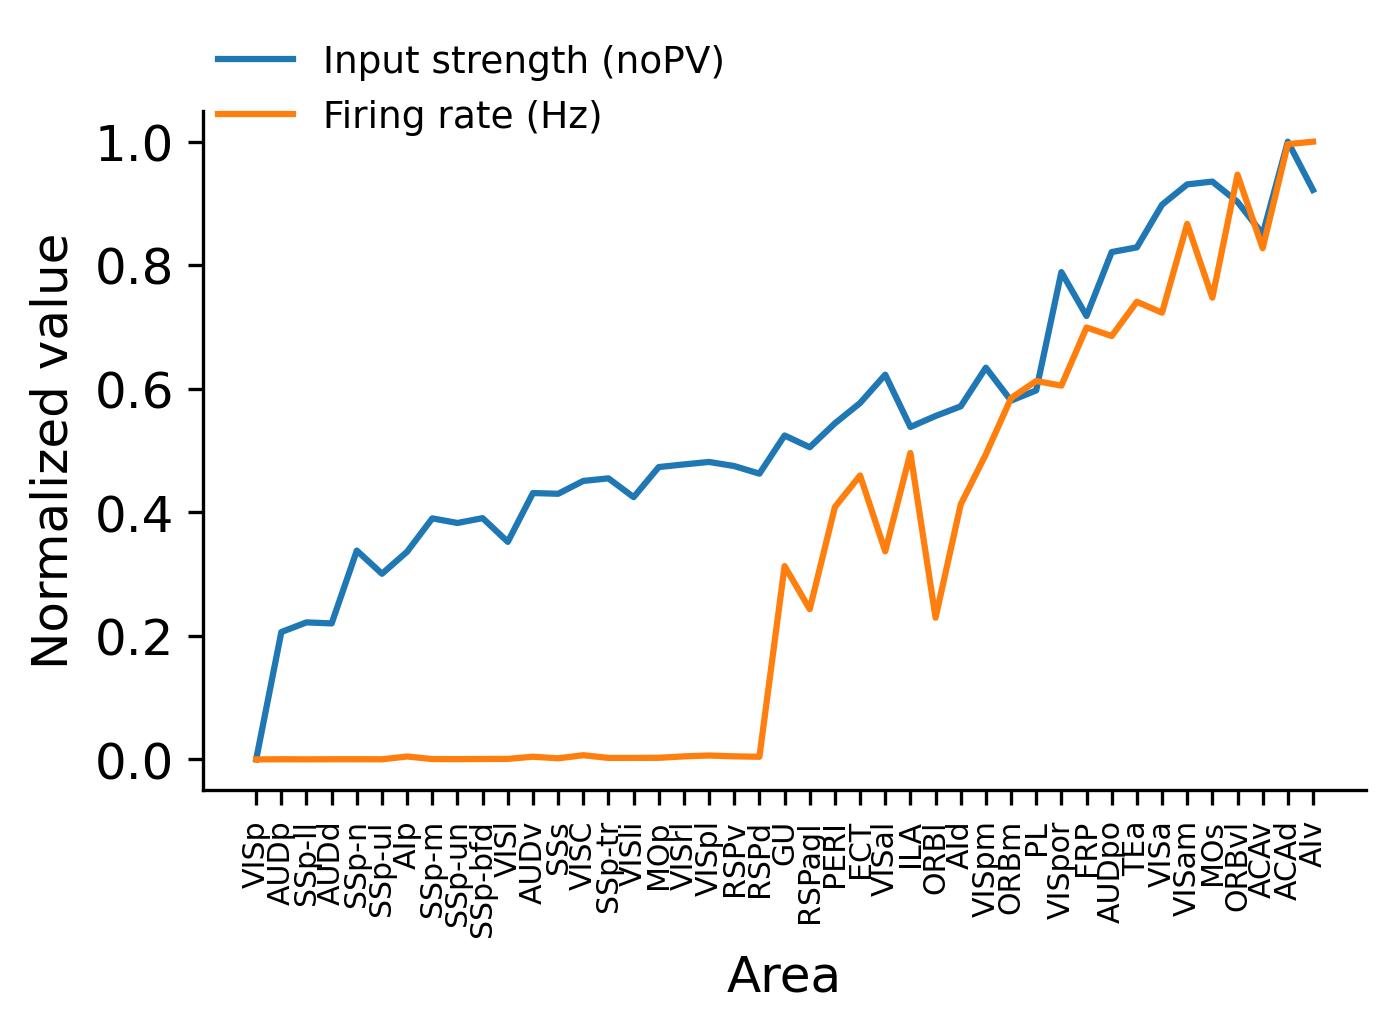

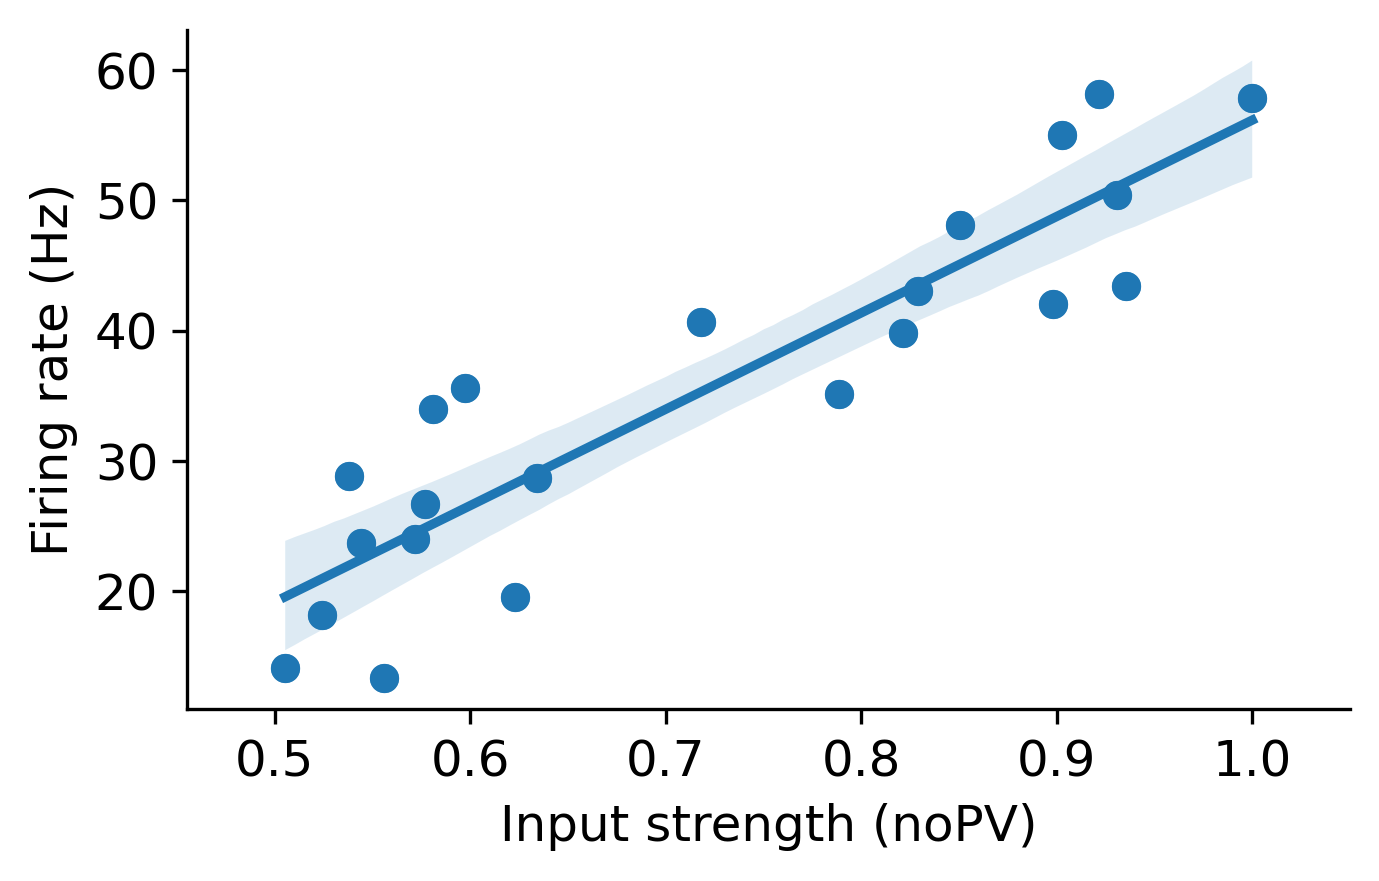

In [33]:
# Newsim: compare noPV input strength and FR 

X = np.sum(conn_cxcx_norm_noPV, axis = 1)
# inputStrHierMod??? = np.sum(conn_cxcx_norm_noPV, axis = 1)
print(X.min(), X.max())
X = (X - X.min()) / (X.max() - X.min())
Y = np.array(model_V1.persistentact_df['persistentact'])
Xlabel = 'Input strength (noPV)'
Ylabel = 'Firing rate (Hz)'
frThreshold = 5
plotXYcompr(X, Y, Xlabel, Ylabel, area_list, (5, 3), 12, True,
            'loopMeasurement/inp_nopv_FRcompr1.svg')
inpHiermodCorr = plotXYcomprCorrNotNormalize(X, Y, Xlabel, Ylabel, parameters, False, area_list, frThreshold, (5, 3), 12, True,
            'loopMeasurement/inp_nopv_FRcompr2.svg')
# plotXYcomprResidual(X, Y, Xlabel, frThreshold, (5, 3), 12, True,
#             'loopMeasurement/eig_FRcompr3.svg')

try:
    inpHiermodLogReg = plotXYLogReg(X, Y, Xlabel, 'Delay period state',  True, parameters, area_list, noLabelAreas, frThreshold, (5, 3), 12, True,
            'loopMeasurement/inp_nopv_FRLogReg.svg') # Y is treated as binary with a threshold of frThreshold
except Exception as e:
    print("An error occurred:", e)


In [34]:
# save eigcent and input strength

with open('results/inputStr.json', 'w') as f:
    json.dump(list(inputStr), f)

with open('results/inputStrHiermod.json', 'w') as f:
    json.dump(list(inputStrHierMod), f)

with open('results/hierEigCent.json', 'w') as f:
    json.dump(list(eigHiermod), f)

In [35]:
# bar plot comparing the R^2 for different settings.
def plotBar(metric, corrList, labelList, figureSize, fontSize, saveFig, fileName):
    fig = plt.figure(figsize=figureSize, dpi=300, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': fontSize})
    
    yData = [c[metric] for c in corrList]
    xData = range(len(yData))
    plt.bar(xData, yData)
    plt.xticks(xData, labelList)
    plt.axhline(0, 0, 1, color='k')
    plt.ylabel(metric)
    axes = plt.gca()
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    if saveFig:
        fig.savefig('figure/' + fileName, dpi=300, bbox_inches='tight', transparent=True)

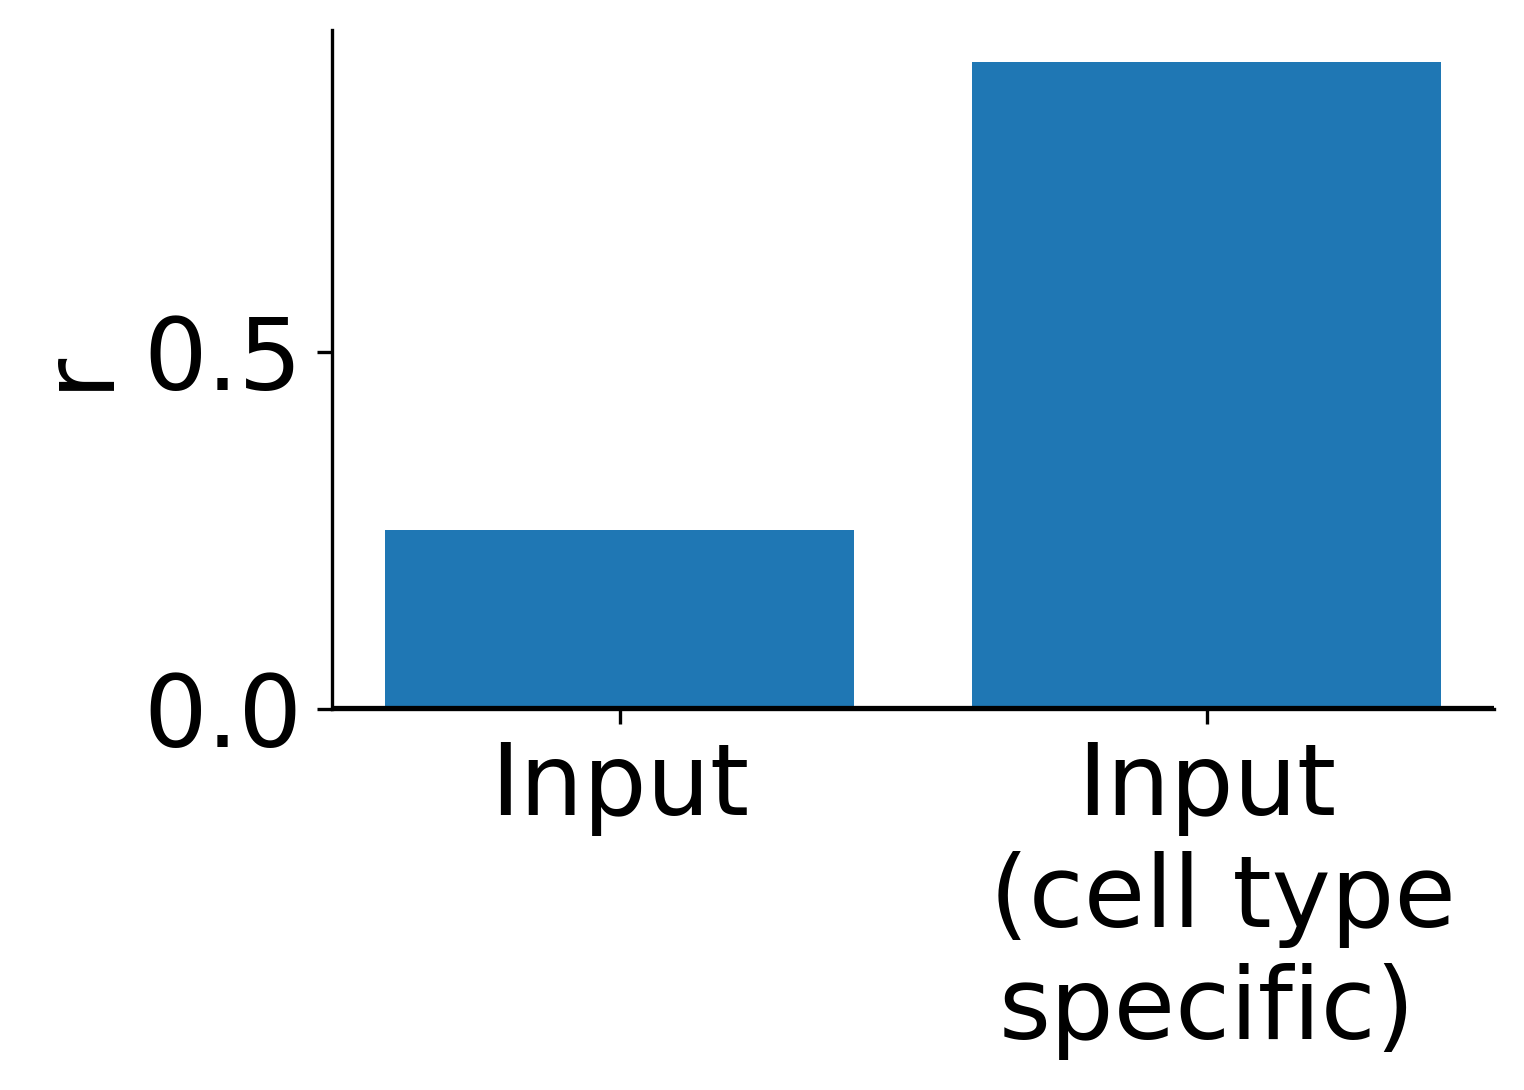

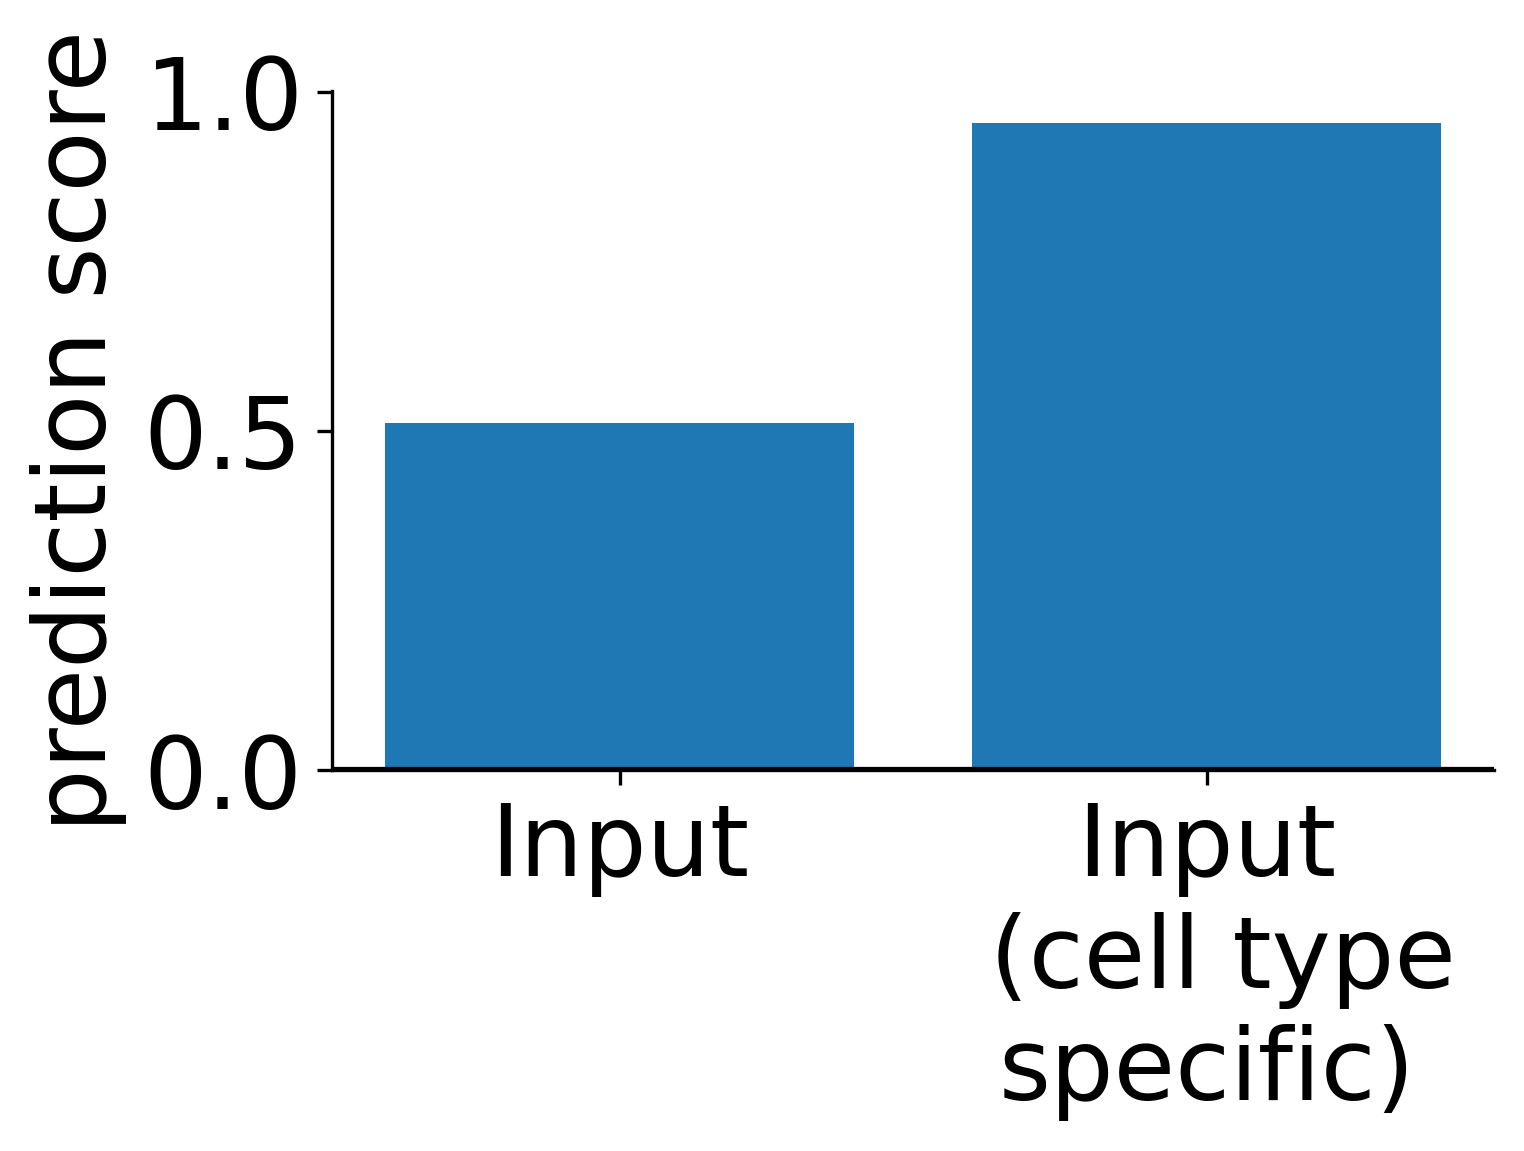

In [36]:
# for main figure
corrList = [inpCorr, inpHiermodCorr]
logRegList = [inpLogReg, inpHiermodLogReg]
labelList = ['Input', 'Input\n (cell type\nspecific)']
# change font size since this is used for inset
plotBar('r', corrList, labelList, (5,3), 24, True, 'loopMeasurement/connectivityFRCorrBar.svg') 
plotBar('prediction score', logRegList, labelList, (5,3), 24, True, 'loopMeasurement/connectivityFRLogRegBar.svg')

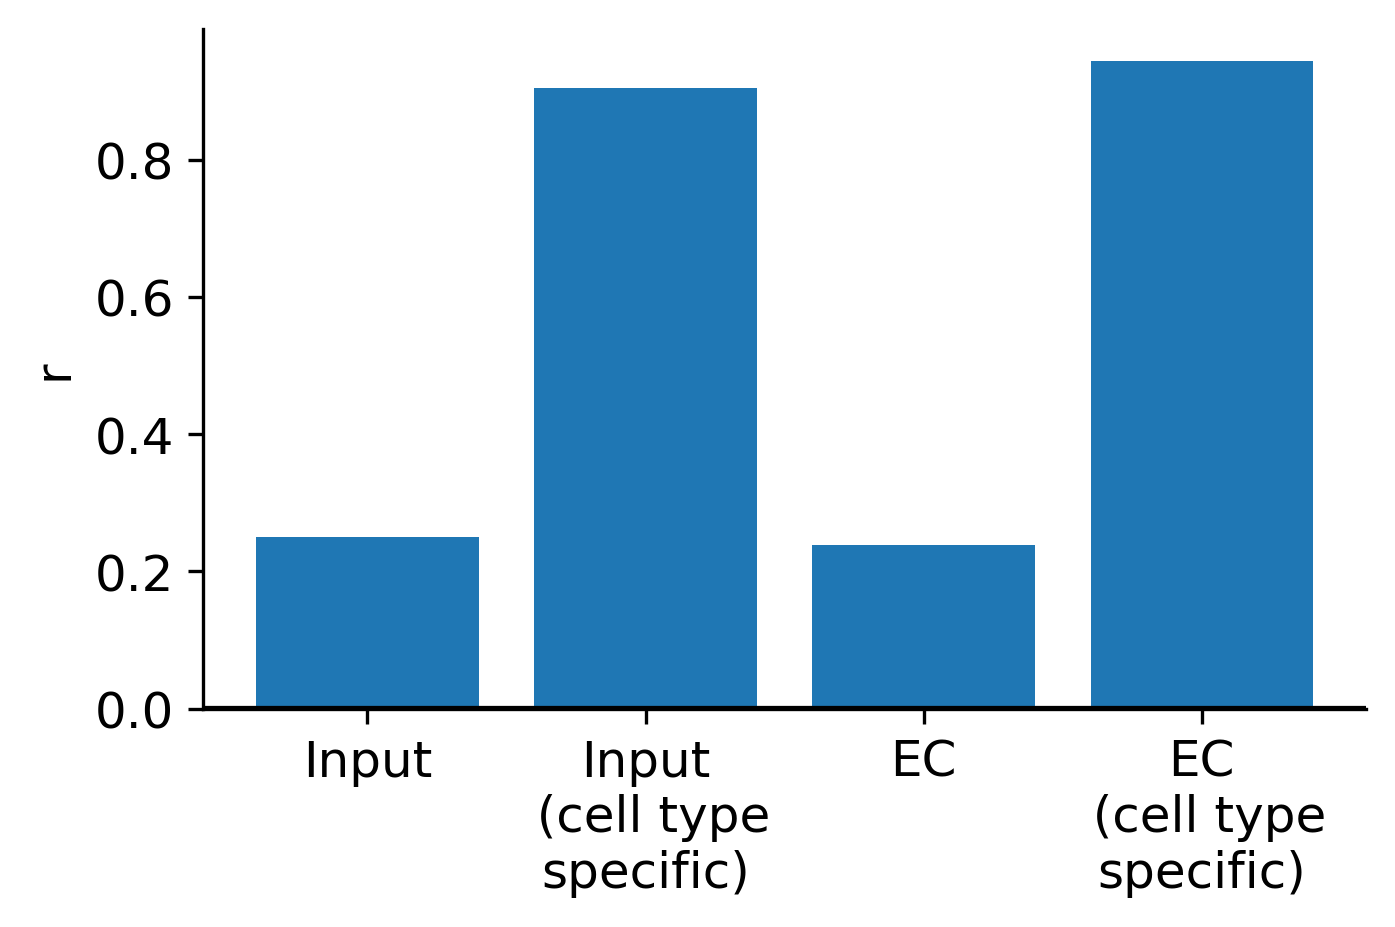

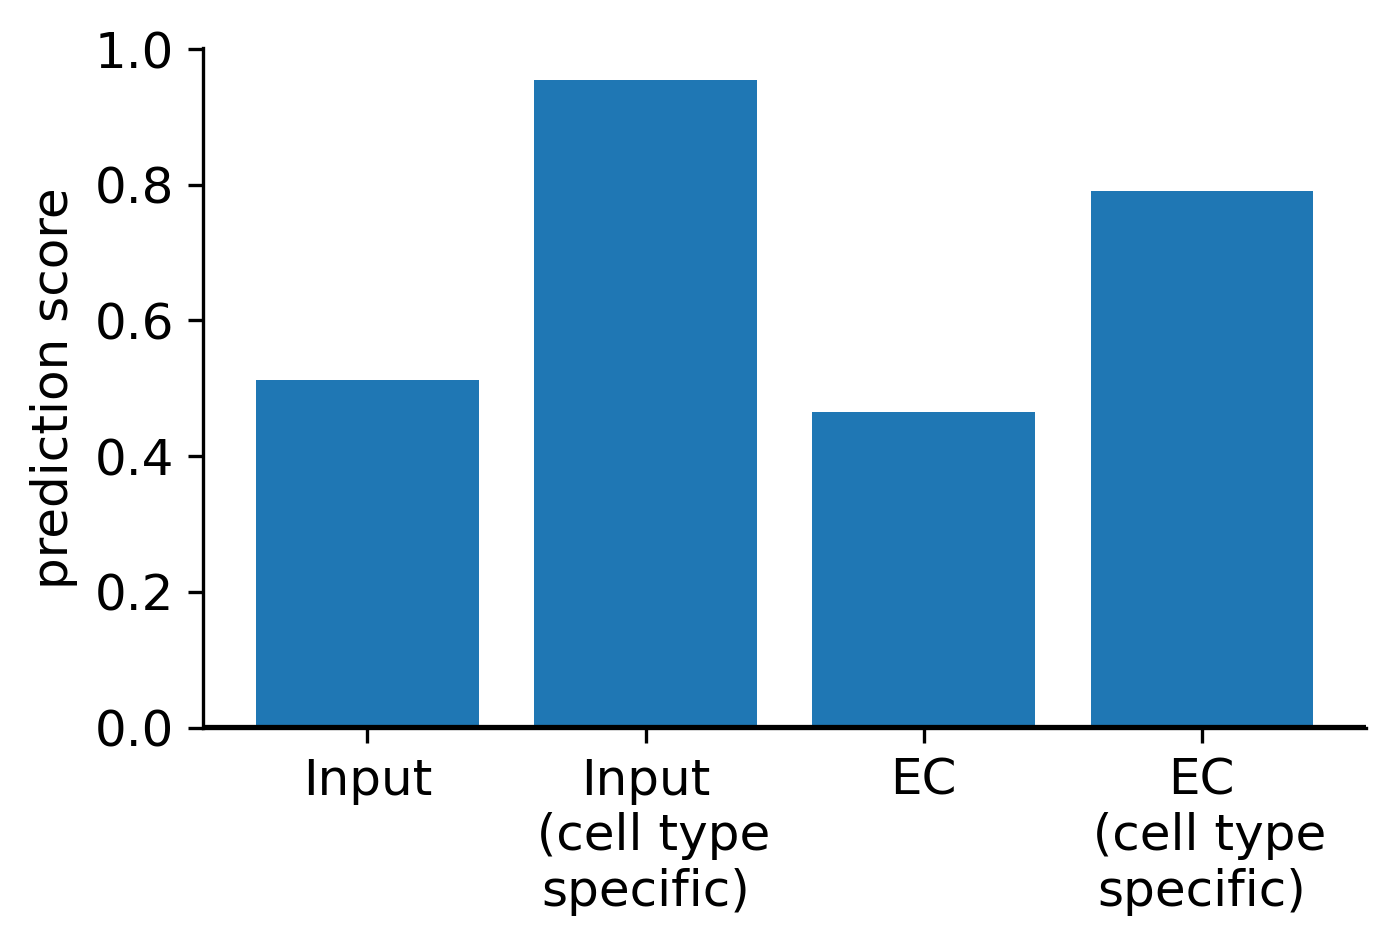

In [37]:
# for supplementary figure
corrList = [inpCorr, inpHiermodCorr, eigCorr, eigHiermodCorr]
logRegList = [inpLogReg, inpHiermodLogReg, eigLogReg, eigHiermodLogReg]
labelList = ['Input', 'Input\n (cell type\nspecific)', 'EC', 'EC\n (cell type\nspecific)']
plotBar('r', corrList, labelList, (5,3), 12, True, 'loopMeasurement/connectivityFRCorrBarSupp.svg')
plotBar('prediction score', logRegList, labelList, (5,3), 12, True, 'loopMeasurement/connectivityFRLogRegBarSupp.svg')

correreation between length 2 and length 3 loop:  0.9599365790888353 2.8648182073746215e-24


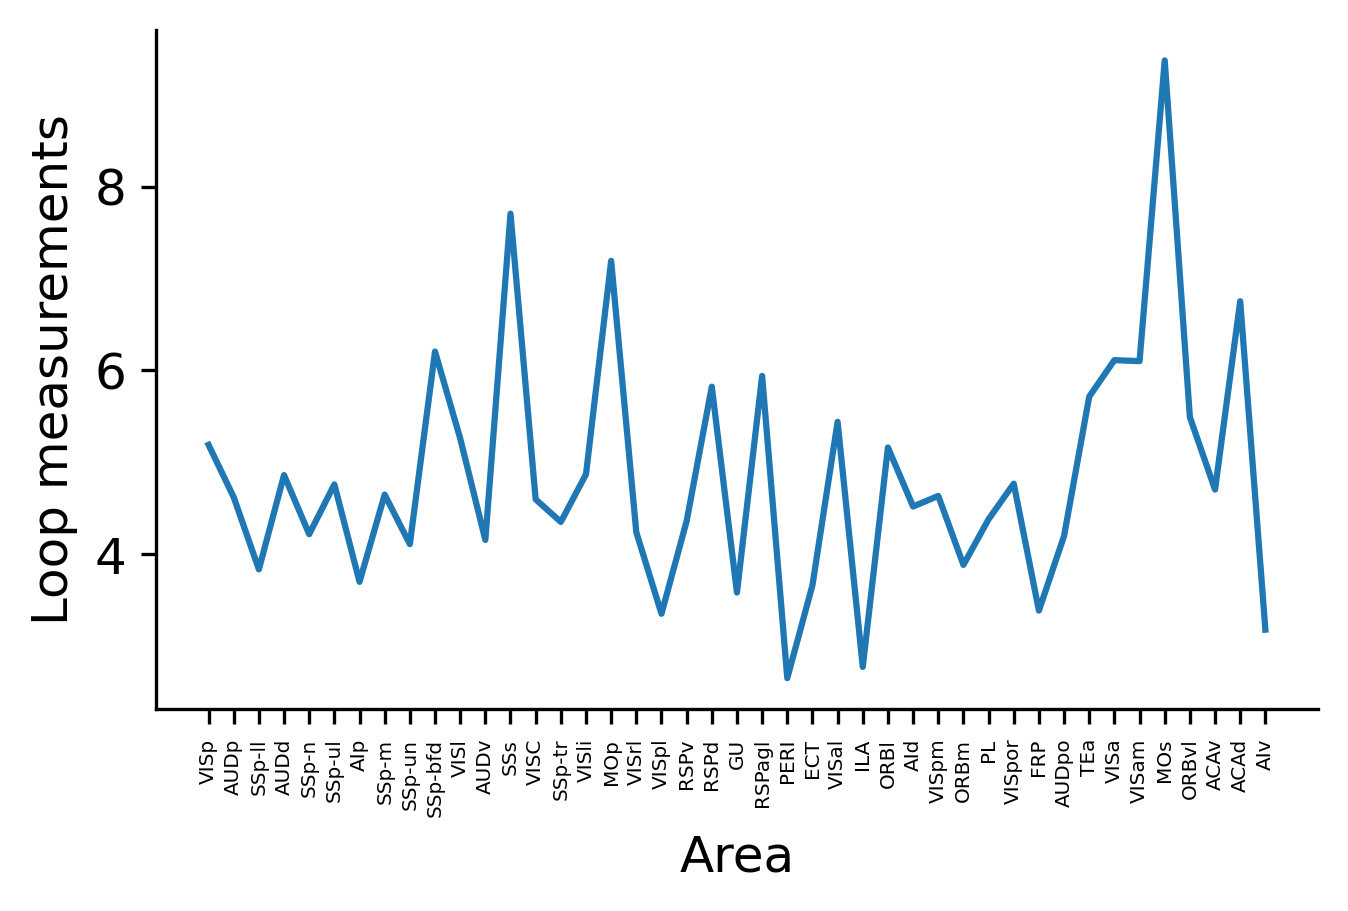

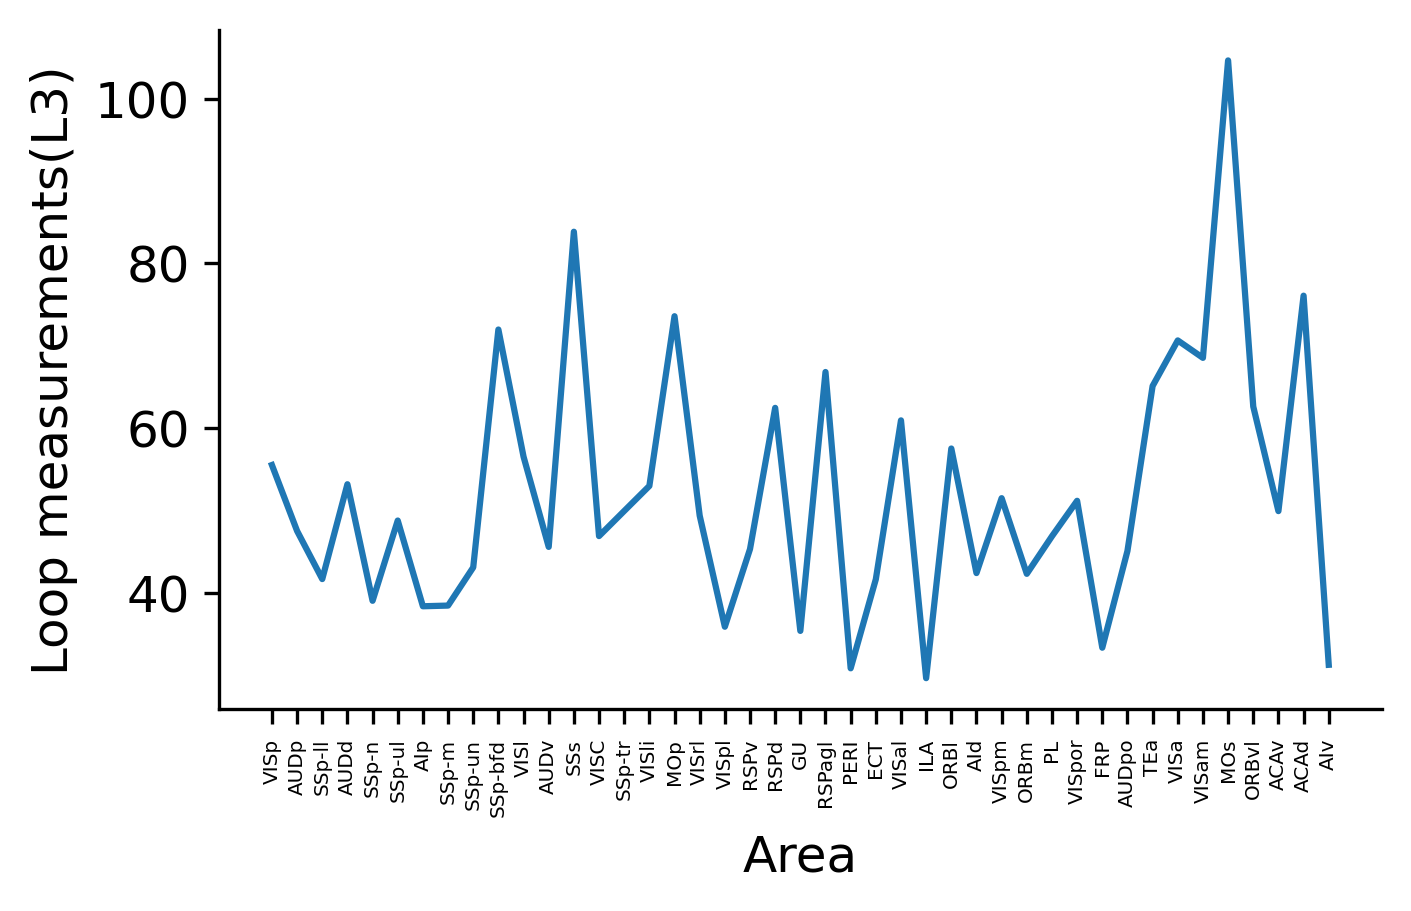

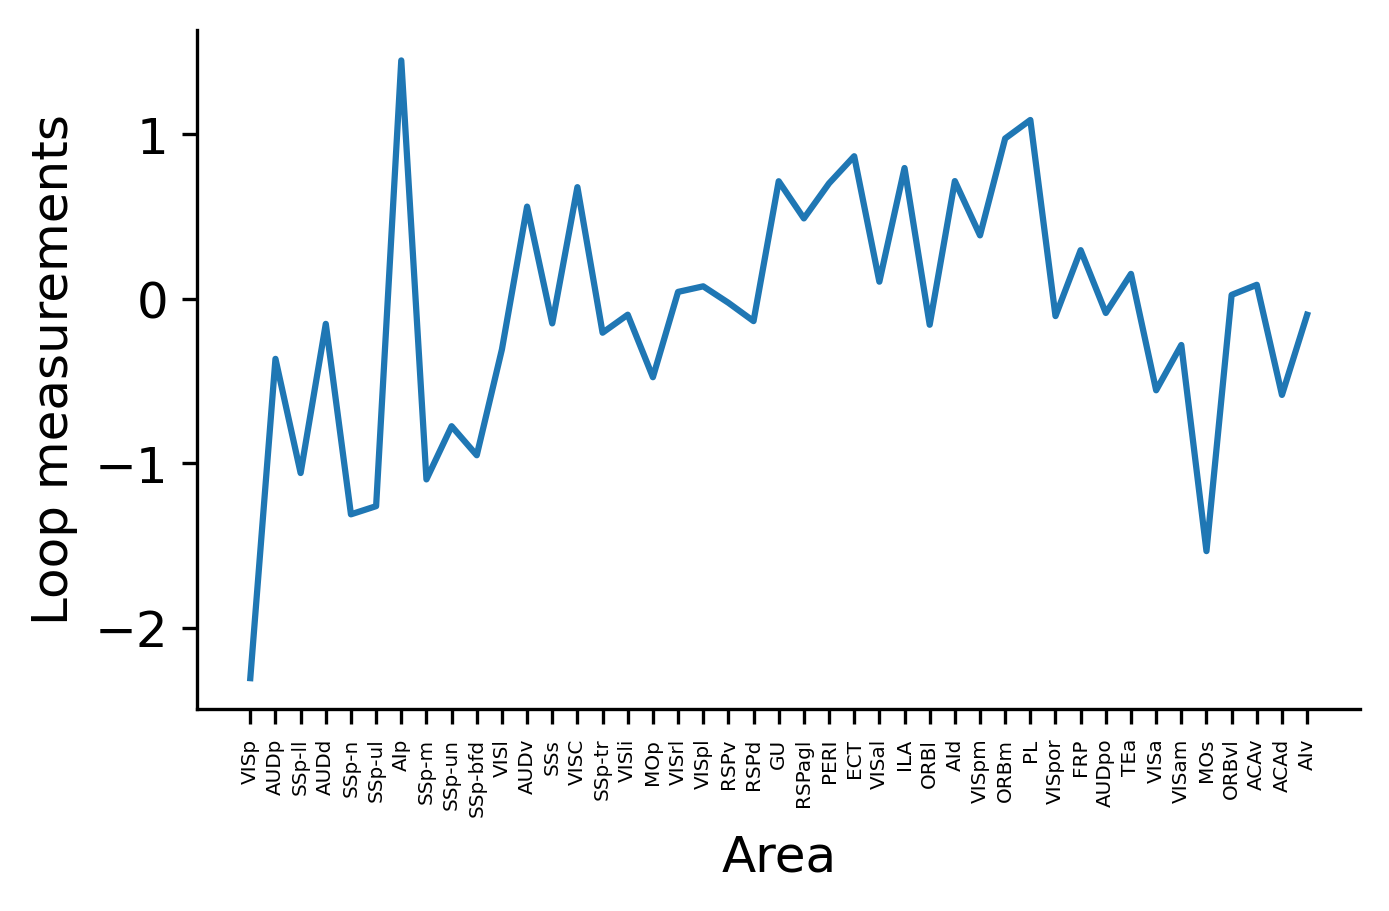

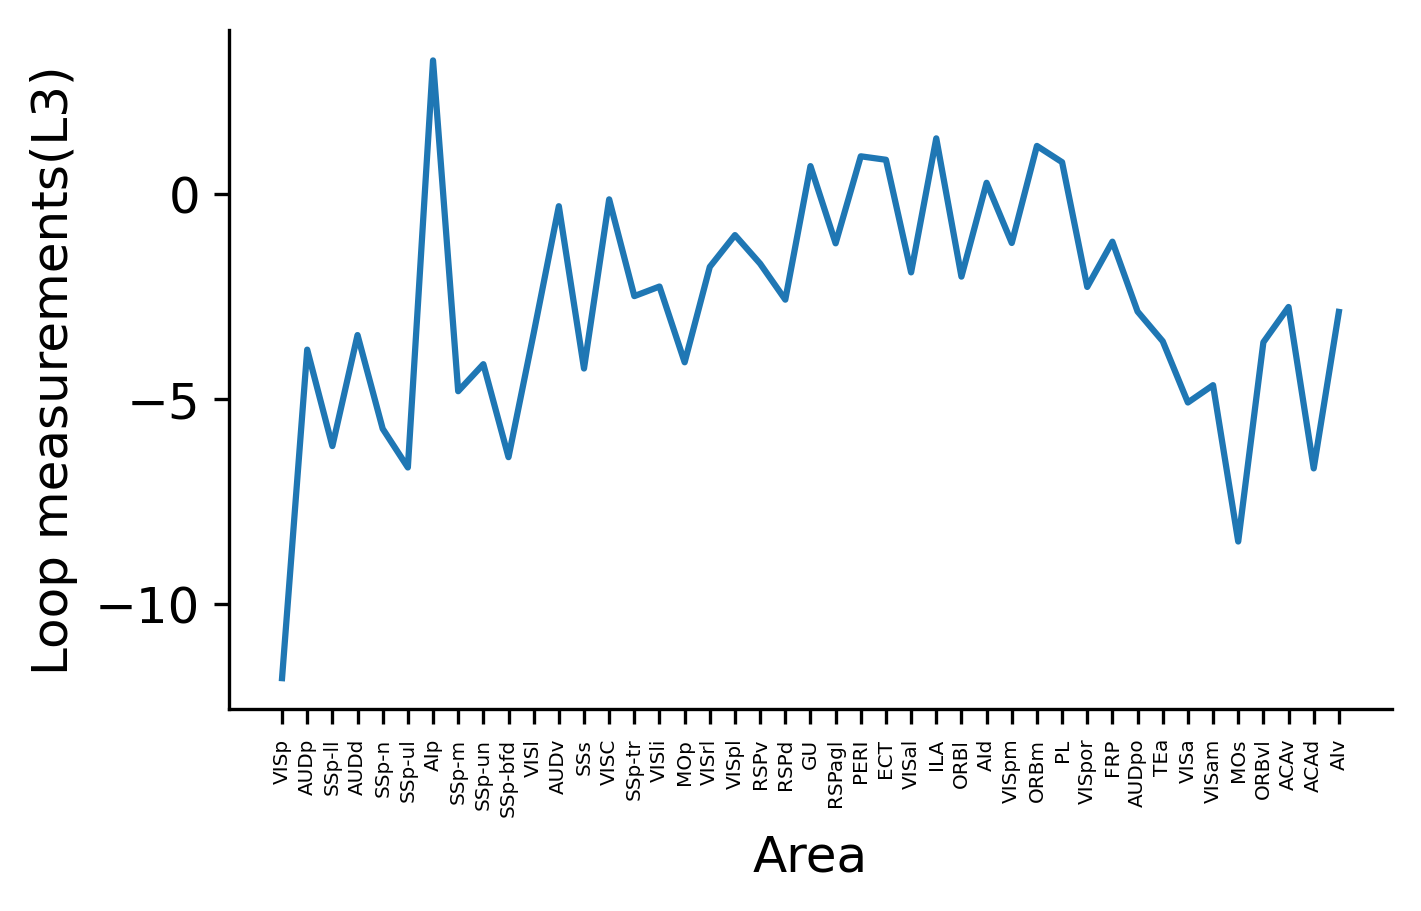

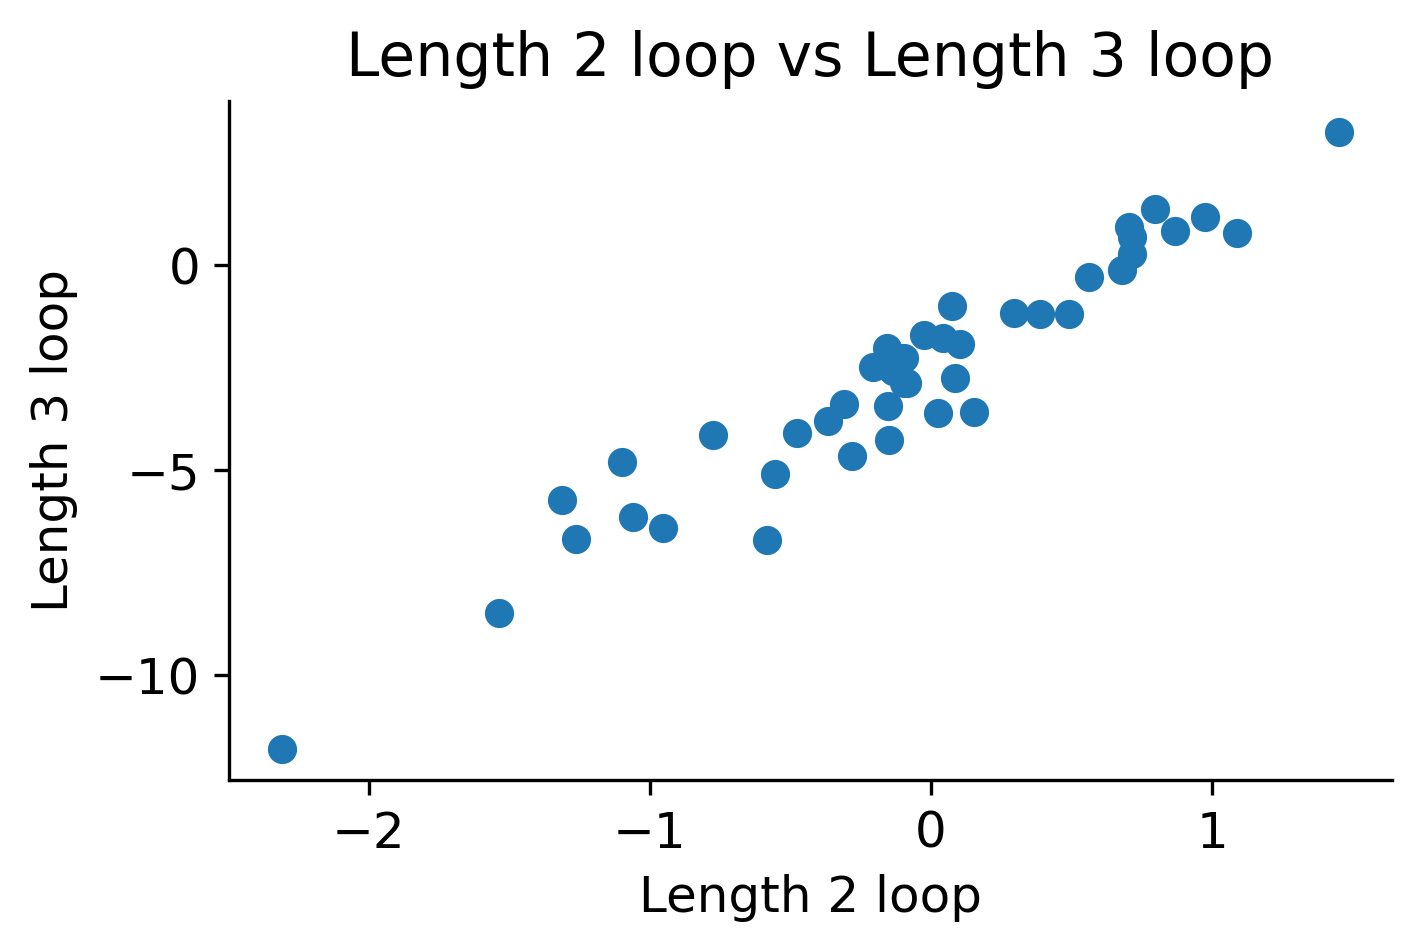

In [38]:

sLoop = np.diag(conn_cxcx_norm @ conn_cxcx_norm)
makePlot(sLoop, 'Area', 'Loop measurements', area_list, (5,3), 12, True, 'loopMeasurement/plainLoop.svg')

ssLoop = np.diag(conn_cxcx_norm @ conn_cxcx_norm @ conn_cxcx_norm)
makePlot(ssLoop, 'Area', 'Loop measurements(L3)', area_list, (5,3), 12, True, 'loopMeasurement/plainLoop3.svg')


sLoopHier = np.diag(conn_cxcx_norm_Hiermod @ conn_cxcx_norm_Hiermod)
makePlot(sLoopHier, 'Area', 'Loop measurements', area_list, (5,3), 12, True, 'loopMeasurement/hierLoop.svg')

ssLoopHier = np.diag(conn_cxcx_norm_Hiermod @ conn_cxcx_norm_Hiermod @ conn_cxcx_norm_Hiermod)
makePlot(ssLoopHier, 'Area', 'Loop measurements(L3)', area_list, (5,3), 12, True, 'loopMeasurement/hierLoop3.svg')

# compare length 2 and length 3 loop
makeScatter(sLoopHier, ssLoopHier, area_list, 'Length 2 loop vs Length 3 loop', 'Length 2 loop', 'Length 3 loop', 
    (5, 3), 12, True, 'loopMeasurement/l2vsl3.svg')
r, pvalue = sp.stats.pearsonr(sLoopHier, ssLoopHier)
print('correreation between length 2 and length 3 loop: ', r, pvalue)
# save the loop 
with open('results/plainLoopStr.json', 'w') as f:
    json.dump(list(sLoop), f)

with open('results/plainLoopStr3.json', 'w') as f:
    json.dump(list(ssLoop), f)

with open('results/hierLoopStr.json', 'w') as f:
    json.dump(list(sLoopHier), f)

with open('results/hierLoopStr3.json', 'w') as f:
    json.dump(list(ssLoopHier), f)

2.652356378200009 9.371755820232625


WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]


['r', 0.25946411443271183, 'r^2', 0.06732162667835138, 'pvalue', 0.24358982813315516, 'rSpear', 0.2930547713156409, 'rSpear^2', 0.08588109899086258, 'pvalueSpear', 0.185637368894096]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
['prediction score', 0.4883720930232558]


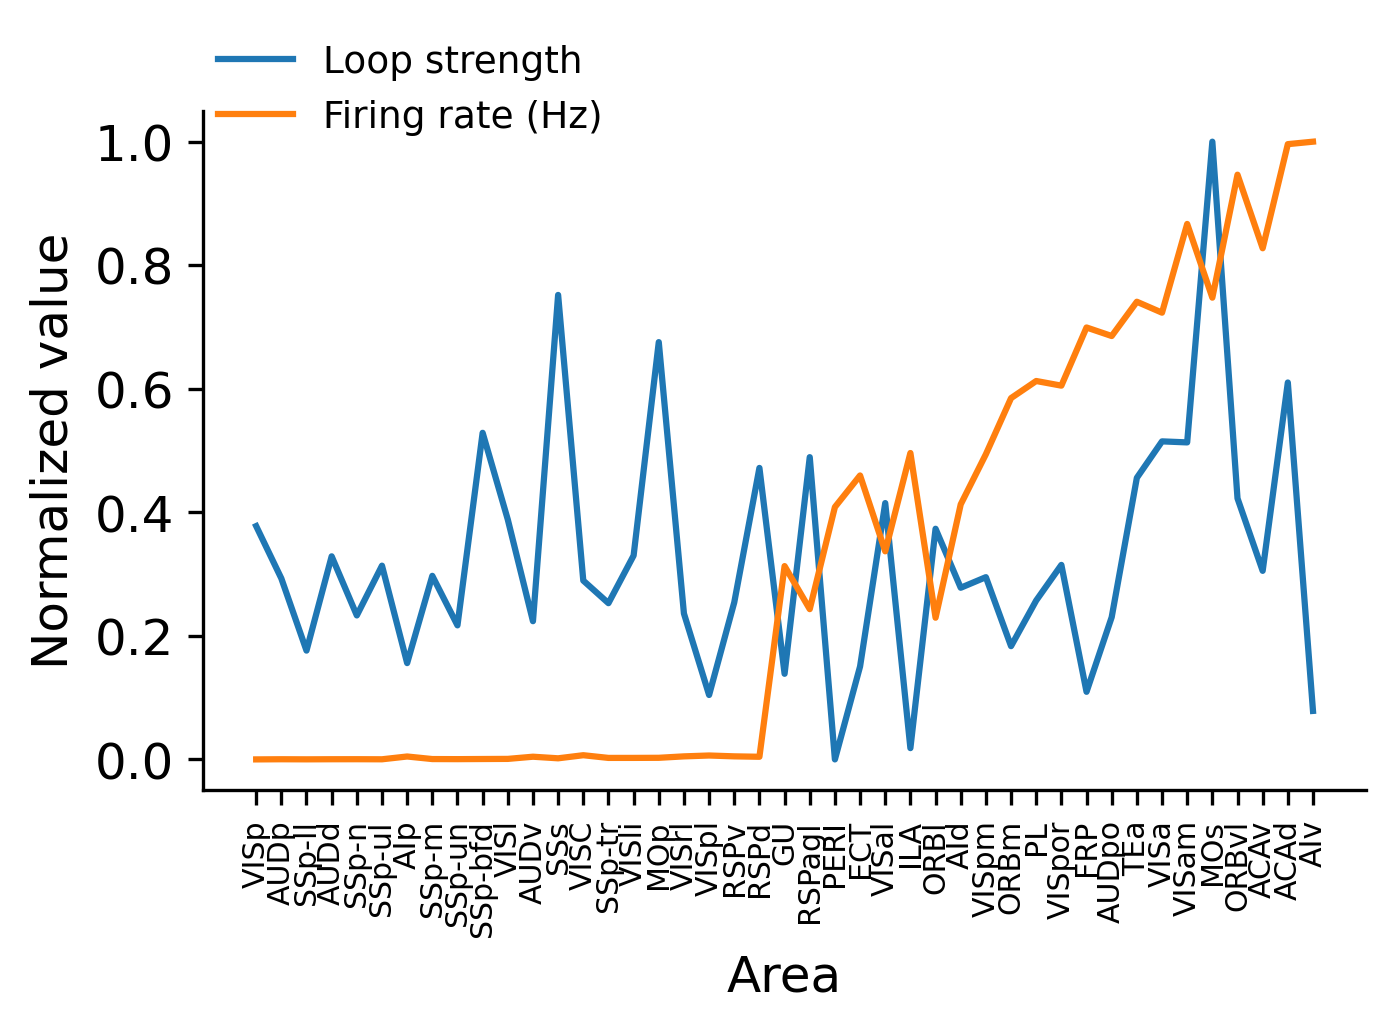

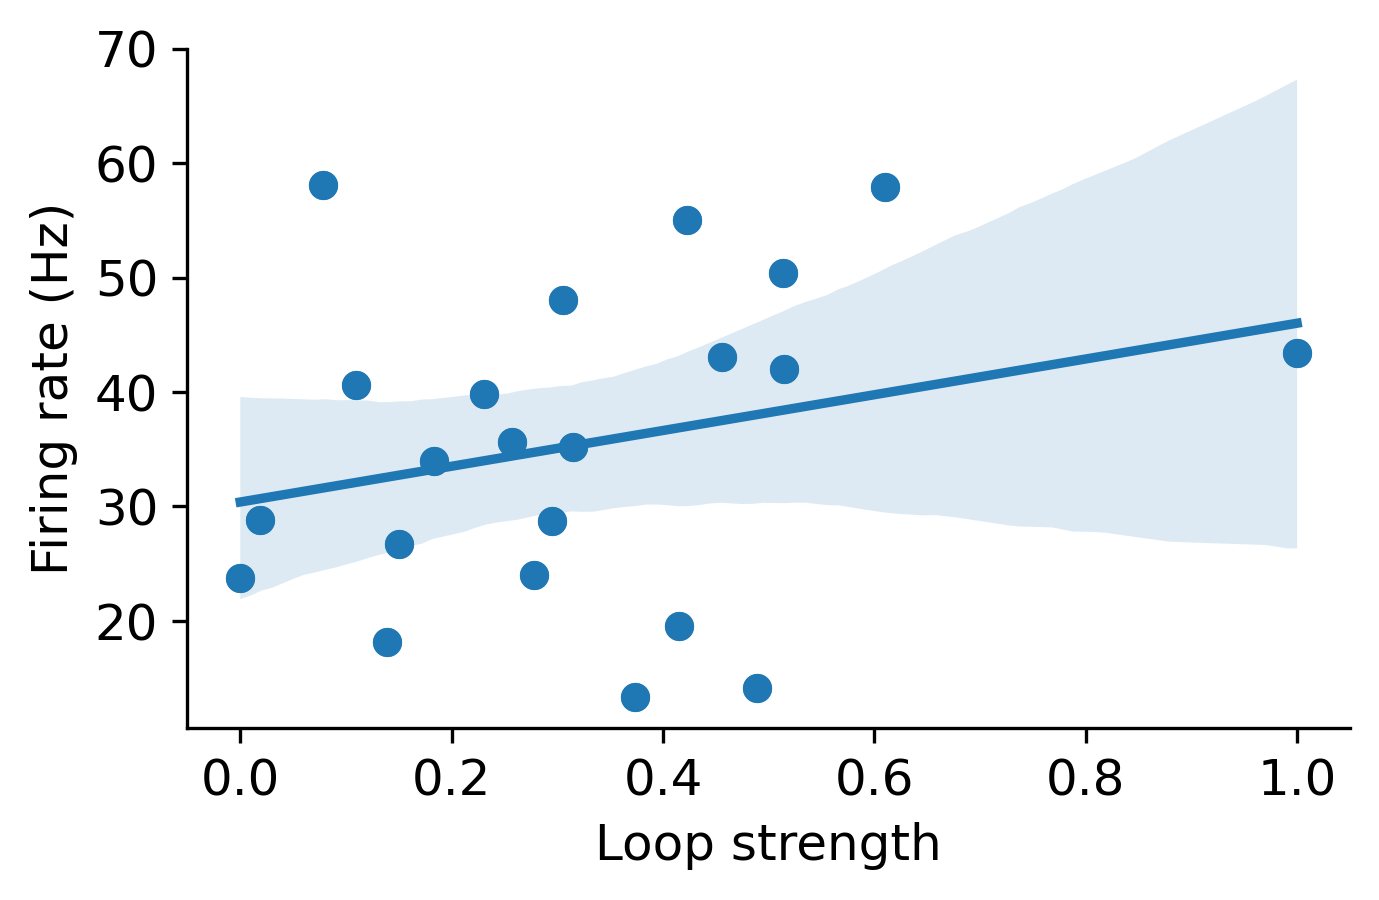

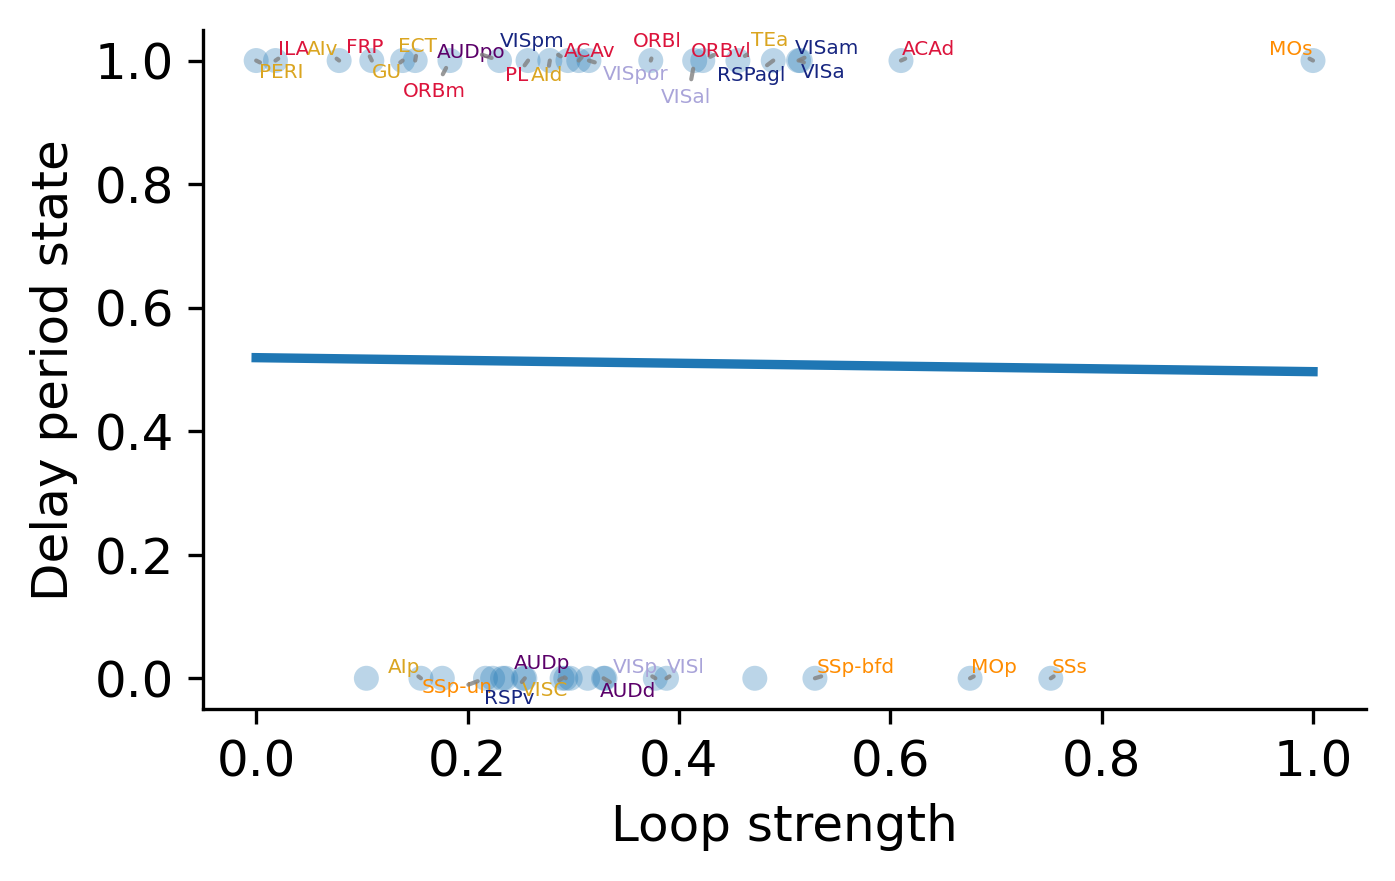

In [39]:
# compare raw loop strength and FR
# the result is not good. so we start to consider the loop strength to predict core areas.

X = sLoop
print(X.min(), X.max())
X = (X - X.min()) / (X.max() - X.min())
Y = np.array(model_V1.persistentact_df['persistentact']) 
Xlabel = 'Loop strength'
Ylabel = 'Firing rate (Hz)'
frThreshold = 5
plotXYcompr(X, Y, Xlabel, Ylabel, area_list, (5, 3), 12, True,
            'loopMeasurement/loop_FRcompr1.svg')
loopHierCorr = plotXYcomprCorrNotNormalize(X, Y, Xlabel, Ylabel, parameters, False, area_list, frThreshold, (5, 3), 12, True,
            'loopMeasurement/loop_FRcompr2.svg')
# plotXYcomprResidual(X, Y, Xlabel, frThreshold, (5, 3), 12, True,
#             'loopMeasurement/eig_FRcompr3.svg')
loopHierLogReg = plotXYLogReg(X, Y, Xlabel, 'Delay period state',  True, parameters, area_list, noLabelAreas, frThreshold, (5, 3), 12, True,
            'loopMeasurement/loop_FRLogReg.svg') # Y is treated as binary with a threshold of frThreshold

-2.307422431546596 1.4504367445339217


WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]
WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
 [py.warnings]


['r', -0.4847434211760476, 'r^2', 0.23497618437345905, 'pvalue', 0.02222941982233053, 'rSpear', -0.5155279503105591, 'rSpear^2', 0.2657690675514063, 'pvalueSpear', 0.014063853357929122]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
['prediction score', 0.7209302325581395]


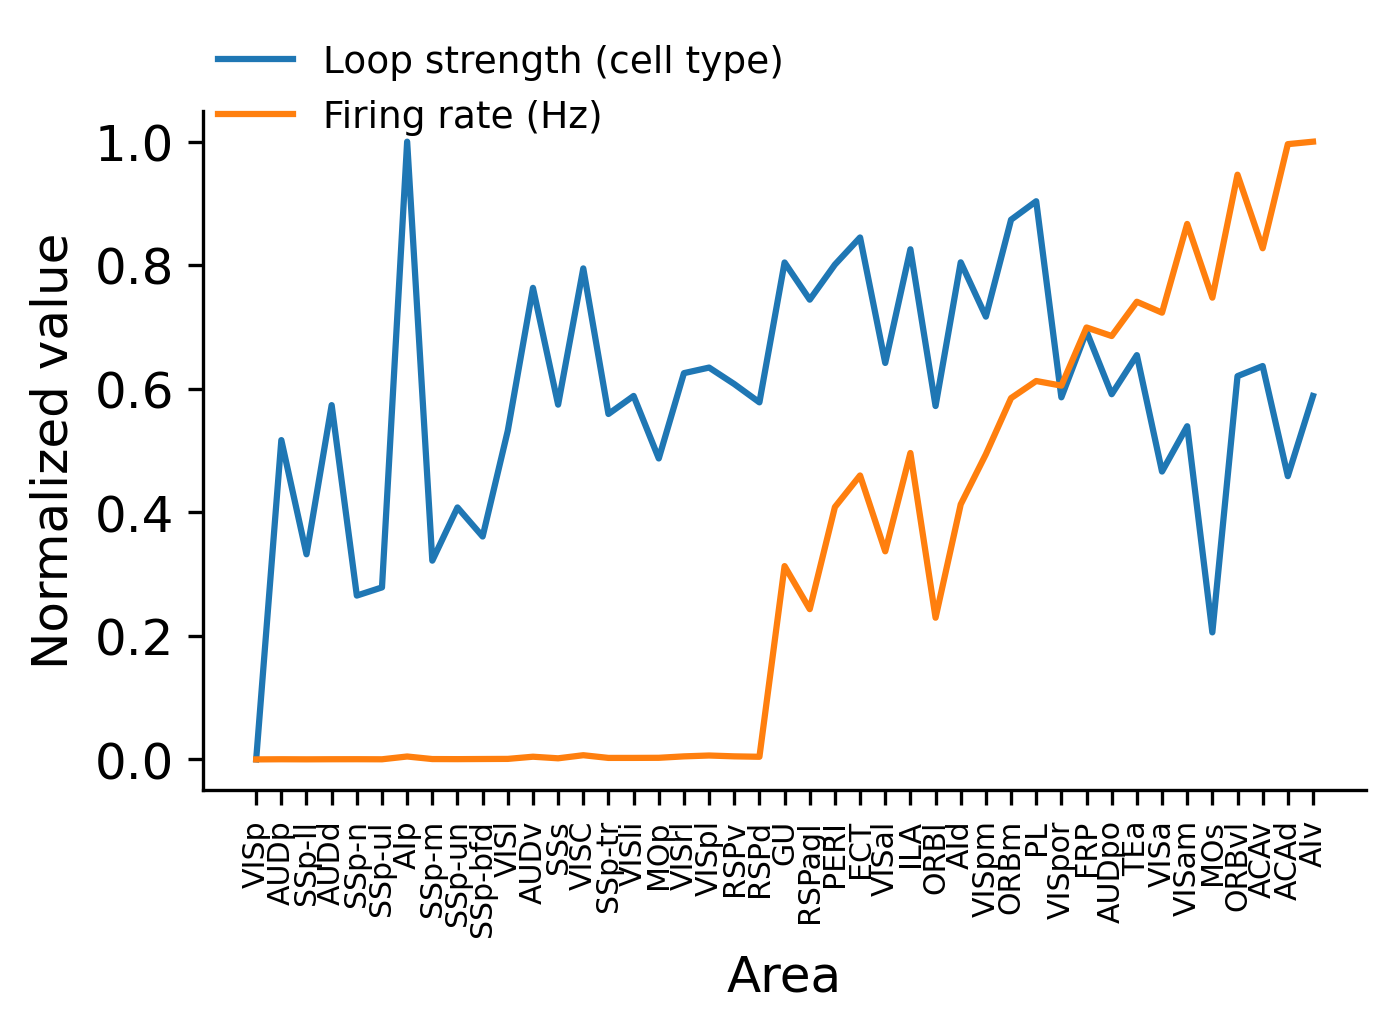

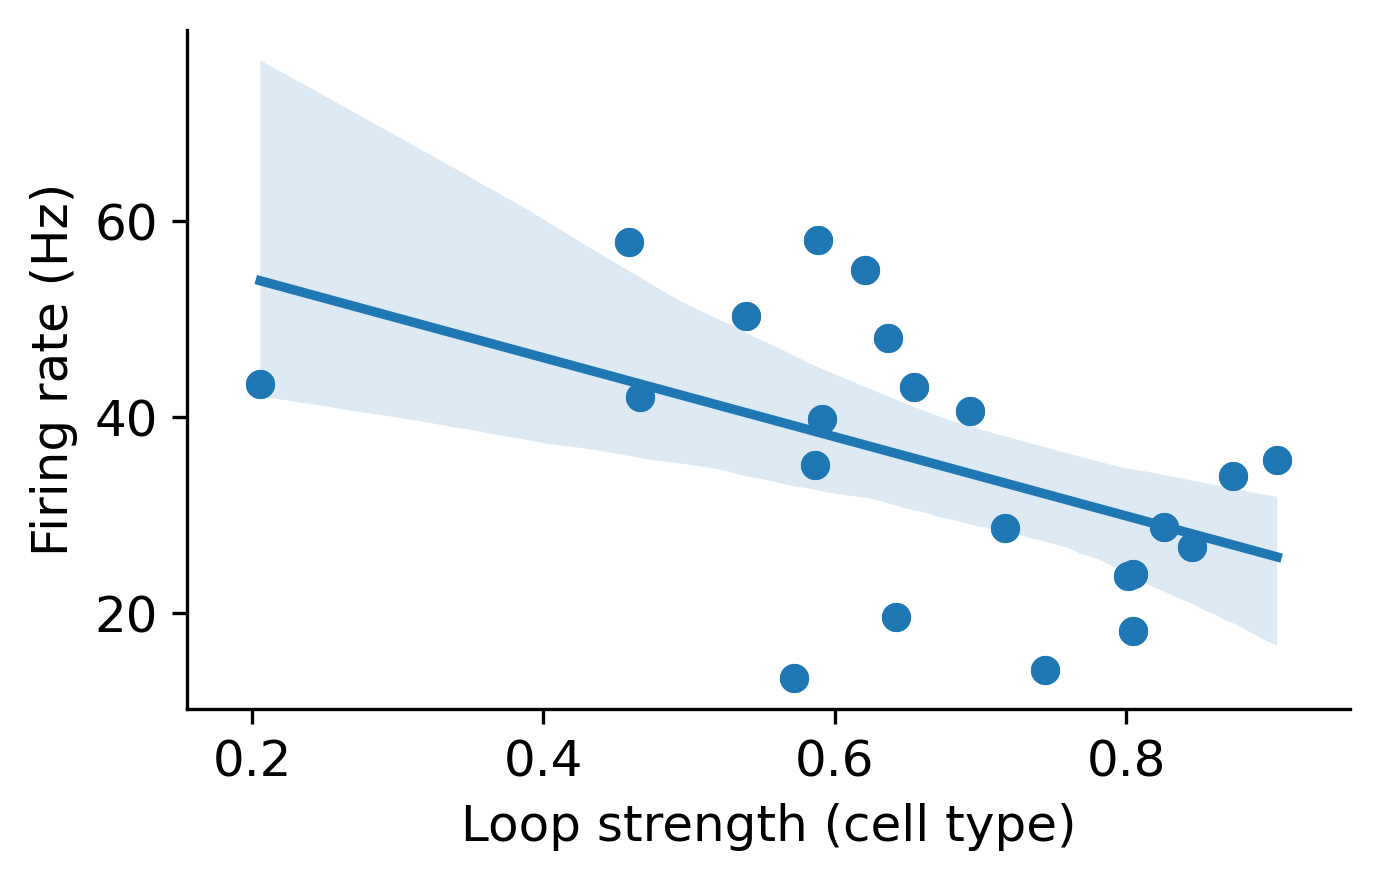

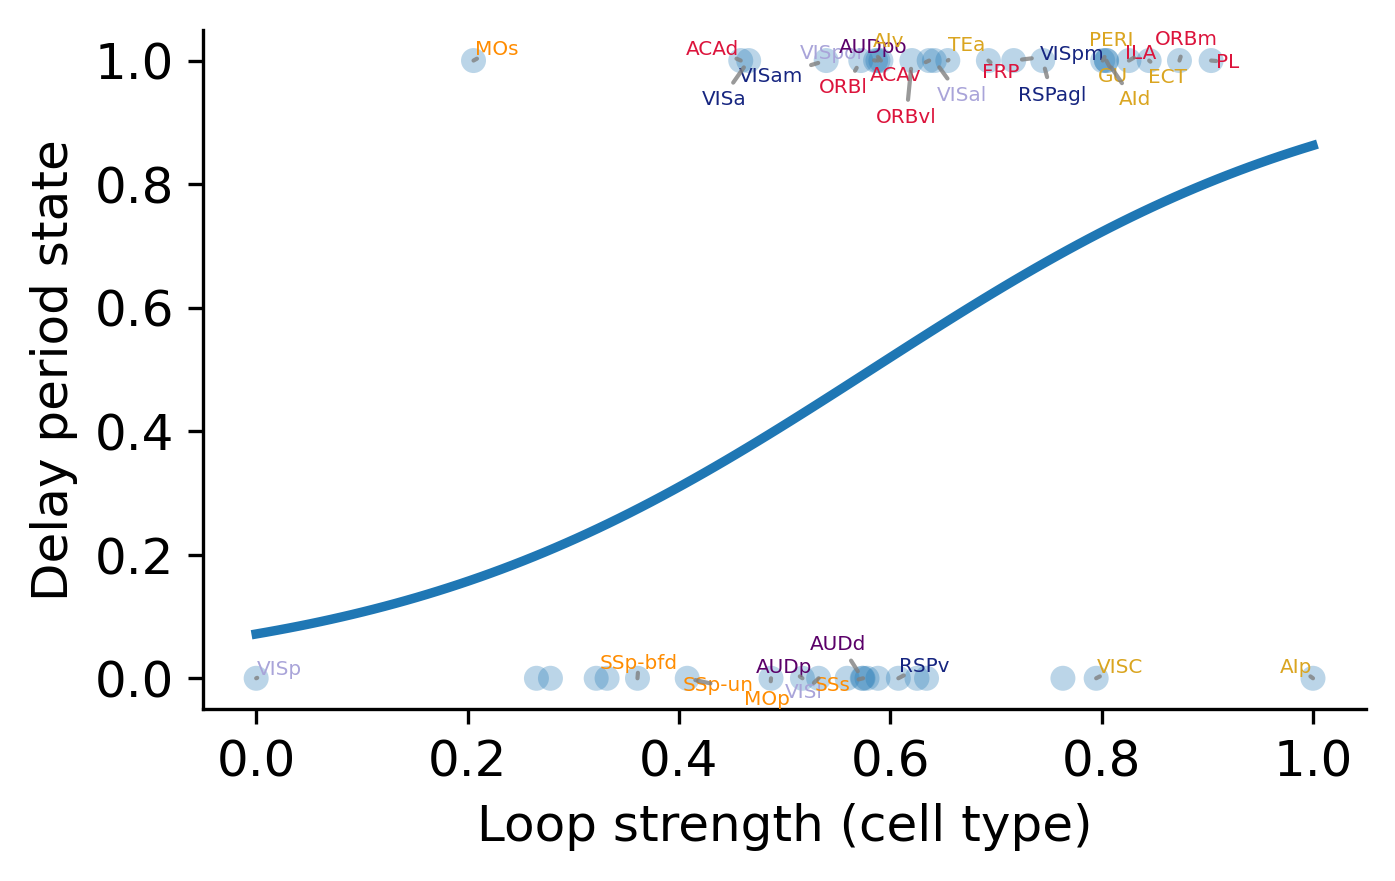

In [40]:
# compare cell type-specific loop strength and FR
# the result is not good. so we start to consider the loop strength to predict core areas.

X = sLoopHier
print(X.min(), X.max())
X = (X - X.min()) / (X.max() - X.min())
Y = np.array(model_V1.persistentact_df['persistentact']) 
Xlabel = 'Loop strength (cell type)'
Ylabel = 'Firing rate (Hz)'
frThreshold = 5
plotXYcompr(X, Y, Xlabel, Ylabel, area_list, (5, 3), 12, True,
            'loopMeasurement/loopHier_FRcompr1.svg')
loopHierCorr = plotXYcomprCorrNotNormalize(X, Y, Xlabel, Ylabel, parameters, False, area_list, frThreshold, (5, 3), 12, True,
            'loopMeasurement/loopHier_FRcompr2.svg')
# plotXYcomprResidual(X, Y, Xlabel, frThreshold, (5, 3), 12, True,
#             'loopMeasurement/eig_FRcompr3.svg')
loopHierLogReg = plotXYLogReg(X, Y, Xlabel, 'Delay period state',  True, parameters, area_list, noLabelAreas, frThreshold, (5, 3), 12, True,
            'loopMeasurement/loopHier_FRLogReg.svg') # Y is treated as binary with a threshold of frThreshold

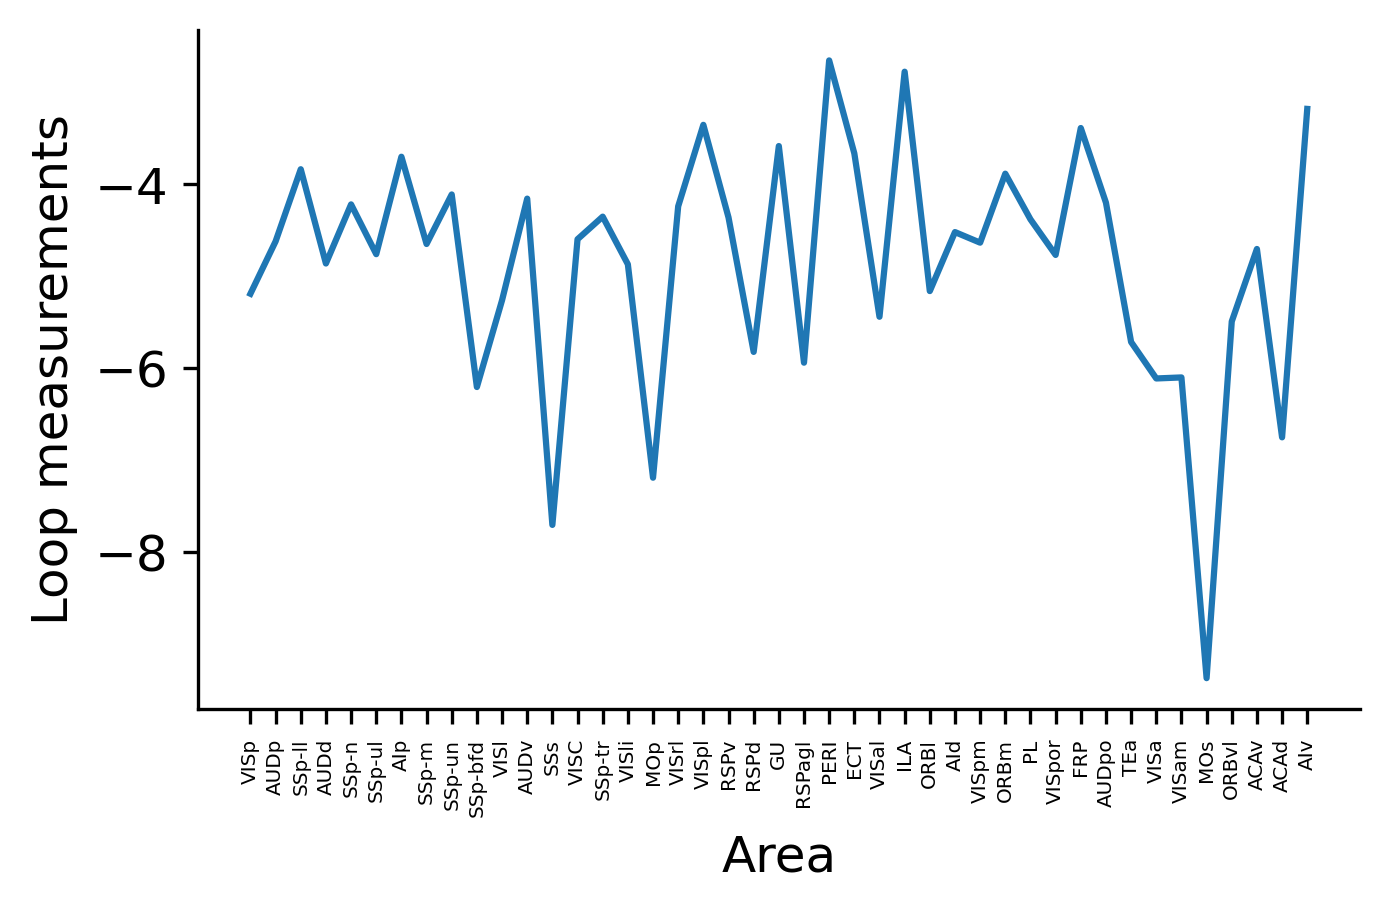

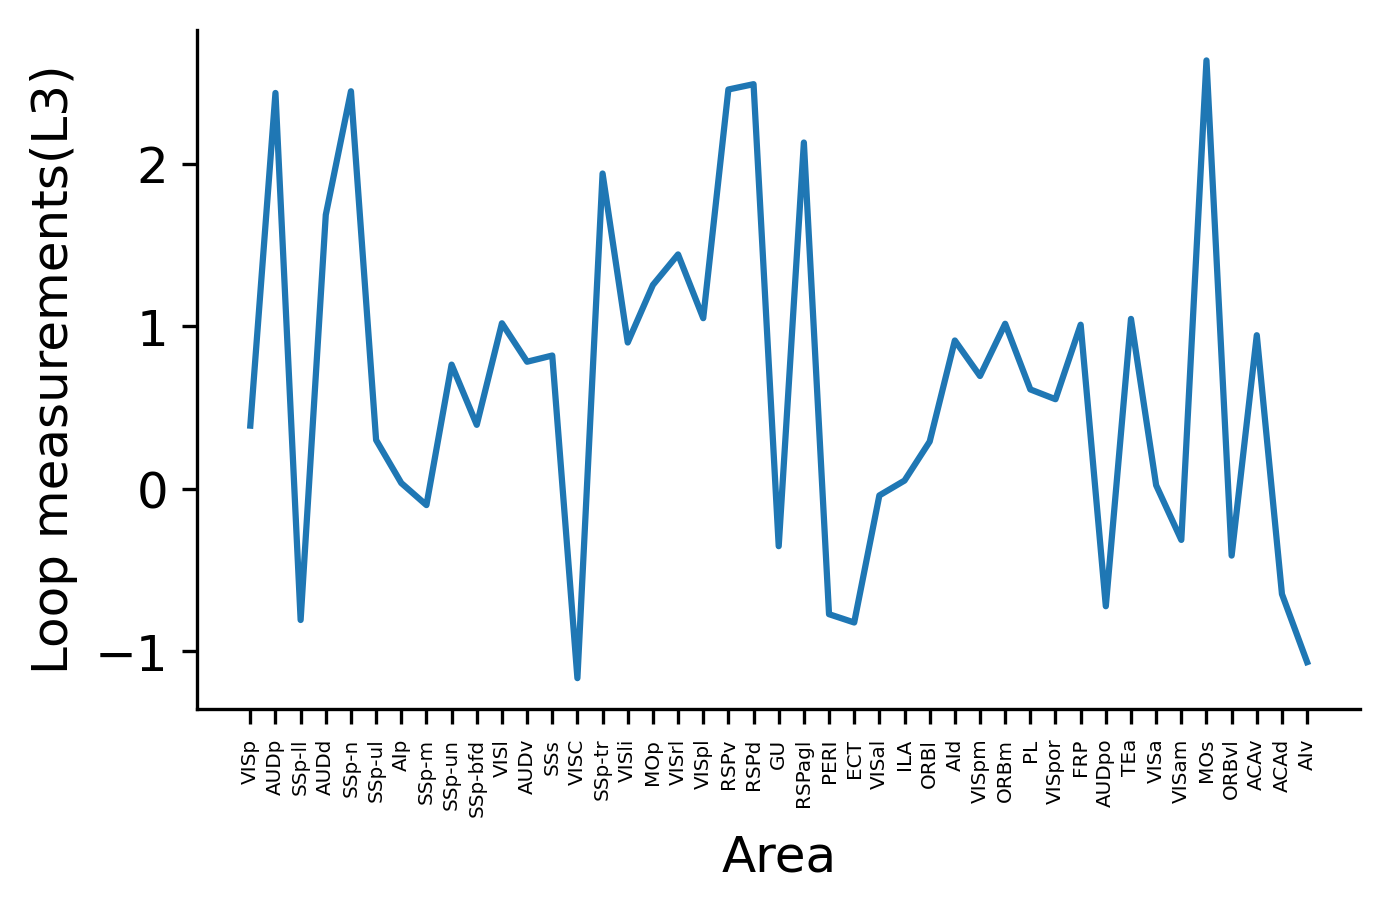

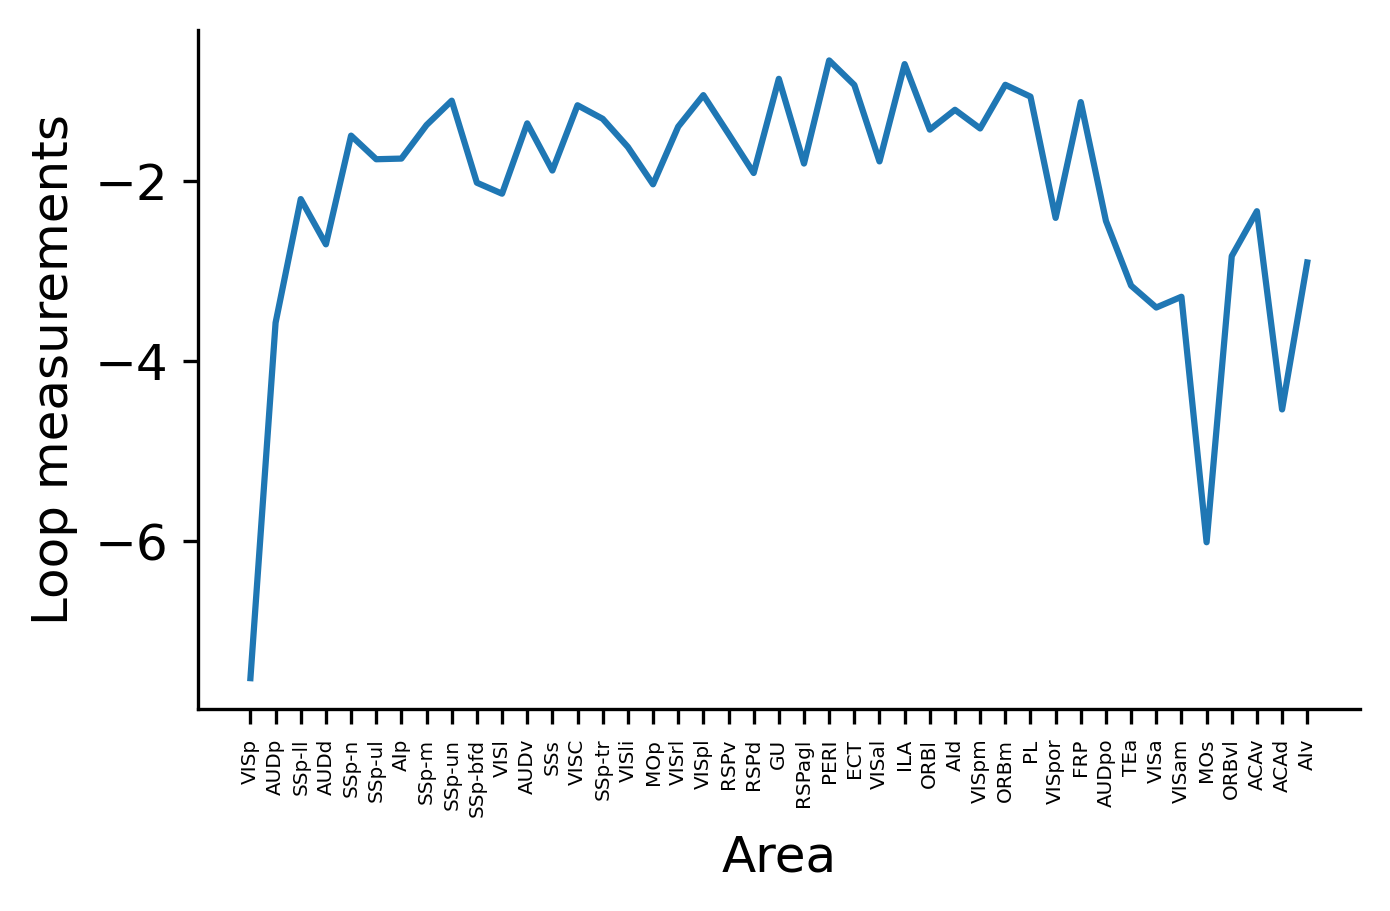

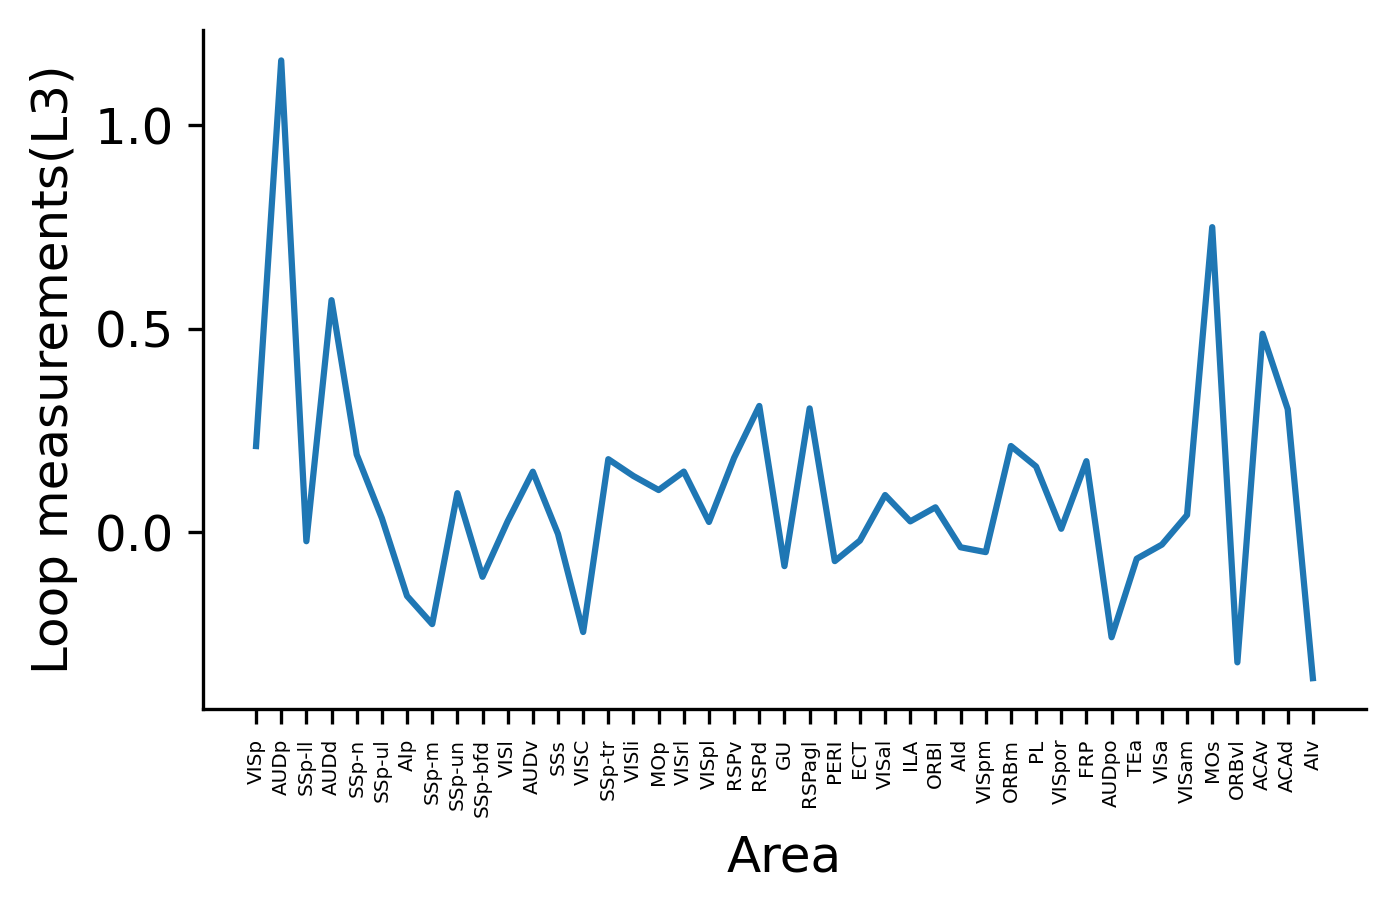

In [41]:
# Newsim: conn_cxcx_norm_sign_only    conn_cxcx_norm_noPV

sLoop_sign_only = np.diag(conn_cxcx_norm_sign_only @ conn_cxcx_norm_sign_only)
makePlot(sLoop_sign_only, 'Area', 'Loop measurements', area_list, (5,3), 12, True, 'loopMeasurement/sign_onlyLoop.svg')

ssLoop_sign_only = np.diag(conn_cxcx_norm_sign_only @ conn_cxcx_norm_sign_only @ conn_cxcx_norm_sign_only)
makePlot(ssLoop_sign_only, 'Area', 'Loop measurements(L3)', area_list, (5,3), 12, True, 'loopMeasurement/sign_onlyLoop3.svg')

sLoop_noPV = np.diag(conn_cxcx_norm_noPV @ conn_cxcx_norm_noPV)
makePlot(sLoop_noPV, 'Area', 'Loop measurements', area_list, (5,3), 12, True, 'loopMeasurement/noPVLoop.svg')

ssLoop_noPV = np.diag(conn_cxcx_norm_noPV @ conn_cxcx_norm_noPV @ conn_cxcx_norm_noPV)
makePlot(ssLoop_noPV, 'Area', 'Loop measurements(L3)', area_list, (5,3), 12, True, 'loopMeasurement/noPVLoop3.svg')


In [42]:
# save the loop 

with open('results/sign_onlyLoopStr.json', 'w') as f:
    json.dump(list(sLoop_sign_only), f)

with open('results/sign_onlyLoopStr3.json', 'w') as f:
    json.dump(list(ssLoop_sign_only), f)

with open('results/noPVLoopStr.json', 'w') as f:
    json.dump(list(sLoop_noPV), f)

with open('results/noPVLoopStr3.json', 'w') as f:
    json.dump(list(ssLoop_noPV), f)


In [43]:
newList = [area_list.index(x) for x in ['FRP','VISa','VISam','MOs','ACAd']]
print(newList)

[33, 36, 37, 38, 41]


In [44]:
partOfConn = conn_cxcx_norm_Hiermod[newList, :][:, newList]
print(partOfConn)

[[0.         0.06359009 0.0487631  0.58086209 0.18886516]
 [0.06508912 0.         0.22218213 0.20130104 0.09443899]
 [0.08888051 0.35399707 0.         0.25463198 0.16593004]
 [0.25055981 0.13699743 0.10971264 0.         0.1256716 ]
 [0.16742621 0.26548778 0.23682593 0.48124835 0.        ]]


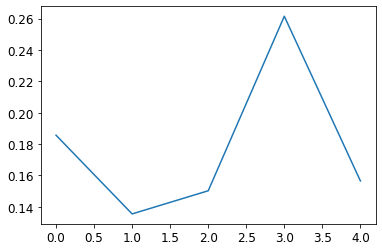

In [45]:
sLoopHierPart = np.diag(partOfConn @ partOfConn)
plt.plot(sLoopHierPart)

In [46]:
def makeHist(X, area_list, nBins, logScale, figTitle, xlabel, ylabel, figureSize, fontSize, saveFig, fileName):
    fig = plt.figure(figsize=figureSize, dpi=300, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': fontSize})
    
    if logScale:
        hist, bins = np.histogram(X, bins=nBins)
        logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
        plt.hist(X, bins=logbins)
        plt.xscale('log')
    else:
        plt.hist(X, bins=nBins, color='#0504aa', alpha=0.7, rwidth=0.85)

    plt.title(figTitle)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    axes = plt.gca()
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    if saveFig:
        fig.savefig('figure/' + fileName , dpi=300, bbox_inches='tight', transparent=True)
    return

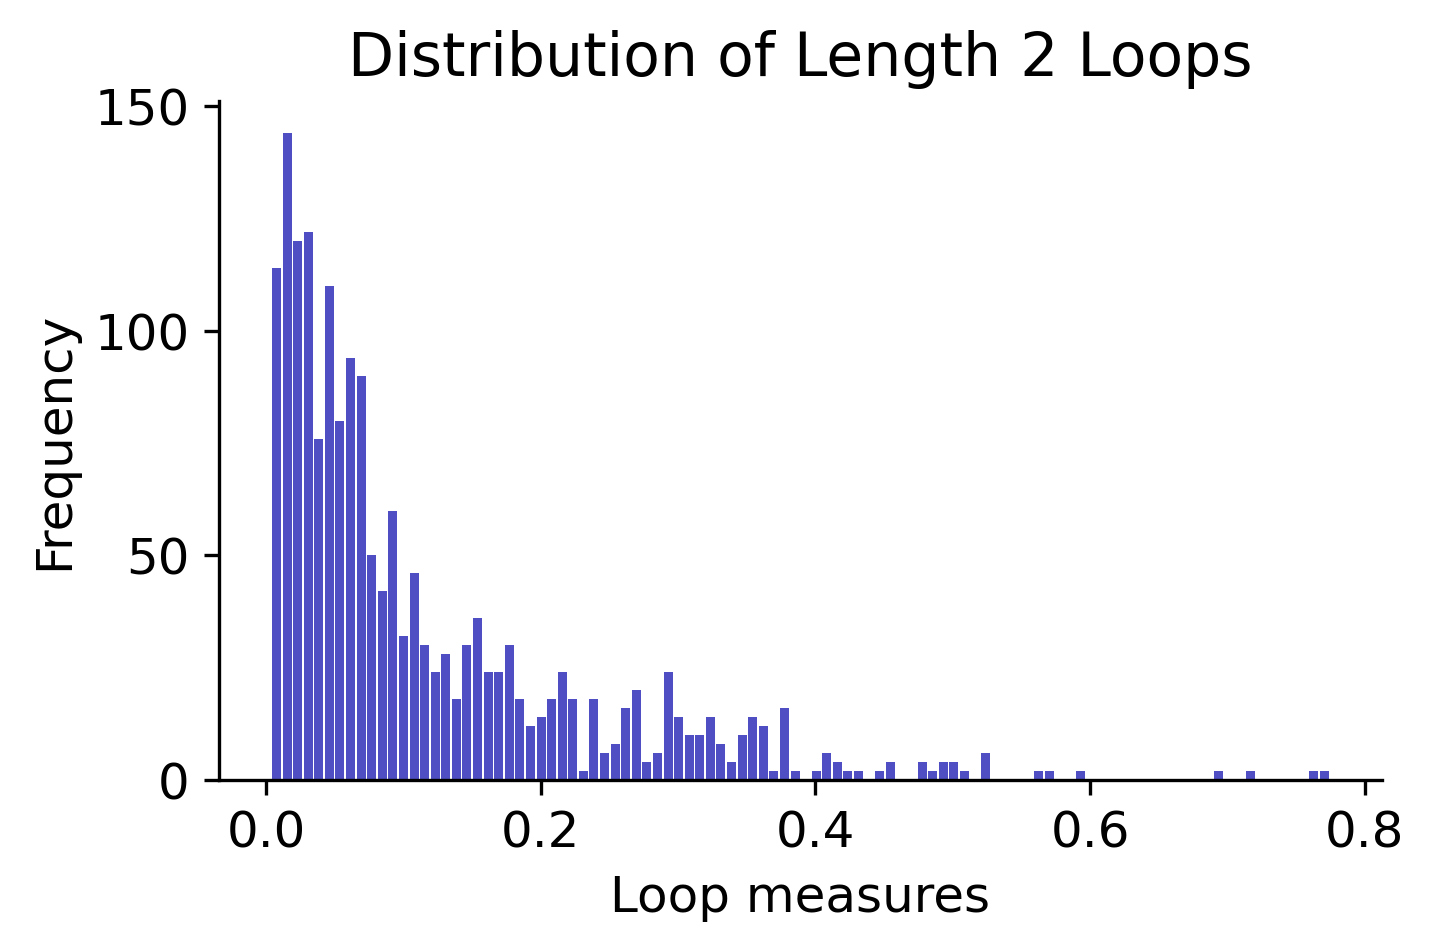

In [47]:
# # histogram of loop 2 strength
loopStrList = []
for i in range(len(area_list)):
    for j in range(len(area_list)):
        if i==j:
            continue
        loop = conn_cxcx_norm[i, j] * conn_cxcx_norm[j, i]
        loopStrList.append(loop)
makeHist(loopStrList, area_list, 100, False, 'Distribution of Length 2 Loops', 'Loop measures', 'Frequency',
    (5, 3), 12, True, 'loopMeasurement/Rawl2Hist.svg')

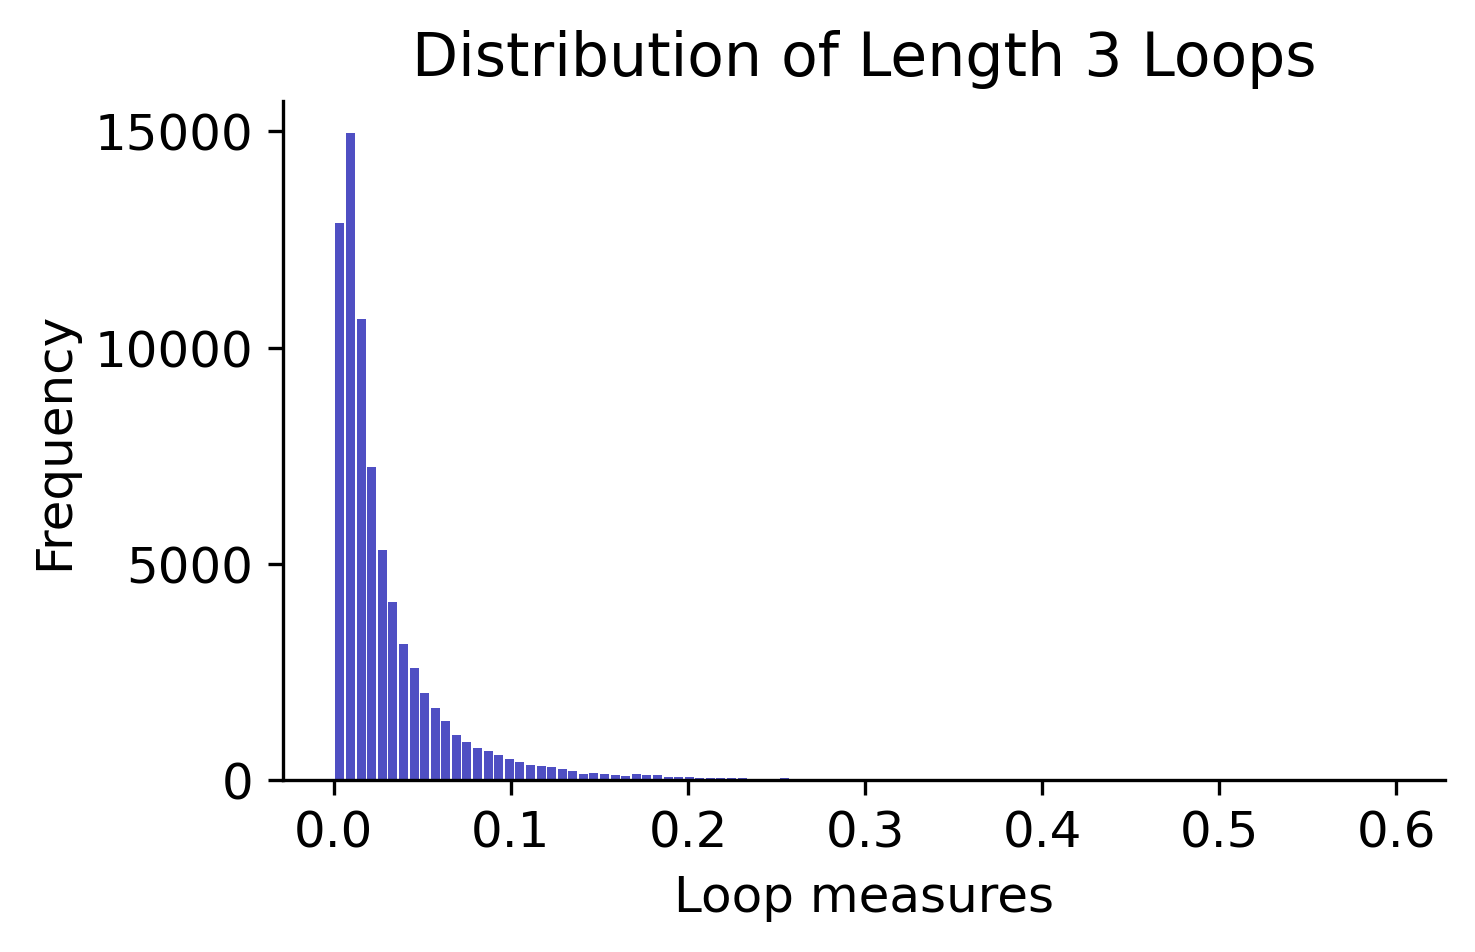

In [48]:
# # histogram of loop 3 strength
loop3StrList = []
for i in range(len(area_list)):
    for j in range(len(area_list)):
        if i==j:
            continue
        for k in range(len(area_list)):
            if k == i or k == j:
                continue
            loop = conn_cxcx_norm[i, j] * conn_cxcx_norm[j, k] * conn_cxcx_norm[k, i]
            loop3StrList.append(loop)
makeHist(loop3StrList, area_list, 100, False, 'Distribution of Length 3 Loops', 'Loop measures', 'Frequency',
    (5, 3), 12, True, 'loopMeasurement/Rawl3Hist.svg')

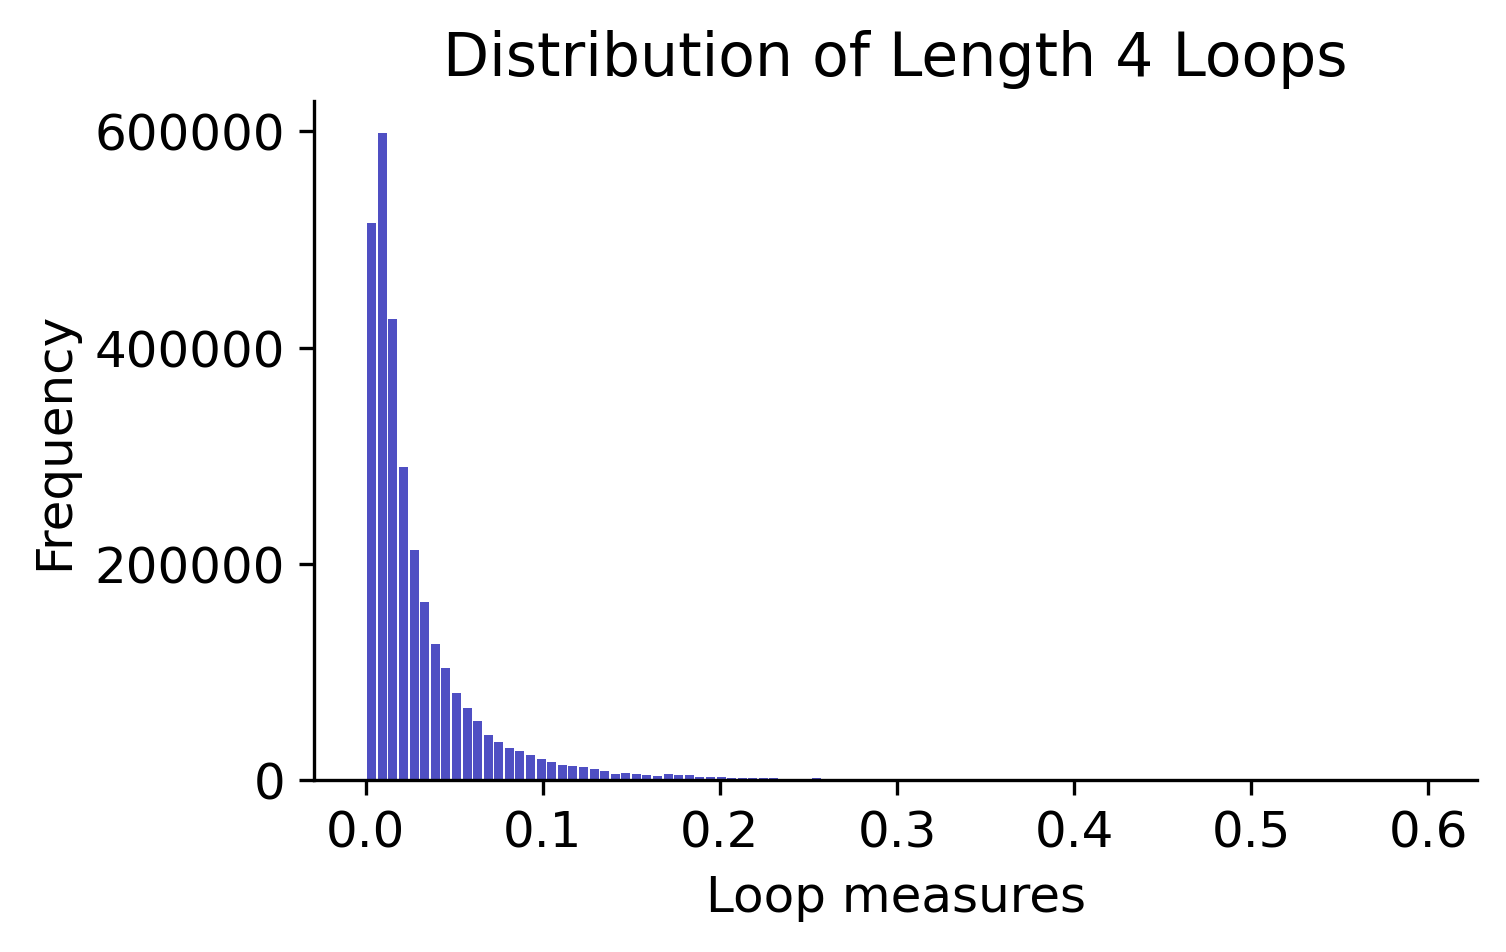

In [49]:
# histogram of loop 4 strength
loop4StrList = []
for i in range(len(area_list)):
    for j in range(len(area_list)):
        if i==j:
            continue
        for k in range(len(area_list)):
            if k == i or k == j:
                continue
            for l in range(len(area_list)):
                if l == i or l == j or l == k:
                    continue
                loop = conn_cxcx_norm[i, j] * conn_cxcx_norm[j, k] * conn_cxcx_norm[k, i]
                loop4StrList.append(loop)
makeHist(loop4StrList, area_list, 100, False, 'Distribution of Length 4 Loops', 'Loop measures', 'Frequency',
    (5, 3), 12, True, 'loopMeasurement/Rawl4Hist.svg')

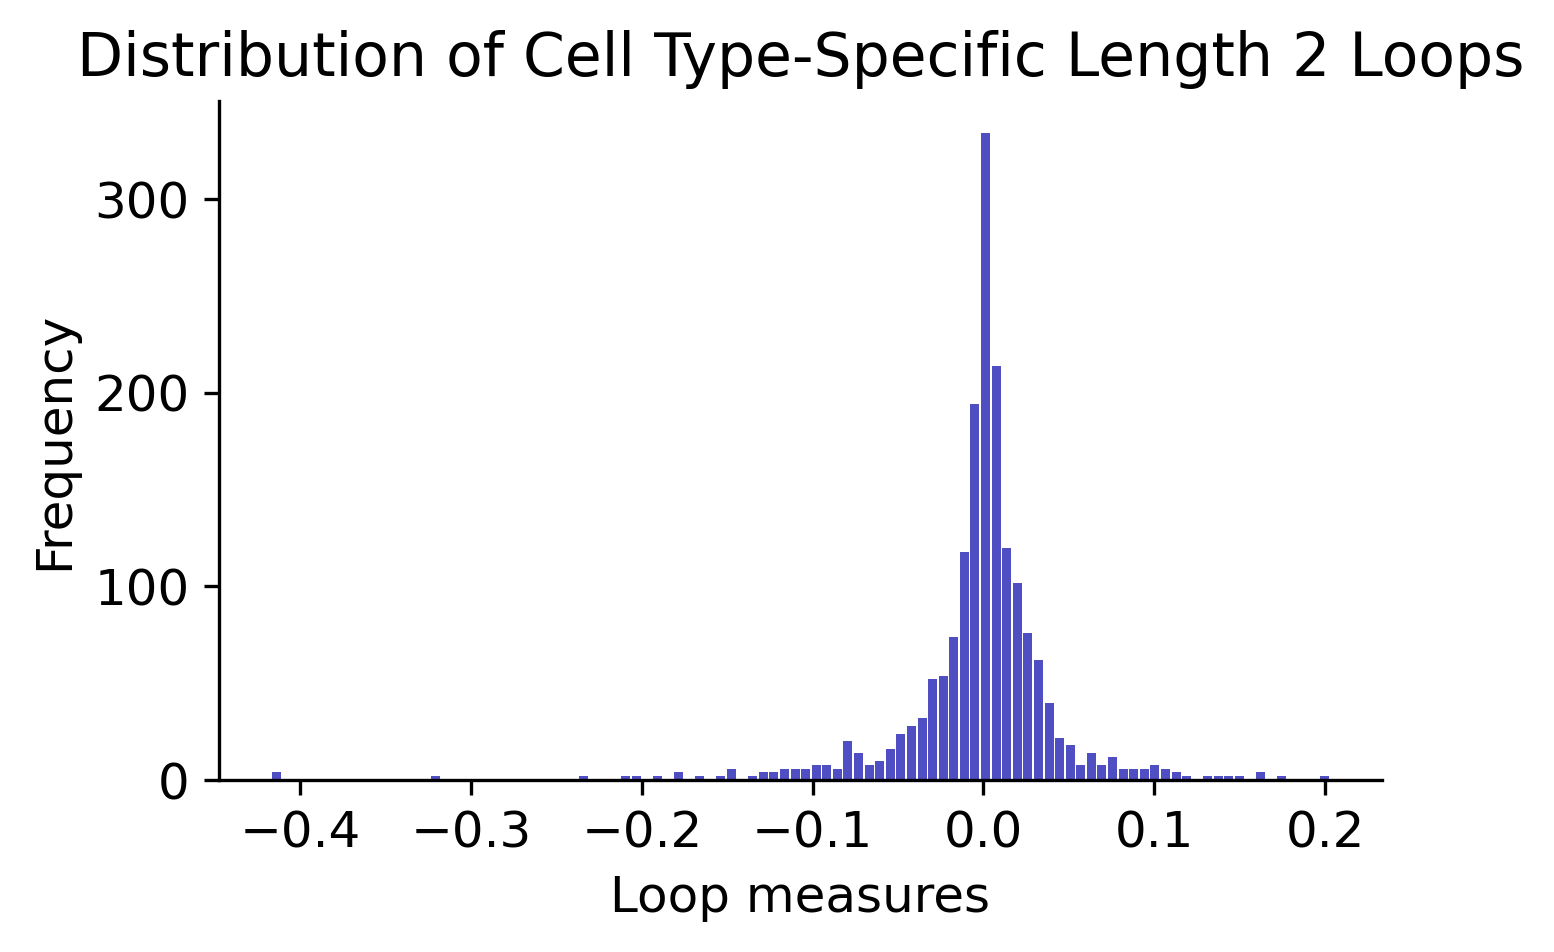

In [50]:
# histogram of Hierarchy modified loop 2 strength
HiermodloopStrList = []
for i in range(len(area_list)):
    for j in range(len(area_list)):
        if i==j:
            continue
        loop = conn_cxcx_norm_Hiermod[i, j] * conn_cxcx_norm_Hiermod[j, i]
        HiermodloopStrList.append(loop)
makeHist(HiermodloopStrList, area_list, 100, False, 'Distribution of Cell Type-Specific Length 2 Loops', 'Loop measures', 'Frequency',
    (5, 3), 12, True, 'loopMeasurement/hiermodl2Hist.svg')

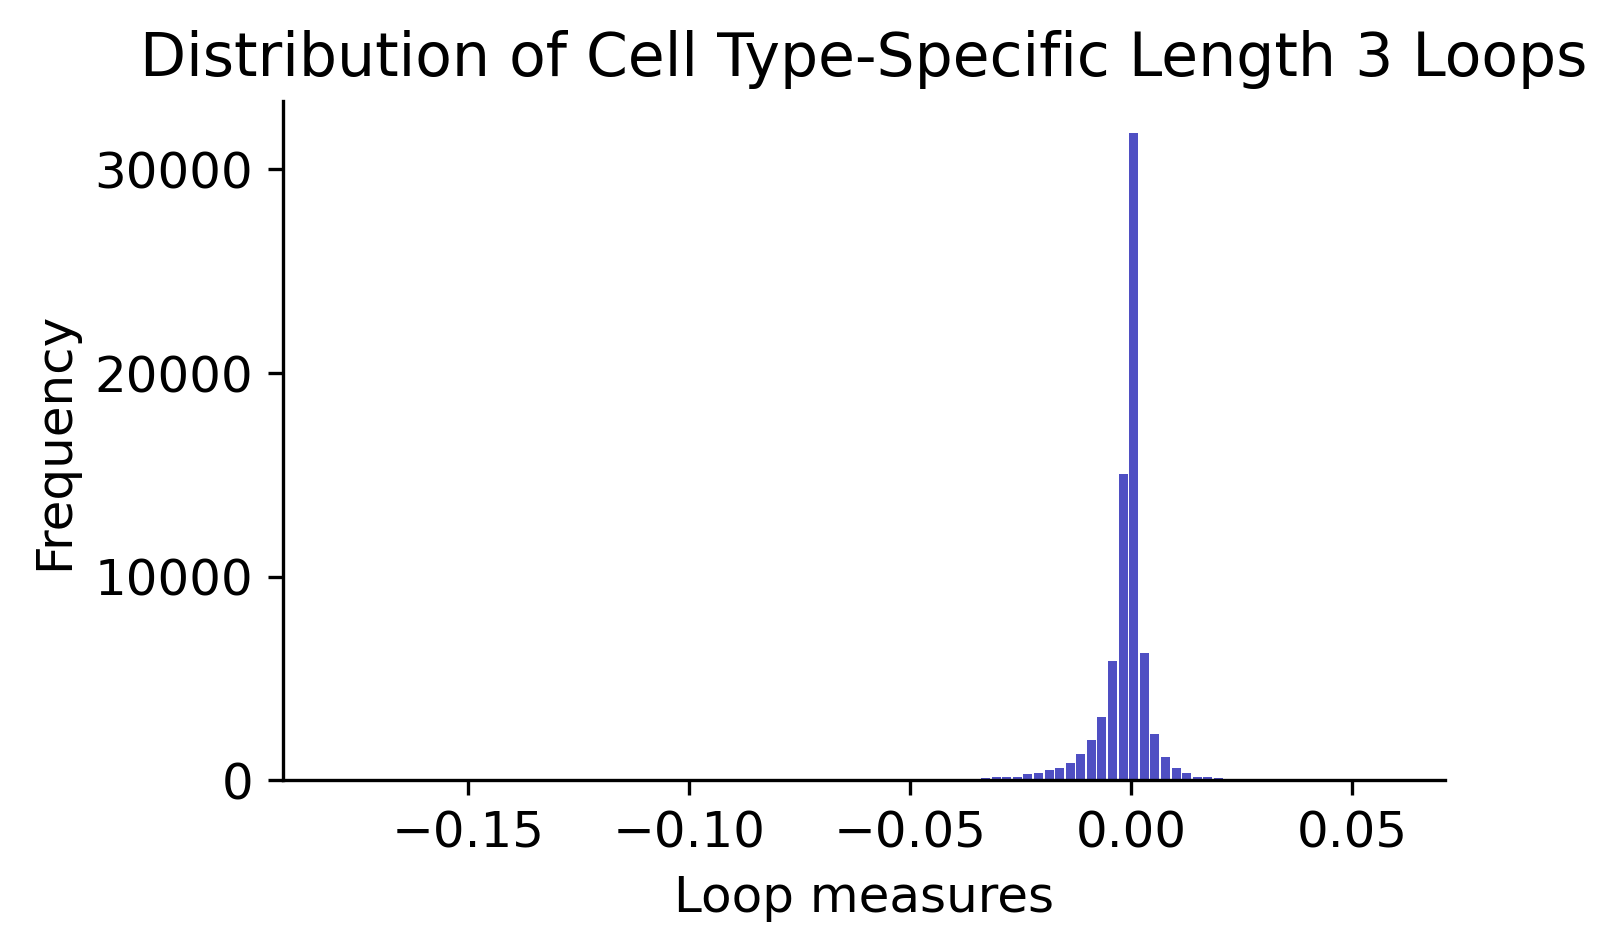

In [51]:
# # histogram of Hierarchy modified loop 3 strength
Hiermodloop3StrList = []
for i in range(len(area_list)):
    for j in range(len(area_list)):
        if i==j:
            continue
        for k in range(len(area_list)):
            if k == i or k == j:
                continue
            loop = conn_cxcx_norm_Hiermod[i, j] * conn_cxcx_norm_Hiermod[j, k] * conn_cxcx_norm_Hiermod[k, i]
            Hiermodloop3StrList.append(loop)
makeHist(Hiermodloop3StrList, area_list, 100, False, 'Distribution of Cell Type-Specific Length 3 Loops', 'Loop measures', 'Frequency',
    (5, 3), 12, True, 'loopMeasurement/hiermodl3Hist.svg')

In [52]:
# get which areas show strongest loopstrength
loopSortedAreaList = [area_list[i] for i in np.argsort(sLoop)]
print(loopSortedAreaList[::-1])
# get which areas show strongest loopstrength
loopSortedAreaList = [area_list[i] for i in np.argsort(sLoopHier)]
print(loopSortedAreaList[::-1])

['MOs', 'SSs', 'MOp', 'ACAd', 'SSp-bfd', 'VISa', 'VISam', 'RSPagl', 'RSPd', 'TEa', 'ORBvl', 'VISal', 'VISl', 'VISp', 'ORBl', 'VISli', 'AUDd', 'VISpor', 'SSp-ul', 'ACAv', 'SSp-m', 'VISpm', 'AUDp', 'VISC', 'AId', 'PL', 'RSPv', 'SSp-tr', 'VISrl', 'SSp-n', 'AUDpo', 'AUDv', 'SSp-un', 'ORBm', 'SSp-ll', 'AIp', 'ECT', 'GU', 'FRP', 'VISpl', 'AIv', 'ILA', 'PERI']
['AIp', 'PL', 'ORBm', 'ECT', 'ILA', 'AId', 'GU', 'PERI', 'VISC', 'AUDv', 'RSPagl', 'VISpm', 'FRP', 'TEa', 'VISal', 'ACAv', 'VISpl', 'VISrl', 'ORBvl', 'RSPv', 'AUDpo', 'VISli', 'AIv', 'VISpor', 'RSPd', 'SSs', 'AUDd', 'ORBl', 'SSp-tr', 'VISam', 'VISl', 'AUDp', 'MOp', 'VISa', 'ACAd', 'SSp-un', 'SSp-bfd', 'SSp-ll', 'SSp-m', 'SSp-ul', 'SSp-n', 'MOs', 'VISp']
